In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# sns.set()
sns.set_style("white")

CHILDES GRAPHS

In this notebook I'm exploring ways of visualising the temporal changes in use of syntactic structure for child directed speech.

First let's create dictonaries with dependency statistics for the Hebrew and English corpora.

In [2]:
hebrew_stats = {}
# Hebrew stats per day

discourse = [0.12, 0.11764705882352941, 0.14743589743589744, 0.15135135135135136, 0.14942528735632185, 0.10101010101010101, 0.1595744680851064, 0.17857142857142858, 0.1, 0.20388349514563106, 0.1921921921921922, 0.13533834586466165, 0, 0.18, 0.078125, 0.14285714285714285, 0.11627906976744186, 0.16568047337278108, 0.19157088122605365, 0.2542955326460481, 0.2727272727272727, 0.1282051282051282, 0.1939218523878437, 0.26229508196721313, 0.23214285714285715, 0.16666666666666666, 0.1649214659685864, 0.1466992665036675, 0.2857142857142857, 0.25547445255474455, 0.1625, 0.13043478260869565, 0.13970588235294118, 0.10344827586206896, 0.07407407407407407, 0.15384615384615385, 0.16165951359084407, 0.25327510917030566, 0.037037037037037035, 0.2247191011235955, 0.3125, 0.15047619047619049, 0.11728395061728394, 0.11676646706586827, 0.13821138211382114, 0.22527472527472528, 0.22033898305084745, 0.16964285714285715, 0.21394230769230768, 0.2, 0.14, 0.16483516483516483, 0.1242603550295858, 0.11949685534591195, 0.14068441064638784, 0.099601593625498, 0.1488095238095238, 0.14583333333333334, 0.13636363636363635, 0.12849162011173185, 0.05511811023622047, 0.13744075829383887, 0.11046511627906977, 0.0979381443298969, 0.07423580786026202, 0.18238993710691823, 0.12580645161290321, 0.10434782608695652, 0.1206896551724138, 0.12562814070351758, 0.145985401459854, 0.15019762845849802, 0.5, 0.13447432762836187, 0.18100890207715134, 0.13095238095238096, 0.1111111111111111, 0.17484276729559747, 0.23404255319148937, 0.1411764705882353, 0.07692307692307693, 0.08421052631578947, 0.21518987341772153, 0.16121495327102803, 0.22627737226277372, 0.18309859154929578, 0.20652173913043478, 0.26666666666666666, 0.1649746192893401, 0.2575107296137339, 0.17708333333333334, 0.2231404958677686, 0.1391304347826087, 0.20512820512820512, 0.20994475138121546, 0.1828793774319066, 0.2463768115942029, 0.12807881773399016, 0.19469026548672566, 0.21794871794871795, 0.15384615384615385, 0.18292682926829268, 0.1958762886597938, 0.16933638443935928, 0.17391304347826086, 0.3269230769230769, 0.05, 0.14619883040935672, 0.18543046357615894, 0.17894736842105263, 0.2141057934508816, 0.17785843920145192, 0.140625, 0.1388888888888889, 0.11891891891891893]
punct = [1.2, 1.2805429864253393, 1.2628205128205128, 1.3135135135135134, 1.2528735632183907, 1.2222222222222223, 1.3829787234042554, 1.3392857142857142, 1.2666666666666666, 1.3203883495145632, 1.4504504504504505, 1.368421052631579, 1.4827586206896552, 1.405, 1.234375, 1.406926406926407, 1.1627906976744187, 1.3964497041420119, 1.5363984674329503, 1.5670103092783505, 1.3636363636363635, 1.3076923076923077, 1.52821997105644, 1.7595628415300546, 1.494047619047619, 1.4666666666666666, 1.5026178010471205, 1.4376528117359413, 1.3428571428571427, 1.4598540145985401, 1.4, 1.3565217391304347, 1.3198529411764706, 1.3054187192118227, 1.2222222222222223, 1.2307692307692308, 1.3261802575107295, 1.4148471615720524, 1.1481481481481481, 1.4696629213483146, 1.625, 1.4819047619047618, 1.2962962962962963, 1.3203592814371257, 1.3821138211382114, 1.3516483516483517, 1.347457627118644, 1.4017857142857142, 1.4038461538461537, 1.4852459016393442, 1.43, 1.3241758241758241, 1.3254437869822486, 1.3396226415094339, 1.2357414448669202, 1.302788844621514, 1.3869047619047619, 1.3802083333333333, 1.4015151515151516, 1.324022346368715, 1.3070866141732282, 1.3933649289099526, 1.4186046511627908, 1.3711340206185567, 1.3799126637554586, 1.4465408805031446, 1.3, 1.3217391304347825, 1.3017241379310345, 1.4371859296482412, 1.3357664233576643, 1.434782608695652, 1.75, 1.3300733496332517, 1.3857566765578635, 1.4246031746031746, 1.3838383838383839, 1.628930817610063, 2.021276595744681, 1.5333333333333334, 1.5769230769230769, 1.4736842105263157, 2.1645569620253164, 1.544392523364486, 1.594890510948905, 1.4366197183098592, 1.4855072463768115, 1.4333333333333333, 1.3604060913705585, 1.407725321888412, 1.34375, 1.5867768595041323, 1.4173913043478261, 1.4871794871794872, 1.3756906077348066, 1.3852140077821011, 1.434782608695652, 1.5517241379310345, 1.4778761061946903, 1.452991452991453, 1.5769230769230769, 1.3841463414634145, 1.3969072164948453, 1.448512585812357, 1.4202898550724639, 1.608974358974359, 1.7, 1.4736842105263157, 1.403973509933775, 1.4105263157894736, 1.3375314861460956, 1.4936479128856623, 1.4296875, 1.3611111111111112, 1.545945945945946]
root = [1.0, 0.995475113122172, 1.0, 1.0, 1.0, 0.9949494949494949, 1.0, 0.9955357142857143, 1.0, 1.0, 0.987987987987988, 0.9924812030075187, 1.0, 0.96, 1.0, 0.9523809523809523, 0.9302325581395349, 0.9940828402366864, 0.9885057471264368, 0.9965635738831615, 1.0, 0.9743589743589743, 0.9971056439942113, 1.0, 1.0, 1.0, 0.9764397905759162, 0.9975550122249389, 0.9714285714285714, 1.0, 1.0, 0.9739130434782609, 0.9522058823529411, 0.9556650246305419, 1.0, 1.0, 0.9756795422031473, 0.9868995633187773, 1.0, 0.9910112359550561, 1.0, 0.9961904761904762, 0.9938271604938271, 0.9850299401197605, 0.959349593495935, 0.9945054945054945, 0.9745762711864406, 1.0, 0.9951923076923077, 0.9836065573770492, 0.98, 0.9945054945054945, 0.9940828402366864, 0.9811320754716981, 0.9923954372623575, 0.9880478087649402, 0.9642857142857143, 0.9791666666666666, 0.9848484848484849, 0.9832402234636871, 0.889763779527559, 0.976303317535545, 1.0, 1.0, 0.9956331877729258, 1.0, 1.0032258064516129, 1.008695652173913, 0.9913793103448276, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9940652818991098, 1.0, 1.0, 0.9987421383647799, 1.0, 1.0, 1.0, 0.9894736842105263, 1.0253164556962024, 0.9602803738317757, 0.927007299270073, 1.0, 0.9963768115942029, 1.0, 0.9949238578680203, 0.9914163090128756, 0.9947916666666666, 0.9917355371900827, 1.0, 1.0, 0.994475138121547, 0.9883268482490273, 0.9855072463768116, 0.7438423645320197, 0.8141592920353983, 0.9401709401709402, 0.8846153846153846, 0.8780487804878049, 0.9587628865979382, 0.9702517162471396, 0.9166666666666666, 0.9423076923076923, 1.0, 0.9766081871345029, 0.9867549668874173, 1.0, 0.9924433249370277, 0.985480943738657, 0.9765625, 0.9583333333333334, 0.9837837837837838]
advmod = [0.13, 0.167420814479638, 0.17307692307692307, 0.14594594594594595, 0.19540229885057472, 0.19696969696969696, 0.14893617021276595, 0.22321428571428573, 0, 0.18446601941747573, 0.1831831831831832, 0.18796992481203006, 0.1724137931034483, 0.355, 0.25, 0.4329004329004329, 0.3488372093023256, 0.3727810650887574, 0.26053639846743293, 0.2508591065292096, 0.13636363636363635, 0.23076923076923078, 0.22575976845151954, 0.30601092896174864, 0.23809523809523808, 0.25555555555555554, 0.23036649214659685, 0.254278728606357, 0.37142857142857144, 0.26277372262773724, 0.3125, 0.34782608695652173, 0.41544117647058826, 0.4630541871921182, 0.2962962962962963, 0.3076923076923077, 0.26895565092989987, 0.23580786026200873, 0.1111111111111111, 0.22696629213483147, 0.25, 0.26476190476190475, 0.2345679012345679, 0.23353293413173654, 0.4065040650406504, 0.2857142857142857, 0.3220338983050847, 0.35714285714285715, 0.27403846153846156, 0.3016393442622951, 0.25, 0.24725274725274726, 0.21301775147928995, 0.3018867924528302, 0.29277566539923955, 0.23107569721115537, 0.4880952380952381, 0.4010416666666667, 0.24242424242424243, 0.22905027932960895, 0.4094488188976378, 0.2985781990521327, 0.3488372093023256, 0.2422680412371134, 0.2314410480349345, 0.3333333333333333, 0.24516129032258063, 0.2956521739130435, 0.3620689655172414, 0.32663316582914576, 0.3722627737226277, 0.2924901185770751, 0.25, 0.25183374083129584, 0.32047477744807124, 0.3888888888888889, 0.35353535353535354, 0.3836477987421384, 0.23404255319148937, 0.39215686274509803, 0.5384615384615384, 0.2631578947368421, 0.4177215189873418, 0.37850467289719625, 0.40693430656934304, 0.2676056338028169, 0.41304347826086957, 0.3, 0.2639593908629442, 0.30042918454935624, 0.2552083333333333, 0.256198347107438, 0.30434782608695654, 0.46153846153846156, 0.27624309392265195, 0.29571984435797666, 0.2463768115942029, 0.32019704433497537, 0.45132743362831856, 0.2948717948717949, 0.4230769230769231, 0.20121951219512196, 0.28865979381443296, 0.36613272311212813, 0.29347826086956524, 0.41025641025641024, 0.35, 0.27485380116959063, 0.3576158940397351, 0.3473684210526316, 0.2141057934508816, 0.38294010889292196, 0.41015625, 0.375, 0.35135135135135137]
nsubj = [0.685, 0.7013574660633484, 0.6282051282051282, 0.745945945945946, 0.6206896551724138, 0.6565656565656566, 0.6170212765957447, 0.6473214285714286, 0.8, 0.6601941747572816, 0.6366366366366366, 0.49624060150375937, 0.8620689655172413, 0.345, 0.515625, 0.5541125541125541, 0.627906976744186, 0.9053254437869822, 0.7279693486590039, 0.7938144329896907, 0.4090909090909091, 0.5897435897435898, 0.7018813314037626, 0.7513661202185792, 0.7916666666666666, 0.5777777777777777, 0.5654450261780105, 0.7726161369193154, 0.5285714285714286, 0.6861313868613139, 0.375, 0.5130434782608696, 0.6985294117647058, 0.5714285714285714, 0.7037037037037037, 0.7692307692307693, 0.6123032904148784, 0.5764192139737991, 0.48148148148148145, 0.7370786516853932, 1.125, 0.8304761904761905, 0.6049382716049383, 0.5988023952095808, 0.6666666666666666, 0.7252747252747253, 0.6101694915254238, 0.6428571428571429, 0.6105769230769231, 0.6557377049180327, 0.7, 0.6071428571428571, 0.5088757396449705, 0.660377358490566, 0.6692015209125475, 0.701195219123506, 0.6428571428571429, 0.5625, 0.6212121212121212, 0.5083798882681564, 0.5826771653543307, 0.6113744075829384, 0.7325581395348837, 0.6082474226804123, 0.6419213973799127, 0.6415094339622641, 0.7709677419354839, 0.6782608695652174, 0.5603448275862069, 0.5829145728643216, 0.635036496350365, 0.616600790513834, 0.75, 0.5599022004889975, 0.712166172106825, 0.6865079365079365, 0.5656565656565656, 0.8226415094339623, 1.0851063829787233, 0.7843137254901961, 0.7692307692307693, 0.7473684210526316, 1.2151898734177216, 0.8925233644859814, 0.7773722627737226, 0.647887323943662, 0.6956521739130435, 0.43333333333333335, 0.6725888324873096, 0.5407725321888412, 0.5677083333333334, 0.7851239669421488, 0.6521739130434783, 0.6153846153846154, 0.5469613259668509, 0.5758754863813229, 0.5942028985507246, 0.6995073891625616, 0.6548672566371682, 0.5512820512820513, 0.6153846153846154, 0.5670731707317073, 0.6185567010309279, 0.6842105263157895, 0.6304347826086957, 0.8141025641025641, 0.7, 0.672514619883041, 0.4900662251655629, 0.6, 0.5642317380352645, 0.6061705989110708, 0.70703125, 0.7083333333333334, 0.7405405405405405]
neg = [0.045, 0.04524886877828054, 0.07051282051282051, 0.03783783783783784, 0.011494252873563218, 0.08080808080808081, 0.1276595744680851, 0.09821428571428571, 0.13333333333333333, 0.11650485436893204, 0.03903903903903904, 0.15037593984962405, 0.10344827586206896, 0.005, 0, 0.004329004329004329, 0, 0.011834319526627219, 0.0421455938697318, 0.020618556701030927, 0.13636363636363635, 0.1794871794871795, 0.0723589001447178, 0.09016393442622951, 0.08333333333333333, 0.14444444444444443, 0.08900523560209424, 0.07579462102689487, 0.05714285714285714, 0.08029197080291971, 0.1, 0.017391304347826087, 0, 0.0049261083743842365, 0.037037037037037035, 0.07692307692307693, 0.07296137339055794, 0.07860262008733625, 0.037037037037037035, 0.060674157303370786, 0.25, 0.0761904761904762, 0.07407407407407407, 0.07784431137724551, 0.04878048780487805, 0.12637362637362637, 0.1016949152542373, 0.03571428571428571, 0.07932692307692307, 0.13114754098360656, 0.07, 0.08791208791208792, 0.1834319526627219, 0.031446540880503145, 0.06463878326996197, 0.08764940239043825, 0.005952380952380952, 0, 0.08333333333333333, 0.1564245810055866, 0.07086614173228346, 0.08056872037914692, 0.10465116279069768, 0.05154639175257732, 0.10480349344978165, 0.08176100628930817, 0.10967741935483871, 0.13043478260869565, 0.05172413793103448, 0.05527638190954774, 0.08759124087591241, 0.05138339920948617, 0, 0.10513447432762836, 0.06528189910979229, 0.3055555555555556, 0.21212121212121213, 0.10817610062893082, 0.10638297872340426, 0.1450980392156863, 0, 0.15789473684210525, 0.06329113924050633, 0.09813084112149532, 0.07481751824817519, 0.14084507042253522, 0.09057971014492754, 0.1, 0.12436548223350254, 0.11158798283261803, 0.109375, 0.049586776859504134, 0.08695652173913043, 0.05128205128205128, 0.10497237569060773, 0.11673151750972763, 0.028985507246376812, 0.07389162561576355, 0.10619469026548672, 0.05128205128205128, 0.11538461538461539, 0.042682926829268296, 0.12886597938144329, 0.13501144164759726, 0.10507246376811594, 0.16025641025641027, 0.2, 0.04093567251461988, 0.07947019867549669, 0.07368421052631578, 0.0654911838790932, 0.07985480943738657, 0.12109375, 0.1111111111111111, 0.15135135135135136]
det = [0.3, 0.21266968325791855, 0.30128205128205127, 0.32432432432432434, 0.3563218390804598, 0.398989898989899, 0.1702127659574468, 0.34375, 0.4, 0.42718446601941745, 0.3303303303303303, 0.2932330827067669, 0.3448275862068966, 0.215, 0.3125, 0.2857142857142857, 0.23255813953488372, 0.42011834319526625, 0.3946360153256705, 0.35051546391752575, 0.22727272727272727, 0.2564102564102564, 0.41389290882778584, 0.4453551912568306, 0.3630952380952381, 0.5, 0.39267015706806285, 0.4180929095354523, 0.3, 0.5182481751824818, 0.4, 0.1826086956521739, 0.4411764705882353, 0.3448275862068966, 0.5555555555555556, 0.3076923076923077, 0.29756795422031473, 0.34497816593886466, 0.14814814814814814, 0.33707865168539325, 0.125, 0.49523809523809526, 0.4567901234567901, 0.38323353293413176, 0.4065040650406504, 0.36813186813186816, 0.3135593220338983, 0.35714285714285715, 0.41586538461538464, 0.4262295081967213, 0.46, 0.41483516483516486, 0.5266272189349113, 0.34591194968553457, 0.4296577946768061, 0.3187250996015936, 0.3869047619047619, 0.390625, 0.32954545454545453, 0.30726256983240224, 0.4015748031496063, 0.43601895734597157, 0.3430232558139535, 0.4587628865979381, 0.4148471615720524, 0.37735849056603776, 0.3161290322580645, 0.3652173913043478, 0.33620689655172414, 0.4824120603015075, 0.31386861313868614, 0.5573122529644269, 1.0, 0.4889975550122249, 0.42433234421364985, 0.36507936507936506, 0.32323232323232326, 0.45031446540880504, 0.5106382978723404, 0.4588235294117647, 0.3076923076923077, 0.42105263157894735, 0.9620253164556962, 0.4696261682242991, 0.5200729927007299, 0.5211267605633803, 0.605072463768116, 0.5333333333333333, 0.4467005076142132, 0.4892703862660944, 0.359375, 0.6776859504132231, 0.45217391304347826, 0.46153846153846156, 0.22099447513812154, 0.3852140077821012, 0.3188405797101449, 0.6354679802955665, 0.4424778761061947, 0.36752136752136755, 0.46153846153846156, 0.36585365853658536, 0.35051546391752575, 0.40045766590389015, 0.4384057971014493, 0.46153846153846156, 0.45, 0.4502923976608187, 0.271523178807947, 0.30526315789473685, 0.4156171284634761, 0.41742286751361163, 0.4921875, 0.2222222222222222, 0.4702702702702703]
amod = [0.005, 0.03167420814479638, 0.07051282051282051, 0.043243243243243246, 0.04597701149425287, 0.15656565656565657, 0.031914893617021274, 0.07589285714285714, 0.2, 0.05825242718446602, 0.07507507507507508, 0.03007518796992481, 0.10344827586206896, 0.12, 0.015625, 0.030303030303030304, 0.023255813953488372, 0.11834319526627218, 0.05363984674329502, 0.1134020618556701, 0.09090909090909091, 0.02564102564102564, 0.13603473227206947, 0.14754098360655737, 0.05952380952380952, 0.022222222222222223, 0.12041884816753927, 0.1198044009779951, 0.014285714285714285, 0.16058394160583941, 0.0625, 0.034782608695652174, 0.058823529411764705, 0.06403940886699508, 0, 0, 0.09012875536480687, 0.13537117903930132, 0.037037037037037035, 0.038202247191011236, 0, 0.14285714285714285, 0.09259259259259259, 0.059880239520958084, 0.04878048780487805, 0.04395604395604396, 0.025423728813559324, 0.044642857142857144, 0.07211538461538461, 0.06229508196721312, 0.03, 0.04120879120879121, 0.05917159763313609, 0.1069182389937107, 0.09885931558935361, 0.06772908366533864, 0.1130952380952381, 0.14583333333333334, 0.04924242424242424, 0.11173184357541899, 0.10236220472440945, 0.0947867298578199, 0.06976744186046512, 0.10824742268041238, 0.08733624454148471, 0.05660377358490566, 0.08387096774193549, 0.05217391304347826, 0.09482758620689655, 0.06030150753768844, 0.029197080291970802, 0.07905138339920949, 0.25, 0.06845965770171149, 0.0830860534124629, 0.11904761904761904, 0.06060606060606061, 0.11446540880503145, 0.06382978723404255, 0.0784313725490196, 0.11538461538461539, 0.12631578947368421, 0.13924050632911392, 0.10514018691588785, 0.08394160583941605, 0.09859154929577464, 0.2572463768115942, 0, 0.09390862944162437, 0.060085836909871244, 0.109375, 0.17355371900826447, 0.06956521739130435, 0.02564102564102564, 0.06077348066298342, 0.13229571984435798, 0.057971014492753624, 0.1724137931034483, 0.12389380530973451, 0.06837606837606838, 0.07692307692307693, 0.10975609756097561, 0.11855670103092783, 0.07780320366132723, 0.15942028985507245, 0.16666666666666666, 0.45, 0.10526315789473684, 0.0728476821192053, 0.1368421052631579, 0.09319899244332494, 0.11070780399274047, 0.14453125, 0.08333333333333333, 0.11351351351351352]
xcomp = [0.04, 0.027149321266968326, 0.057692307692307696, 0.043243243243243246, 0.09195402298850575, 0.0707070707070707, 0.11702127659574468, 0.06696428571428571, 0.03333333333333333, 0.13592233009708737, 0.03003003003003003, 0.12781954887218044, 0.034482758620689655, 0.08, 0.046875, 0.09090909090909091, 0.046511627906976744, 0.023668639053254437, 0.0421455938697318, 0.058419243986254296, 0, 0.10256410256410256, 0.09696092619392185, 0.10109289617486339, 0.1130952380952381, 0.12222222222222222, 0.07068062827225131, 0.097799511002445, 0.1, 0.0948905109489051, 0.0875, 0.06956521739130435, 0.08088235294117647, 0.10837438423645321, 0.037037037037037035, 0.07692307692307693, 0.06866952789699571, 0.07423580786026202, 0.037037037037037035, 0.04943820224719101, 0.3125, 0.08761904761904762, 0.12345679012345678, 0.0688622754491018, 0.08130081300813008, 0.16483516483516483, 0.1271186440677966, 0.044642857142857144, 0.07692307692307693, 0.06557377049180328, 0.05, 0.08241758241758242, 0.07100591715976332, 0.09433962264150944, 0.060836501901140684, 0.043824701195219126, 0.14285714285714285, 0.08333333333333333, 0.07575757575757576, 0.061452513966480445, 0.09448818897637795, 0.10426540284360189, 0.09302325581395349, 0.020618556701030927, 0.08296943231441048, 0.09433962264150944, 0.054838709677419356, 0.034782608695652174, 0.02586206896551724, 0.08040201005025126, 0.043795620437956206, 0.06719367588932806, 0, 0.07823960880195599, 0.07418397626112759, 0.1388888888888889, 0.08080808080808081, 0.06666666666666667, 0.14893617021276595, 0.11764705882352941, 0.11538461538461539, 0.09473684210526316, 0.08860759493670886, 0.09345794392523364, 0.08941605839416059, 0.028169014084507043, 0.09057971014492754, 0.1, 0.09137055837563451, 0.1072961373390558, 0.09895833333333333, 0.08264462809917356, 0.13043478260869565, 0.07692307692307693, 0.07734806629834254, 0.08171206225680934, 0.13043478260869565, 0.029556650246305417, 0.05309734513274336, 0.05982905982905983, 0.11538461538461539, 0.06707317073170732, 0.08762886597938144, 0.06407322654462243, 0.09057971014492754, 0.09615384615384616, 0.05, 0.1111111111111111, 0.09271523178807947, 0.07368421052631578, 0.0906801007556675, 0.08166969147005444, 0.0546875, 0.041666666666666664, 0.22162162162162163]
case = [0.28, 0.26244343891402716, 0.3525641025641026, 0.3837837837837838, 0.3793103448275862, 0.6212121212121212, 0.2765957446808511, 0.4955357142857143, 0.06666666666666667, 0.5339805825242718, 0.3153153153153153, 0.3458646616541353, 0.41379310344827586, 0.285, 0.515625, 0.44155844155844154, 0.27906976744186046, 0.38461538461538464, 0.5478927203065134, 0.29553264604810997, 0.2727272727272727, 0.41025641025641024, 0.4370477568740955, 0.5163934426229508, 0.39880952380952384, 0.6555555555555556, 0.5026178010471204, 0.6259168704156479, 0.5142857142857142, 0.6131386861313869, 0.5875, 0.3652173913043478, 0.5073529411764706, 0.5221674876847291, 0.4444444444444444, 0.6153846153846154, 0.39341917024320455, 0.39737991266375544, 0.25925925925925924, 0.4966292134831461, 1.25, 0.5542857142857143, 0.6728395061728395, 0.5179640718562875, 0.6016260162601627, 0.45054945054945056, 0.5677966101694916, 0.35714285714285715, 0.5240384615384616, 0.760655737704918, 0.54, 0.6016483516483516, 0.5562130177514792, 0.49056603773584906, 0.5133079847908745, 0.4900398406374502, 0.625, 0.5520833333333334, 0.5, 0.46368715083798884, 0.7874015748031497, 0.7014218009478673, 0.6453488372093024, 0.5309278350515464, 0.5720524017467249, 0.7924528301886793, 0.3774193548387097, 0.5652173913043478, 0.5948275862068966, 0.6381909547738693, 0.5255474452554745, 0.7193675889328063, 1.0, 0.6943765281173594, 0.6795252225519288, 0.6984126984126984, 0.6666666666666666, 0.6025157232704402, 0.7659574468085106, 0.6823529411764706, 0.8076923076923077, 0.8315789473684211, 1.2531645569620253, 0.616822429906542, 0.6678832116788321, 0.6338028169014085, 0.6195652173913043, 0.5333333333333333, 0.5812182741116751, 0.6266094420600858, 0.4479166666666667, 0.6859504132231405, 0.7130434782608696, 0.8205128205128205, 0.6077348066298343, 0.6653696498054474, 0.5072463768115942, 0.7044334975369458, 0.5221238938053098, 0.5683760683760684, 0.8461538461538461, 0.524390243902439, 0.6443298969072165, 0.6842105263157895, 0.6159420289855072, 0.5961538461538461, 0.65, 0.695906432748538, 0.6556291390728477, 0.5157894736842106, 0.44836272040302266, 0.7386569872958257, 0.8125, 0.3472222222222222, 0.8540540540540541]

nmod = [0.24, 0.167420814479638, 0.25, 0.25405405405405407, 0.27586206896551724, 0.40404040404040403, 0.18085106382978725, 0.25892857142857145, 0, 0.32038834951456313, 0.22822822822822822, 0.17293233082706766, 0.20689655172413793, 0.16, 0.234375, 0.24242424242424243, 0.11627906976744186, 0.26627218934911245, 0.367816091954023, 0.21649484536082475, 0.13636363636363635, 0.15384615384615385, 0.2590448625180897, 0.3005464480874317, 0.21428571428571427, 0.45555555555555555, 0.31675392670157065, 0.4180929095354523, 0.24285714285714285, 0.35766423357664234, 0.3125, 0.21739130434782608, 0.2977941176470588, 0.3399014778325123, 0.37037037037037035, 0.38461538461538464, 0.22889842632331903, 0.2445414847161572, 0.1111111111111111, 0.31685393258426964, 1.0625, 0.3485714285714286, 0.4382716049382716, 0.3023952095808383, 0.36585365853658536, 0.2857142857142857, 0.3389830508474576, 0.23214285714285715, 0.29086538461538464, 0.4852459016393443, 0.42, 0.3626373626373626, 0.2781065088757396, 0.32075471698113206, 0.28517110266159695, 0.2908366533864542, 0.44642857142857145, 0.3645833333333333, 0.3106060606060606, 0.3407821229050279, 0.5826771653543307, 0.41706161137440756, 0.4476744186046512, 0.30412371134020616, 0.3537117903930131, 0.46540880503144655, 0.2709677419354839, 0.3652173913043478, 0.41379310344827586, 0.36180904522613067, 0.291970802919708, 0.4426877470355731, 0.75, 0.43031784841075793, 0.4688427299703264, 0.4444444444444444, 0.40404040404040403, 0.4176100628930818, 0.574468085106383, 0.4196078431372549, 0.6538461538461539, 0.6210526315789474, 0.8860759493670886, 0.42289719626168226, 0.40875912408759124, 0.2535211267605634, 0.4166666666666667, 0.3, 0.3730964467005076, 0.3218884120171674, 0.2552083333333333, 0.4793388429752066, 0.5130434782608696, 0.5641025641025641, 0.4088397790055249, 0.35019455252918286, 0.4057971014492754, 0.43842364532019706, 0.3008849557522124, 0.3247863247863248, 0.4230769230769231, 0.3231707317073171, 0.41237113402061853, 0.4416475972540046, 0.427536231884058, 0.34615384615384615, 0.25, 0.39766081871345027, 0.3443708609271523, 0.4105263157894737, 0.2367758186397985, 0.46823956442831216, 0.515625, 0.19444444444444445, 0.4594594594594595]
dobj = [0.225, 0.22624434389140272, 0.14743589743589744, 0.1837837837837838, 0.13793103448275862, 0.3181818181818182, 0.26595744680851063, 0.25892857142857145, 0.06666666666666667, 0.22330097087378642, 0.12612612612612611, 0.2932330827067669, 0.2413793103448276, 0.265, 0.21875, 0.23376623376623376, 0.32558139534883723, 0.22485207100591717, 0.1839080459770115, 0.15807560137457044, 0.13636363636363635, 0.3333333333333333, 0.22431259044862517, 0.23224043715846995, 0.21428571428571427, 0.23333333333333334, 0.2094240837696335, 0.30073349633251834, 0.2571428571428571, 0.22627737226277372, 0.225, 0.25217391304347825, 0.21691176470588236, 0.2857142857142857, 0.2222222222222222, 0.23076923076923078, 0.21888412017167383, 0.1615720524017467, 0.2222222222222222, 0.24719101123595505, 0.5625, 0.22666666666666666, 0.30864197530864196, 0.2904191616766467, 0.43089430894308944, 0.3901098901098901, 0.3305084745762712, 0.33035714285714285, 0.2692307692307692, 0.3344262295081967, 0.22, 0.25, 0.3609467455621302, 0.20125786163522014, 0.28517110266159695, 0.26294820717131473, 0.2619047619047619, 0.265625, 0.2878787878787879, 0.3575418994413408, 0.3543307086614173, 0.3127962085308057, 0.3546511627906977, 0.20618556701030927, 0.22707423580786026, 0.3081761006289308, 0.13548387096774195, 0.2782608695652174, 0.33620689655172414, 0.2864321608040201, 0.3357664233576642, 0.2766798418972332, 0.25, 0.38875305623471884, 0.3056379821958457, 0.39285714285714285, 0.36363636363636365, 0.32578616352201256, 0.2765957446808511, 0.32941176470588235, 0.34615384615384615, 0.29473684210526313, 0.379746835443038, 0.22429906542056074, 0.3686131386861314, 0.28169014084507044, 0.2536231884057971, 0.26666666666666666, 0.350253807106599, 0.26180257510729615, 0.2760416666666667, 0.256198347107438, 0.28695652173913044, 0.20512820512820512, 0.281767955801105, 0.311284046692607, 0.2463768115942029, 0.22660098522167488, 0.1592920353982301, 0.27350427350427353, 0.3076923076923077, 0.2682926829268293, 0.29896907216494845, 0.32036613272311215, 0.2717391304347826, 0.28205128205128205, 0.35, 0.3333333333333333, 0.37748344370860926, 0.22105263157894736, 0.27204030226700254, 0.3466424682395644, 0.33203125, 0.18055555555555555, 0.3837837837837838]
goeswith = [0.005, 0.004524886877828055, 0, 0.010810810810810811, 0, 0.015151515151515152, 0.010638297872340425, 0.008928571428571428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01532567049808429, 0, 0, 0, 0.002894356005788712, 0, 0, 0, 0, 0.004889975550122249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006172839506172839, 0.005988023952095809, 0.008130081300813009, 0, 0, 0, 0, 0.006557377049180328, 0, 0.0027472527472527475, 0, 0, 0, 0, 0, 0, 0.007575757575757576, 0, 0, 0, 0.005813953488372093, 0, 0, 0, 0, 0, 0.008620689655172414, 0, 0, 0.003952569169960474, 0, 0, 0.005934718100890208, 0.003968253968253968, 0, 0.0037735849056603774, 0, 0, 0, 0, 0, 0, 0.0018248175182481751, 0, 0, 0, 0, 0, 0, 0.008264462809917356, 0, 0, 0, 0, 0, 0.0049261083743842365, 0, 0, 0, 0, 0, 0.002288329519450801, 0.0036231884057971015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vocative = [0.03, 0.06334841628959276, 0.04487179487179487, 0.08108108108108109, 0.09195402298850575, 0.09595959595959595, 0.0425531914893617, 0.05357142857142857, 0, 0.06796116504854369, 0.06606606606606606, 0.06015037593984962, 0, 0.055, 0.078125, 0.08658008658008658, 0.06976744186046512, 0.04142011834319527, 0.08045977011494253, 0.06872852233676977, 0.09090909090909091, 0.1794871794871795, 0.09406657018813314, 0.10655737704918032, 0.09523809523809523, 0.13333333333333333, 0.1099476439790576, 0.09046454767726161, 0.08571428571428572, 0.06569343065693431, 0.0875, 0.1565217391304348, 0.08088235294117647, 0.07881773399014778, 0.1111111111111111, 0.07692307692307693, 0.09871244635193133, 0.08733624454148471, 0.1111111111111111, 0.1101123595505618, 0.3125, 0.10285714285714286, 0.08024691358024691, 0.08982035928143713, 0.0975609756097561, 0.07692307692307693, 0.09322033898305085, 0.08035714285714286, 0.09375, 0.07868852459016394, 0.13, 0.14835164835164835, 0.07100591715976332, 0.11949685534591195, 0.06463878326996197, 0.06772908366533864, 0.15476190476190477, 0.13020833333333334, 0.09090909090909091, 0.1452513966480447, 0.07086614173228346, 0.0995260663507109, 0.11627906976744186, 0.08762886597938144, 0.11790393013100436, 0.09433962264150944, 0.05806451612903226, 0.10434782608695652, 0.05172413793103448, 0.1658291457286432, 0.08029197080291971, 0.07114624505928854, 0.25, 0.04645476772616137, 0.04747774480712166, 0.051587301587301584, 0.09090909090909091, 0.05911949685534591, 0.14893617021276595, 0.08627450980392157, 0.15384615384615385, 0.12631578947368421, 0.012658227848101266, 0.0630841121495327, 0.07481751824817519, 0.09859154929577464, 0.11231884057971014, 0.16666666666666666, 0.08883248730964467, 0.08583690987124463, 0.11979166666666667, 0.09090909090909091, 0.0782608695652174, 0.15384615384615385, 0.08839779005524862, 0.10116731517509728, 0.057971014492753624, 0.024630541871921183, 0.1415929203539823, 0.0811965811965812, 0.038461538461538464, 0.036585365853658534, 0.06701030927835051, 0.08466819221967964, 0.06884057971014493, 0.0641025641025641, 0.2, 0.08187134502923976, 0.12582781456953643, 0.07368421052631578, 0.0654911838790932, 0.07078039927404718, 0.10546875, 0.06944444444444445, 0.05945945945945946]
parataxis = [0.04, 0.07692307692307693, 0.09615384615384616, 0.11351351351351352, 0.05747126436781609, 0.0707070707070707, 0.1276595744680851, 0.10267857142857142, 0.03333333333333333, 0.08737864077669903, 0.14114114114114115, 0.09022556390977443, 0.41379310344827586, 0.12, 0.125, 0.19480519480519481, 0.06976744186046512, 0.23076923076923078, 0.25287356321839083, 0.27147766323024053, 0, 0.15384615384615385, 0.2503617945007236, 0.3825136612021858, 0.30357142857142855, 0.25555555555555554, 0.23821989528795812, 0.21271393643031786, 0.14285714285714285, 0.1678832116788321, 0.1375, 0.12173913043478261, 0.16544117647058823, 0.14285714285714285, 0, 0.15384615384615385, 0.13304721030042918, 0.18777292576419213, 0.037037037037037035, 0.1707865168539326, 0.1875, 0.23238095238095238, 0.1111111111111111, 0.15568862275449102, 0.10569105691056911, 0.17032967032967034, 0.15254237288135594, 0.11607142857142858, 0.16346153846153846, 0.14426229508196722, 0.16, 0.07967032967032966, 0.11242603550295859, 0.09433962264150944, 0.057034220532319393, 0.06374501992031872, 0.08333333333333333, 0.10416666666666667, 0.14393939393939395, 0.05027932960893855, 0.12598425196850394, 0.13744075829383887, 0.09302325581395349, 0.14948453608247422, 0.09170305676855896, 0.0880503144654088, 0.07419354838709677, 0.06086956521739131, 0.09482758620689655, 0.08040201005025126, 0.058394160583941604, 0.09881422924901186, 0, 0.12469437652811736, 0.10089020771513353, 0.11507936507936507, 0.16161616161616163, 0.2918238993710692, 0.3617021276595745, 0.19607843137254902, 0.15384615384615385, 0.18947368421052632, 0.2911392405063291, 0.205607476635514, 0.21715328467153286, 0.18309859154929578, 0.2028985507246377, 0.03333333333333333, 0.14213197969543148, 0.17167381974248927, 0.15625, 0.30578512396694213, 0.17391304347826086, 0.1794871794871795, 0.143646408839779, 0.14785992217898833, 0.043478260869565216, 0.20689655172413793, 0.1592920353982301, 0.1623931623931624, 0.2692307692307692, 0.17682926829268292, 0.13917525773195877, 0.16475972540045766, 0.213768115942029, 0.27564102564102566, 0.3, 0.19298245614035087, 0.15894039735099338, 0.17894736842105263, 0.15113350125944586, 0.18148820326678766, 0.125, 0.18055555555555555, 0.24324324324324326]
mark = [0.02, 0.06334841628959276, 0.01282051282051282, 0.05405405405405406, 0.022988505747126436, 0.07575757575757576, 0.06382978723404255, 0.044642857142857144, 0.06666666666666667, 0.06796116504854369, 0.021021021021021023, 0.05263157894736842, 0, 0.025, 0.046875, 0.09523809523809523, 0.06976744186046512, 0.10059171597633136, 0.09961685823754789, 0.027491408934707903, 0.045454545454545456, 0.07692307692307693, 0.08683068017366136, 0.09289617486338798, 0.08928571428571429, 0.07777777777777778, 0.06544502617801047, 0.1100244498777506, 0.02857142857142857, 0.10948905109489052, 0.05, 0.05217391304347826, 0.04411764705882353, 0.12315270935960591, 0.14814814814814814, 0.07692307692307693, 0.07010014306151645, 0.05240174672489083, 0, 0.06741573033707865, 0.375, 0.09333333333333334, 0.06790123456790123, 0.0658682634730539, 0.13821138211382114, 0.13736263736263737, 0.06779661016949153, 0.03571428571428571, 0.10336538461538461, 0.16065573770491803, 0.07, 0.10714285714285714, 0.05917159763313609, 0.0440251572327044, 0.11406844106463879, 0.07171314741035857, 0.13095238095238096, 0.08333333333333333, 0.08333333333333333, 0.07262569832402235, 0.14173228346456693, 0.13270142180094788, 0.18604651162790697, 0.05670103092783505, 0.07423580786026202, 0.07547169811320754, 0.05806451612903226, 0.08695652173913043, 0.06896551724137931, 0.08040201005025126, 0.10948905109489052, 0.09486166007905138, 0.25, 0.07334963325183375, 0.06231454005934718, 0.19444444444444445, 0.1111111111111111, 0.07421383647798742, 0.23404255319148937, 0.1607843137254902, 0.2692307692307692, 0.23157894736842105, 0.24050632911392406, 0.12850467289719625, 0.10218978102189781, 0.09859154929577464, 0.11231884057971014, 0.16666666666666666, 0.12690355329949238, 0.07725321888412018, 0.0625, 0.18181818181818182, 0.17391304347826086, 0.1282051282051282, 0.07734806629834254, 0.08949416342412451, 0.10144927536231885, 0.11330049261083744, 0.1415929203539823, 0.08974358974358974, 0.11538461538461539, 0.042682926829268296, 0.12371134020618557, 0.15102974828375287, 0.09420289855072464, 0.1282051282051282, 0.05, 0.12280701754385964, 0.09271523178807947, 0.14736842105263157, 0.11335012594458438, 0.13611615245009073, 0.1875, 0.09722222222222222, 0.2]
ccomp = [0.01, 0.05429864253393665, 0.02564102564102564, 0.04864864864864865, 0.011494252873563218, 0.030303030303030304, 0.031914893617021274, 0.04017857142857143, 0.03333333333333333, 0.02912621359223301, 0.024024024024024024, 0.007518796992481203, 0, 0.02, 0.03125, 0.06060606060606061, 0.046511627906976744, 0.07100591715976332, 0.09961685823754789, 0.03436426116838488, 0.045454545454545456, 0.02564102564102564, 0.04486251808972504, 0.05737704918032787, 0.047619047619047616, 0.06666666666666667, 0.03664921465968586, 0.05867970660146699, 0, 0.08759124087591241, 0.025, 0.02608695652173913, 0.03308823529411765, 0.059113300492610835, 0.037037037037037035, 0.07692307692307693, 0.05007153075822604, 0.043668122270742356, 0, 0.04719101123595506, 0.25, 0.04, 0.04938271604938271, 0.03592814371257485, 0.0975609756097561, 0.06593406593406594, 0.03389830508474576, 0.03571428571428571, 0.0625, 0.05901639344262295, 0.01, 0.07142857142857142, 0.01775147928994083, 0.0440251572327044, 0.045627376425855515, 0.04780876494023904, 0.07142857142857142, 0.0625, 0.06060606060606061, 0.0223463687150838, 0.10236220472440945, 0.0995260663507109, 0.09302325581395349, 0.04639175257731959, 0.056768558951965066, 0.05660377358490566, 0.04838709677419355, 0.043478260869565216, 0.02586206896551724, 0.05025125628140704, 0.08029197080291971, 0.05138339920948617, 0.25, 0.03178484107579462, 0.032640949554896145, 0.09523809523809523, 0.030303030303030304, 0.04654088050314465, 0.10638297872340426, 0.10588235294117647, 0.15384615384615385, 0.10526315789473684, 0.06329113924050633, 0.08411214953271028, 0.058394160583941604, 0.056338028169014086, 0.06884057971014493, 0, 0.0583756345177665, 0.02145922746781116, 0.041666666666666664, 0.09917355371900827, 0.12173913043478261, 0.10256410256410256, 0.049723756906077346, 0.054474708171206226, 0.07246376811594203, 0.059113300492610835, 0.07079646017699115, 0.08974358974358974, 0.07692307692307693, 0.04878048780487805, 0.05154639175257732, 0.08009153318077804, 0.050724637681159424, 0.08333333333333333, 0.05, 0.07017543859649122, 0.052980132450331126, 0.14736842105263157, 0.05037783375314862, 0.0925589836660617, 0.09375, 0.041666666666666664, 0.0972972972972973]
compound_svc = [0.01, 0.00904977375565611, 0.019230769230769232, 0.016216216216216217, 0, 0.030303030303030304, 0, 0.008928571428571428, 0, 0.019417475728155338, 0.021021021021021023, 0, 0, 0, 0, 0, 0, 0, 0, 0.003436426116838488, 0, 0.05128205128205128, 0.008683068017366137, 0.01366120218579235, 0, 0.011111111111111112, 0.01832460732984293, 0.009779951100244499, 0, 0.029197080291970802, 0, 0.017391304347826087, 0, 0, 0, 0, 0.005722460658082976, 0, 0, 0.011235955056179775, 0, 0.005714285714285714, 0.024691358024691357, 0.0029940119760479044, 0.008130081300813009, 0.005494505494505495, 0, 0, 0.002403846153846154, 0, 0, 0.01098901098901099, 0, 0, 0, 0, 0, 0, 0, 0, 0.023622047244094488, 0.004739336492890996, 0.01744186046511628, 0.005154639175257732, 0.008733624454148471, 0, 0.0032258064516129032, 0, 0, 0, 0, 0.011857707509881422, 0, 0.004889975550122249, 0.005934718100890208, 0, 0.010101010101010102, 0.005031446540880503, 0, 0.00784313725490196, 0, 0, 0, 0.016355140186915886, 0.0072992700729927005, 0.014084507042253521, 0.0036231884057971015, 0.06666666666666667, 0.012690355329949238, 0.004291845493562232, 0.005208333333333333, 0.01652892561983471, 0.008695652173913044, 0, 0.0055248618784530384, 0.0038910505836575876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005405405405405406]
cc = [0.095, 0.1085972850678733, 0.10897435897435898, 0.1783783783783784, 0.11494252873563218, 0.08080808080808081, 0.14893617021276595, 0.15625, 0.16666666666666666, 0.11650485436893204, 0.21921921921921922, 0.24060150375939848, 0.10344827586206896, 0.06, 0.015625, 0.14285714285714285, 0.023255813953488372, 0.09467455621301775, 0.18007662835249041, 0.18213058419243985, 0.045454545454545456, 0.02564102564102564, 0.12735166425470332, 0.1885245901639344, 0.13095238095238096, 0.17777777777777778, 0.14921465968586387, 0.13691931540342298, 0.17142857142857143, 0.15328467153284672, 0.1625, 0.19130434782608696, 0.11764705882352941, 0.12315270935960591, 0.1111111111111111, 0.3076923076923077, 0.10586552217453506, 0.13100436681222707, 0, 0.2247191011235955, 0.125, 0.1676190476190476, 0.11728395061728394, 0.10778443113772455, 0.11382113821138211, 0.08791208791208792, 0.0847457627118644, 0.1875, 0.10336538461538461, 0.14754098360655737, 0.16, 0.07142857142857142, 0.1301775147928994, 0.14465408805031446, 0.06463878326996197, 0.10358565737051793, 0.09523809523809523, 0.140625, 0.0946969696969697, 0.12290502793296089, 0.1889763779527559, 0.13270142180094788, 0.1511627906976744, 0.1134020618556701, 0.1222707423580786, 0.1509433962264151, 0.11612903225806452, 0.06956521739130435, 0.12931034482758622, 0.12562814070351758, 0.16058394160583941, 0.1225296442687747, 0, 0.15647921760391198, 0.19584569732937684, 0.1865079365079365, 0.16161616161616163, 0.23522012578616353, 0.3191489361702128, 0.20784313725490197, 0.11538461538461539, 0.10526315789473684, 0.5822784810126582, 0.23598130841121495, 0.2062043795620438, 0.1267605633802817, 0.2318840579710145, 0.06666666666666667, 0.14720812182741116, 0.15450643776824036, 0.15104166666666666, 0.2644628099173554, 0.14782608695652175, 0.05128205128205128, 0.08287292817679558, 0.14785992217898833, 0.18840579710144928, 0.24630541871921183, 0.1415929203539823, 0.10683760683760683, 0.3076923076923077, 0.2621951219512195, 0.18041237113402062, 0.2448512585812357, 0.18840579710144928, 0.1858974358974359, 0.15, 0.23976608187134502, 0.1456953642384106, 0.07368421052631578, 0.11838790931989925, 0.1869328493647913, 0.26171875, 0.16666666666666666, 0.22162162162162163]
conj = [0.02, 0.03167420814479638, 0.01282051282051282, 0.043243243243243246, 0, 0.025252525252525252, 0.09574468085106383, 0.07142857142857142, 0.1, 0.038834951456310676, 0.11411411411411411, 0.11278195488721804, 0.10344827586206896, 0.05, 0.015625, 0.07792207792207792, 0, 0.05917159763313609, 0.09195402298850575, 0.09621993127147767, 0, 0.02564102564102564, 0.0824891461649783, 0.1366120218579235, 0.05952380952380952, 0.12222222222222222, 0.07853403141361257, 0.07579462102689487, 0.07142857142857142, 0.0948905109489051, 0.0875, 0.09565217391304348, 0.04779411764705882, 0.07881773399014778, 0.07407407407407407, 0.3076923076923077, 0.06723891273247497, 0.05240174672489083, 0, 0.10786516853932585, 0.125, 0.08190476190476191, 0.030864197530864196, 0.0718562874251497, 0.06504065040650407, 0.04945054945054945, 0.0423728813559322, 0.11607142857142858, 0.03365384615384615, 0.07868852459016394, 0.02, 0.04395604395604396, 0.047337278106508875, 0.05660377358490566, 0.060836501901140684, 0.06374501992031872, 0.07738095238095238, 0.057291666666666664, 0.026515151515151516, 0.0782122905027933, 0.11811023622047244, 0.07582938388625593, 0.09302325581395349, 0.05154639175257732, 0.0611353711790393, 0.0880503144654088, 0.04516129032258064, 0.05217391304347826, 0.0603448275862069, 0.09547738693467336, 0.10218978102189781, 0.08695652173913043, 0, 0.07334963325183375, 0.10385756676557864, 0.1349206349206349, 0.09090909090909091, 0.1270440251572327, 0.2978723404255319, 0.12941176470588237, 0.07692307692307693, 0.05263157894736842, 0.4050632911392405, 0.14018691588785046, 0.09671532846715329, 0.09859154929577464, 0.09782608695652174, 0.03333333333333333, 0.03807106598984772, 0.06866952789699571, 0.052083333333333336, 0.14049586776859505, 0.10434782608695652, 0, 0.03314917127071823, 0.08560311284046693, 0.11594202898550725, 0.10837438423645321, 0.11504424778761062, 0.04700854700854701, 0.15384615384615385, 0.07926829268292683, 0.06701030927835051, 0.10983981693363844, 0.11956521739130435, 0.09615384615384616, 0.15, 0.1111111111111111, 0.0728476821192053, 0.031578947368421054, 0.04785894206549118, 0.09074410163339383, 0.12109375, 0.08333333333333333, 0.13513513513513514]

name = [0.05, 0.00904977375565611, 0.00641025641025641, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.019157088122605363, 0.003436426116838488, 0, 0, 0.005788712011577424, 0.00273224043715847, 0, 0, 0, 0.007334963325183374, 0, 0.014598540145985401, 0, 0, 0.011029411764705883, 0.0049261083743842365, 0, 0, 0.001430615164520744, 0.008733624454148471, 0, 0.020224719101123594, 0, 0.005714285714285714, 0.006172839506172839, 0, 0.008130081300813009, 0, 0, 0, 0, 0.009836065573770493, 0, 0.0027472527472527475, 0, 0, 0.022813688212927757, 0, 0, 0, 0.003787878787878788, 0, 0, 0.009478672985781991, 0, 0, 0.004366812227074236, 0, 0, 0.017391304347826087, 0.04310344827586207, 0.005025125628140704, 0, 0.007905138339920948, 0, 0.0024449877750611247, 0.002967359050445104, 0.003968253968253968, 0, 0, 0, 0.0784313725490196, 0, 0, 0.05063291139240506, 0.02336448598130841, 0.009124087591240875, 0, 0.021739130434782608, 0, 0.0025380710659898475, 0.004291845493562232, 0, 0.08264462809917356, 0.017391304347826087, 0, 0, 0.0038910505836575876, 0, 0, 0, 0, 0, 0, 0, 0.002288329519450801, 0, 0, 0, 0, 0, 0, 0, 0, 0.00390625, 0, 0]
parataxis_repeat = [0.015, 0.05429864253393665, 0.02564102564102564, 0.021621621621621623, 0.034482758620689655, 0.03535353535353535, 0.20212765957446807, 0.08035714285714286, 0.03333333333333333, 0.019417475728155338, 0.042042042042042045, 0.022556390977443608, 0.10344827586206896, 0.03, 0.078125, 0.07792207792207792, 0.09302325581395349, 0.03550295857988166, 0.06513409961685823, 0.041237113402061855, 0.045454545454545456, 0, 0.0723589001447178, 0.04644808743169399, 0.041666666666666664, 0, 0.05759162303664921, 0.022004889975550123, 0.02857142857142857, 0.0072992700729927005, 0.025, 0.034782608695652174, 0.08088235294117647, 0.04433497536945813, 0, 0, 0.03862660944206009, 0.026200873362445413, 0, 0.02696629213483146, 0, 0.01904761904761905, 0.030864197530864196, 0.020958083832335328, 0.008130081300813009, 0.04395604395604396, 0.00847457627118644, 0.05357142857142857, 0.036057692307692304, 0.05245901639344262, 0.04, 0.06593406593406594, 0.023668639053254437, 0.006289308176100629, 0.04182509505703422, 0.05976095617529881, 0.05357142857142857, 0.026041666666666668, 0.041666666666666664, 0.055865921787709494, 0.06299212598425197, 0.04265402843601896, 0.01744186046511628, 0.061855670103092786, 0.048034934497816595, 0.031446540880503145, 0.03225806451612903, 0.017391304347826087, 0.02586206896551724, 0.04522613065326633, 0.051094890510948905, 0.02766798418972332, 0.5, 0.034229828850855744, 0.008902077151335312, 0.031746031746031744, 0.020202020202020204, 0.018867924528301886, 0, 0.06274509803921569, 0, 0, 0.12658227848101267, 0.03271028037383177, 0.0364963503649635, 0.04225352112676056, 0.025362318840579712, 0.06666666666666667, 0.07360406091370558, 0.07296137339055794, 0.03125, 0.14049586776859505, 0.017391304347826087, 0, 0.055248618784530384, 0.07003891050583658, 0.08695652173913043, 0.06896551724137931, 0.09734513274336283, 0.13675213675213677, 0.15384615384615385, 0.04878048780487805, 0.04639175257731959, 0.036613272311212815, 0.04710144927536232, 0.00641025641025641, 0.2, 0.05263157894736842, 0.06622516556291391, 0.021052631578947368, 0.037783375314861464, 0.019963702359346643, 0.0078125, 0.16666666666666666, 0.05945945945945946]
acl_relcl_obj = [0.01, 0.013574660633484163, 0, 0.005405405405405406, 0.011494252873563218, 0, 0.02127659574468085, 0.004464285714285714, 0, 0.009708737864077669, 0, 0, 0, 0, 0, 0.004329004329004329, 0, 0.01775147928994083, 0.0038314176245210726, 0.003436426116838488, 0, 0.02564102564102564, 0.005788712011577424, 0.00819672131147541, 0.017857142857142856, 0, 0.005235602094240838, 0.014669926650366748, 0, 0, 0, 0, 0, 0.014778325123152709, 0.037037037037037035, 0, 0.00715307582260372, 0.008733624454148471, 0, 0.006741573033707865, 0, 0.009523809523809525, 0.012345679012345678, 0.0029940119760479044, 0.016260162601626018, 0.005494505494505495, 0, 0, 0.009615384615384616, 0.009836065573770493, 0, 0.005494505494505495, 0.005917159763313609, 0.006289308176100629, 0.0038022813688212928, 0.00398406374501992, 0.011904761904761904, 0, 0.007575757575757576, 0.0111731843575419, 0.007874015748031496, 0.004739336492890996, 0.023255813953488372, 0.015463917525773196, 0.008733624454148471, 0, 0.0032258064516129032, 0, 0.02586206896551724, 0.010050251256281407, 0.014598540145985401, 0.015810276679841896, 0, 0.009779951100244499, 0.005934718100890208, 0.023809523809523808, 0.020202020202020204, 0.007547169811320755, 0.02127659574468085, 0.00392156862745098, 0, 0.021052631578947368, 0.05063291139240506, 0.002336448598130841, 0.021897810218978103, 0, 0.021739130434782608, 0, 0.015228426395939087, 0.008583690987124463, 0, 0.024793388429752067, 0, 0.02564102564102564, 0, 0.0038910505836575876, 0.014492753623188406, 0.029556650246305417, 0.02654867256637168, 0, 0, 0.006097560975609756, 0.030927835051546393, 0.006864988558352402, 0.014492753623188406, 0.01282051282051282, 0, 0.011695906432748537, 0.006622516556291391, 0.010526315789473684, 0.017632241813602016, 0.014519056261343012, 0.046875, 0, 0.02702702702702703]
mwe = [0.01, 0.00904977375565611, 0, 0.005405405405405406, 0, 0.010101010101010102, 0.06382978723404255, 0.049107142857142856, 0.03333333333333333, 0.02912621359223301, 0.012012012012012012, 0.09022556390977443, 0, 0, 0, 0.017316017316017316, 0, 0.01775147928994083, 0.04980842911877394, 0.010309278350515464, 0.045454545454545456, 0.07692307692307693, 0.060781476121562955, 0.07650273224043716, 0.047619047619047616, 0.022222222222222223, 0.015706806282722512, 0.019559902200488997, 0, 0.0364963503649635, 0.025, 0.017391304347826087, 0.011029411764705883, 0.024630541871921183, 0.037037037037037035, 0, 0.027181688125894134, 0.039301310043668124, 0.037037037037037035, 0.015730337078651686, 0.0625, 0.024761904761904763, 0.006172839506172839, 0.023952095808383235, 0.056910569105691054, 0.04395604395604396, 0.06779661016949153, 0.017857142857142856, 0.03365384615384615, 0.07213114754098361, 0.02, 0.04395604395604396, 0.05917159763313609, 0.06289308176100629, 0.022813688212927757, 0.043824701195219126, 0.017857142857142856, 0.036458333333333336, 0.022727272727272728, 0.01675977653631285, 0.05511811023622047, 0.009478672985781991, 0.03488372093023256, 0.030927835051546393, 0.021834061135371178, 0.018867924528301886, 0.0032258064516129032, 0.008695652173913044, 0.034482758620689655, 0.035175879396984924, 0.029197080291970802, 0.011857707509881422, 0, 0.02689486552567237, 0.04451038575667656, 0.027777777777777776, 0.020202020202020204, 0.042767295597484274, 0.02127659574468085, 0.03529411764705882, 0.038461538461538464, 0, 0.012658227848101266, 0.053738317757009345, 0.07846715328467153, 0.028169014084507043, 0.057971014492753624, 0.06666666666666667, 0.030456852791878174, 0.05150214592274678, 0.07291666666666667, 0.04132231404958678, 0.043478260869565216, 0.23076923076923078, 0.049723756906077346, 0.054474708171206226, 0.028985507246376812, 0.04433497536945813, 0.10619469026548672, 0.08974358974358974, 0.038461538461538464, 0.06097560975609756, 0.12371134020618557, 0.08009153318077804, 0.057971014492753624, 0.08333333333333333, 0.1, 0.05263157894736842, 0.059602649006622516, 0.08421052631578947, 0.022670025188916875, 0.11433756805807622, 0.0703125, 0.125, 0.07027027027027027]
nmod_poss = [0.01, 0.013574660633484163, 0.02564102564102564, 0.05405405405405406, 0.022988505747126436, 0.04040404040404041, 0.02127659574468085, 0.08482142857142858, 0.03333333333333333, 0.02912621359223301, 0.018018018018018018, 0.015037593984962405, 0, 0, 0, 0.021645021645021644, 0, 0.011834319526627219, 0.022988505747126436, 0.006872852233676976, 0, 0, 0.01447178002894356, 0.03278688524590164, 0.023809523809523808, 0.022222222222222223, 0.041884816753926704, 0.05134474327628362, 0.07142857142857142, 0.0948905109489051, 0, 0.034782608695652174, 0.07352941176470588, 0.04926108374384237, 0.037037037037037035, 0, 0.0357653791130186, 0.021834061135371178, 0.037037037037037035, 0.08089887640449438, 0, 0.05714285714285714, 0.05555555555555555, 0.020958083832335328, 0.056910569105691054, 0.02197802197802198, 0.025423728813559324, 0.026785714285714284, 0.03125, 0.036065573770491806, 0.01, 0.06318681318681318, 0.047337278106508875, 0.018867924528301886, 0.06463878326996197, 0.06772908366533864, 0.023809523809523808, 0.020833333333333332, 0.05303030303030303, 0.0223463687150838, 0.03937007874015748, 0.0947867298578199, 0.01744186046511628, 0.030927835051546393, 0.043668122270742356, 0.03773584905660377, 0.0064516129032258064, 0.043478260869565216, 0.04310344827586207, 0.08542713567839195, 0.0072992700729927005, 0.08300395256916997, 0.25, 0.04645476772616137, 0.06824925816023739, 0.07539682539682539, 0.06060606060606061, 0.06918238993710692, 0.10638297872340426, 0.050980392156862744, 0.038461538461538464, 0.06315789473684211, 0.08860759493670886, 0.04439252336448598, 0.029197080291970802, 0.014084507042253521, 0.014492753623188406, 0.03333333333333333, 0.027918781725888325, 0.034334763948497854, 0.005208333333333333, 0.05785123966942149, 0.017391304347826087, 0.02564102564102564, 0, 0.04669260700389105, 0.043478260869565216, 0.08866995073891626, 0.07079646017699115, 0.05555555555555555, 0.11538461538461539, 0.018292682926829267, 0.061855670103092786, 0.043478260869565216, 0.018115942028985508, 0.01282051282051282, 0.05, 0.07017543859649122, 0.039735099337748346, 0.031578947368421054, 0.020151133501259445, 0.07078039927404718, 0.046875, 0, 0.08648648648648649]
dislocated = [0.01, 0.013574660633484163, 0, 0, 0.011494252873563218, 0.005050505050505051, 0.010638297872340425, 0.008928571428571428, 0.06666666666666667, 0.009708737864077669, 0.003003003003003003, 0.022556390977443608, 0, 0, 0, 0, 0, 0.005917159763313609, 0.0038314176245210726, 0.006872852233676976, 0, 0, 0.004341534008683068, 0.00273224043715847, 0, 0, 0.005235602094240838, 0.007334963325183374, 0, 0, 0, 0, 0.003676470588235294, 0.019704433497536946, 0, 0, 0.004291845493562232, 0.013100436681222707, 0, 0.008988764044943821, 0, 0.009523809523809525, 0, 0, 0.008130081300813009, 0, 0.00847457627118644, 0.008928571428571428, 0, 0.013114754098360656, 0.02, 0.01098901098901099, 0.005917159763313609, 0.006289308176100629, 0.0076045627376425855, 0.00796812749003984, 0.005952380952380952, 0.015625, 0.015151515151515152, 0.0111731843575419, 0, 0.009478672985781991, 0.011627906976744186, 0, 0.008733624454148471, 0.012578616352201259, 0.0032258064516129032, 0, 0, 0.005025125628140704, 0.0072992700729927005, 0, 0, 0.004889975550122249, 0.005934718100890208, 0.007936507936507936, 0, 0.007547169811320755, 0, 0.0196078431372549, 0.11538461538461539, 0, 0.02531645569620253, 0, 0.0036496350364963502, 0, 0.018115942028985508, 0, 0.005076142131979695, 0.012875536480686695, 0.010416666666666666, 0.01652892561983471, 0.008695652173913044, 0, 0.0055248618784530384, 0, 0, 0.009852216748768473, 0, 0, 0, 0, 0, 0.020594965675057208, 0.0036231884057971015, 0.019230769230769232, 0, 0.011695906432748537, 0, 0.010526315789473684, 0.012594458438287154, 0.009074410163339383, 0.00390625, 0, 0.016216216216216217]
nmod_smixut = [0.01, 0.049773755656108594, 0.019230769230769232, 0.021621621621621623, 0, 0, 0.09574468085106383, 0.004464285714285714, 0, 0, 0.003003003003003003, 0.007518796992481203, 0, 0, 0.046875, 0.025974025974025976, 0.023255813953488372, 0.10650887573964497, 0.034482758620689655, 0.020618556701030927, 0, 0, 0.024602026049204053, 0.030054644808743168, 0.023809523809523808, 0.022222222222222223, 0.015706806282722512, 0.03178484107579462, 0, 0.014598540145985401, 0.05, 0, 0.014705882352941176, 0.034482758620689655, 0, 0, 0.04148783977110158, 0.05240174672489083, 0, 0.008988764044943821, 0.0625, 0.01904761904761905, 0, 0.011976047904191617, 0.016260162601626018, 0.04395604395604396, 0.05084745762711865, 0.044642857142857144, 0.040865384615384616, 0.019672131147540985, 0.02, 0.02197802197802198, 0.005917159763313609, 0.031446540880503145, 0.019011406844106463, 0.01593625498007968, 0.017857142857142856, 0.036458333333333336, 0.022727272727272728, 0.0223463687150838, 0.007874015748031496, 0.023696682464454975, 0.029069767441860465, 0.030927835051546393, 0.048034934497816595, 0.012578616352201259, 0.00967741935483871, 0.043478260869565216, 0.02586206896551724, 0.010050251256281407, 0.10218978102189781, 0.011857707509881422, 0, 0.022004889975550123, 0.04451038575667656, 0.03571428571428571, 0.010101010101010102, 0.0389937106918239, 0.10638297872340426, 0.043137254901960784, 0.07692307692307693, 0.031578947368421054, 0.06329113924050633, 0.016355140186915886, 0.02737226277372263, 0.014084507042253521, 0.028985507246376812, 0.1, 0.027918781725888325, 0.008583690987124463, 0.03125, 0.01652892561983471, 0, 0.05128205128205128, 0.027624309392265192, 0.019455252918287938, 0.14492753623188406, 0.059113300492610835, 0.02654867256637168, 0.017094017094017096, 0.07692307692307693, 0, 0.02577319587628866, 0.043478260869565216, 0.018115942028985508, 0.019230769230769232, 0, 0.029239766081871343, 0.013245033112582781, 0.042105263157894736, 0.010075566750629723, 0.012704174228675136, 0.03125, 0.013888888888888888, 0.032432432432432434]
compound = [0.005, 0.004524886877828055, 0.07692307692307693, 0.005405405405405406, 0, 0.010101010101010102, 0, 0.004464285714285714, 0.03333333333333333, 0, 0, 0.007518796992481203, 0, 0.005, 0.09375, 0.008658008658008658, 0, 0, 0.022988505747126436, 0.030927835051546393, 0, 0, 0.02604920405209841, 0.040983606557377046, 0.005952380952380952, 0, 0.010471204188481676, 0.017114914425427872, 0.02857142857142857, 0.058394160583941604, 0.025, 0.02608695652173913, 0.01838235294117647, 0, 0, 0, 0.02575107296137339, 0.017467248908296942, 0.037037037037037035, 0.0044943820224719105, 0, 0.045714285714285714, 0.037037037037037035, 0.03293413173652695, 0.008130081300813009, 0, 0.01694915254237288, 0.017857142857142856, 0.03125, 0.036065573770491806, 0.02, 0.027472527472527472, 0.03550295857988166, 0.031446540880503145, 0.022813688212927757, 0.03187250996015936, 0.017857142857142856, 0.015625, 0.03787878787878788, 0.0111731843575419, 0.031496062992125984, 0.009478672985781991, 0.03488372093023256, 0.030927835051546393, 0.048034934497816595, 0, 0.0032258064516129032, 0.02608695652173913, 0.008620689655172414, 0.02512562814070352, 0.029197080291970802, 0.007905138339920948, 0, 0.014669926650366748, 0.02373887240356083, 0.03968253968253968, 0, 0.011320754716981131, 0.02127659574468085, 0, 0.038461538461538464, 0.010526315789473684, 0, 0.018691588785046728, 0.012773722627737226, 0, 0.007246376811594203, 0, 0.0025380710659898475, 0.017167381974248927, 0, 0.03305785123966942, 0, 0.05128205128205128, 0.04419889502762431, 0.0311284046692607, 0.08695652173913043, 0.029556650246305417, 0.05309734513274336, 0.042735042735042736, 0.038461538461538464, 0.07317073170731707, 0.005154639175257732, 0.02745995423340961, 0.010869565217391304, 0.02564102564102564, 0, 0.0935672514619883, 0.013245033112582781, 0.05263157894736842, 0.015113350125944584, 0.023593466424682397, 0.046875, 0, 0.032432432432432434]
appos = [0, 0.013574660633484163, 0, 0, 0, 0.005050505050505051, 0.010638297872340425, 0.017857142857142856, 0, 0.009708737864077669, 0, 0.022556390977443608, 0, 0, 0.015625, 0.004329004329004329, 0, 0.005917159763313609, 0.01532567049808429, 0.003436426116838488, 0, 0, 0.00723589001447178, 0.01366120218579235, 0, 0, 0, 0.04156479217603912, 0.05714285714285714, 0.014598540145985401, 0, 0, 0.029411764705882353, 0.009852216748768473, 0.18518518518518517, 0, 0.004291845493562232, 0, 0.037037037037037035, 0.03146067415730337, 0, 0.009523809523809525, 0.037037037037037035, 0.0029940119760479044, 0.008130081300813009, 0, 0, 0.008928571428571428, 0.007211538461538462, 0.006557377049180328, 0, 0.005494505494505495, 0.023668639053254437, 0.006289308176100629, 0.026615969581749048, 0.01195219123505976, 0, 0.005208333333333333, 0, 0, 0, 0.004739336492890996, 0, 0, 0.03056768558951965, 0.05660377358490566, 0, 0, 0.02586206896551724, 0, 0, 0, 0, 0.004889975550122249, 0.011869436201780416, 0, 0, 0.011320754716981131, 0, 0.01568627450980392, 0.038461538461538464, 0, 0.0759493670886076, 0.011682242990654205, 0.01824817518248175, 0, 0.007246376811594203, 0, 0.0025380710659898475, 0, 0.010416666666666666, 0.09090909090909091, 0, 0, 0.022099447513812154, 0.01556420233463035, 0.10144927536231885, 0.009852216748768473, 0.02654867256637168, 0.017094017094017096, 0, 0.006097560975609756, 0.010309278350515464, 0.011441647597254004, 0.021739130434782608, 0, 0, 0.03508771929824561, 0, 0.010526315789473684, 0.0025188916876574307, 0.007259528130671506, 0.01953125, 0, 0.043243243243243246]
acl_relcl_subj = [0, 0.004524886877828055, 0, 0.005405405405405406, 0, 0.005050505050505051, 0, 0, 0, 0, 0, 0, 0, 0.005, 0, 0.008658008658008658, 0, 0.011834319526627219, 0.0038314176245210726, 0.003436426116838488, 0, 0, 0.00723589001447178, 0.01092896174863388, 0.005952380952380952, 0, 0.002617801047120419, 0.0024449877750611247, 0, 0, 0, 0.017391304347826087, 0.007352941176470588, 0.014778325123152709, 0.037037037037037035, 0, 0, 0, 0, 0, 0, 0.005714285714285714, 0, 0, 0, 0, 0, 0, 0.002403846153846154, 0, 0, 0, 0, 0, 0.0076045627376425855, 0.00796812749003984, 0.005952380952380952, 0.020833333333333332, 0.003787878787878788, 0.0111731843575419, 0, 0.03317535545023697, 0.01744186046511628, 0.015463917525773196, 0.017467248908296942, 0.006289308176100629, 0.016129032258064516, 0.008695652173913044, 0.008620689655172414, 0, 0.0072992700729927005, 0.011857707509881422, 0, 0.007334963325183374, 0.005934718100890208, 0.007936507936507936, 0, 0.011320754716981131, 0, 0.0196078431372549, 0.038461538461538464, 0.031578947368421054, 0.0379746835443038, 0.004672897196261682, 0.0036496350364963502, 0.028169014084507043, 0.010869565217391304, 0, 0, 0, 0, 0.008264462809917356, 0, 0, 0.011049723756906077, 0.0038910505836575876, 0, 0.009852216748768473, 0, 0.004273504273504274, 0, 0.012195121951219513, 0.010309278350515464, 0.011441647597254004, 0, 0.01282051282051282, 0, 0.029239766081871343, 0, 0, 0.005037783375314861, 0.007259528130671506, 0.01953125, 0, 0.032432432432432434]

expl = [0, 0.004524886877828055, 0, 0, 0, 0, 0, 0, 0, 0, 0.003003003003003003, 0.007518796992481203, 0, 0, 0, 0, 0, 0.005917159763313609, 0.007662835249042145, 0.010309278350515464, 0, 0.02564102564102564, 0.001447178002894356, 0.00546448087431694, 0, 0, 0, 0, 0, 0.0072992700729927005, 0, 0, 0, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0.005714285714285714, 0, 0.0029940119760479044, 0, 0, 0.00847457627118644, 0, 0.002403846153846154, 0.006557377049180328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.011627906976744186, 0, 0.004366812227074236, 0, 0.0032258064516129032, 0, 0, 0, 0, 0, 0, 0, 0, 0.015873015873015872, 0, 0.0037735849056603774, 0, 0, 0, 0, 0, 0.009345794392523364, 0.0036496350364963502, 0, 0, 0, 0.0025380710659898475, 0.008583690987124463, 0.005208333333333333, 0, 0.017391304347826087, 0, 0.011049723756906077, 0, 0, 0, 0, 0, 0, 0, 0, 0.006864988558352402, 0.007246376811594203, 0, 0, 0, 0.013245033112582781, 0, 0.005037783375314861, 0.009074410163339383, 0.0078125, 0, 0.016216216216216217]
csubj = [0, 0.004524886877828055, 0, 0, 0, 0.005050505050505051, 0, 0, 0, 0, 0.003003003003003003, 0, 0.034482758620689655, 0, 0, 0, 0, 0, 0.0038314176245210726, 0.006872852233676976, 0, 0.02564102564102564, 0.001447178002894356, 0.00546448087431694, 0, 0, 0, 0, 0, 0, 0, 0, 0.003676470588235294, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0.0038095238095238095, 0, 0.0029940119760479044, 0, 0.005494505494505495, 0.00847457627118644, 0, 0.007211538461538462, 0.006557377049180328, 0, 0.0027472527472527475, 0, 0.006289308176100629, 0.0038022813688212928, 0.01195219123505976, 0, 0, 0, 0.0223463687150838, 0, 0, 0.005813953488372093, 0, 0.008733624454148471, 0, 0.0032258064516129032, 0.05217391304347826, 0.008620689655172414, 0.005025125628140704, 0.0072992700729927005, 0.007905138339920948, 0, 0, 0.002967359050445104, 0.01984126984126984, 0.030303030303030304, 0.006289308176100629, 0, 0.011764705882352941, 0.038461538461538464, 0.010526315789473684, 0.012658227848101266, 0.007009345794392523, 0.0018248175182481751, 0, 0, 0, 0.0025380710659898475, 0, 0.005208333333333333, 0, 0.008695652173913044, 0, 0, 0.0038910505836575876, 0, 0, 0.008849557522123894, 0, 0, 0, 0, 0, 0, 0.01282051282051282, 0, 0, 0.013245033112582781, 0, 0.005037783375314861, 0.009074410163339383, 0.0078125, 0, 0.016216216216216217]
lis = [0, 0.00904977375565611, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005917159763313609, 0.04597701149425287, 0.013745704467353952, 0, 0, 0.001447178002894356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003676470588235294, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038095238095238095, 0, 0, 0, 0, 0.01694915254237288, 0, 0.021634615384615384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006097560975609756, 0, 0, 0, 0, 0, 0, 0, 0, 0.0025188916876574307, 0, 0, 0, 0.021621621621621623]
nmod_promoted = [0, 0.004524886877828055, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.015037593984962405, 0, 0.03, 0.015625, 0, 0, 0.005917159763313609, 0.007662835249042145, 0, 0, 0, 0.010130246020260492, 0, 0.005952380952380952, 0, 0, 0, 0, 0, 0.0625, 0, 0, 0.0049261083743842365, 0, 0, 0.004291845493562232, 0.004366812227074236, 0, 0.006741573033707865, 0, 0.011428571428571429, 0.018518518518518517, 0.005988023952095809, 0.016260162601626018, 0.005494505494505495, 0.00847457627118644, 0, 0.002403846153846154, 0.003278688524590164, 0, 0.01098901098901099, 0, 0.018867924528301886, 0.0038022813688212928, 0.00398406374501992, 0.005952380952380952, 0.010416666666666666, 0.003787878787878788, 0, 0, 0, 0.005813953488372093, 0.005154639175257732, 0.004366812227074236, 0, 0.0032258064516129032, 0, 0, 0.005025125628140704, 0.0072992700729927005, 0.007905138339920948, 0, 0.0024449877750611247, 0.002967359050445104, 0.003968253968253968, 0, 0.0025157232704402514, 0, 0.00392156862745098, 0, 0, 0.012658227848101266, 0.002336448598130841, 0.005474452554744526, 0, 0.028985507246376812, 0, 0.005076142131979695, 0.008583690987124463, 0.020833333333333332, 0, 0.008695652173913044, 0.02564102564102564, 0, 0.011673151750972763, 0, 0.014778325123152709, 0.008849557522123894, 0.004273504273504274, 0, 0.006097560975609756, 0.010309278350515464, 0.006864988558352402, 0.014492753623188406, 0.02564102564102564, 0, 0.005847953216374269, 0, 0.010526315789473684, 0.0025188916876574307, 0.003629764065335753, 0, 0, 0]
dep = [0, 0.00904977375565611, 0, 0.005405405405405406, 0.04597701149425287, 0, 0.031914893617021274, 0.017857142857142856, 0, 0, 0.006006006006006006, 0, 0, 0.015, 0.015625, 0.012987012987012988, 0.023255813953488372, 0.029585798816568046, 0.03065134099616858, 0.03436426116838488, 0, 0.05128205128205128, 0.04630969609261939, 0.04644808743169399, 0.07142857142857142, 0.03333333333333333, 0.06544502617801047, 0.04156479217603912, 0, 0.014598540145985401, 0.025, 0.02608695652173913, 0.007352941176470588, 0.014778325123152709, 0.037037037037037035, 0, 0.032904148783977114, 0.017467248908296942, 0, 0.033707865168539325, 0, 0.03619047619047619, 0.018518518518518517, 0.023952095808383235, 0.008130081300813009, 0.005494505494505495, 0.07627118644067797, 0.026785714285714284, 0.02403846153846154, 0.02622950819672131, 0.03, 0.008241758241758242, 0.005917159763313609, 0.012578616352201259, 0.019011406844106463, 0.01195219123505976, 0.005952380952380952, 0.005208333333333333, 0.011363636363636364, 0.00558659217877095, 0.007874015748031496, 0.009478672985781991, 0.005813953488372093, 0, 0.004366812227074236, 0, 0, 0, 0, 0, 0, 0.003952569169960474, 0, 0.0024449877750611247, 0.011869436201780416, 0.023809523809523808, 0.020202020202020204, 0.006289308176100629, 0.10638297872340426, 0.011764705882352941, 0, 0, 0.02531645569620253, 0.004672897196261682, 0.0036496350364963502, 0, 0.025362318840579712, 0.06666666666666667, 0.015228426395939087, 0.017167381974248927, 0.036458333333333336, 0.01652892561983471, 0.0782608695652174, 0.07692307692307693, 0.016574585635359115, 0.038910505836575876, 0.028985507246376812, 0.014778325123152709, 0.017699115044247787, 0.0811965811965812, 0.34615384615384615, 0.036585365853658534, 0.05154639175257732, 0.02288329519450801, 0.021739130434782608, 0.03205128205128205, 0, 0.03508771929824561, 0.052980132450331126, 0.042105263157894736, 0.02518891687657431, 0.010889292196007259, 0.0078125, 0.1388888888888889, 0.05405405405405406]
nmod_tmod = [0, 0.004524886877828055, 0, 0, 0, 0, 0, 0.004464285714285714, 0, 0.009708737864077669, 0, 0.007518796992481203, 0, 0, 0, 0.017316017316017316, 0, 0.011834319526627219, 0, 0.003436426116838488, 0, 0, 0.002894356005788712, 0, 0.005952380952380952, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0.007352941176470588, 0.014778325123152709, 0, 0, 0, 0.004366812227074236, 0, 0, 0, 0.0019047619047619048, 0.006172839506172839, 0.008982035928143712, 0, 0, 0, 0, 0, 0.003278688524590164, 0, 0, 0, 0, 0, 0, 0.041666666666666664, 0.020833333333333332, 0.007575757575757576, 0.0335195530726257, 0.007874015748031496, 0.018957345971563982, 0.005813953488372093, 0.020618556701030927, 0.05240174672489083, 0.006289308176100629, 0.0064516129032258064, 0.017391304347826087, 0.034482758620689655, 0.010050251256281407, 0.021897810218978103, 0.007905138339920948, 0, 0.0024449877750611247, 0.002967359050445104, 0.07142857142857142, 0.04040404040404041, 0.00880503144654088, 0.0425531914893617, 0.01568627450980392, 0, 0.031578947368421054, 0, 0.004672897196261682, 0.0072992700729927005, 0.028169014084507043, 0.0036231884057971015, 0, 0, 0.004291845493562232, 0.015625, 0.024793388429752067, 0.017391304347826087, 0, 0, 0, 0, 0.0049261083743842365, 0.008849557522123894, 0.004273504273504274, 0, 0, 0.015463917525773196, 0.002288329519450801, 0, 0.00641025641025641, 0, 0, 0.026490066225165563, 0, 0, 0, 0.0078125, 0, 0.010810810810810811]
cop = [0, 0, 0.019230769230769232, 0.021621621621621623, 0, 0.015151515151515152, 0, 0.022321428571428572, 0.1, 0.02912621359223301, 0.018018018018018018, 0.08270676691729323, 0, 0, 0.015625, 0.030303030303030304, 0, 0.03550295857988166, 0.034482758620689655, 0.01718213058419244, 0.045454545454545456, 0.02564102564102564, 0.01447178002894356, 0.030054644808743168, 0.017857142857142856, 0.011111111111111112, 0.020942408376963352, 0.04156479217603912, 0.014285714285714285, 0, 0, 0.008695652173913044, 0.022058823529411766, 0.024630541871921183, 0.1111111111111111, 0, 0.017167381974248927, 0.004366812227074236, 0, 0.017977528089887642, 0, 0.030476190476190476, 0.018518518518518517, 0.020958083832335328, 0.04065040650406504, 0.005494505494505495, 0, 0.008928571428571428, 0.040865384615384616, 0.01639344262295082, 0, 0.03021978021978022, 0.023668639053254437, 0.018867924528301886, 0.011406844106463879, 0.043824701195219126, 0.02976190476190476, 0.010416666666666666, 0.045454545454545456, 0.0335195530726257, 0.007874015748031496, 0.02843601895734597, 0.005813953488372093, 0.005154639175257732, 0.021834061135371178, 0.03773584905660377, 0.01935483870967742, 0.043478260869565216, 0.05172413793103448, 0.01507537688442211, 0.06569343065693431, 0.043478260869565216, 0, 0.03178484107579462, 0.020771513353115726, 0.027777777777777776, 0.020202020202020204, 0.0440251572327044, 0.0851063829787234, 0.07450980392156863, 0.07692307692307693, 0.021052631578947368, 0.02531645569620253, 0.03271028037383177, 0.016423357664233577, 0.014084507042253521, 0.03260869565217391, 0, 0.027918781725888325, 0.030042918454935622, 0.026041666666666668, 0, 0.043478260869565216, 0, 0.027624309392265192, 0.027237354085603113, 0.014492753623188406, 0.029556650246305417, 0.061946902654867256, 0.004273504273504274, 0.038461538461538464, 0.024390243902439025, 0.020618556701030927, 0.018306636155606407, 0.036231884057971016, 0.038461538461538464, 0, 0.029239766081871343, 0.013245033112582781, 0, 0.0327455919395466, 0.012704174228675136, 0.02734375, 0.027777777777777776, 0.016216216216216217]
case_gen = [0, 0, 0, 0.005405405405405406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004329004329004329, 0, 0, 0, 0, 0, 0, 0.002894356005788712, 0, 0, 0, 0.005235602094240838, 0.0024449877750611247, 0.014285714285714285, 0, 0, 0.017391304347826087, 0, 0.0049261083743842365, 0.037037037037037035, 0, 0, 0, 0, 0.0022471910112359553, 0, 0.0019047619047619048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0.003787878787878788, 0.00558659217877095, 0, 0.004739336492890996, 0, 0, 0.008733624454148471, 0.006289308176100629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003968253968253968, 0, 0, 0, 0.00392156862745098, 0, 0, 0.012658227848101266, 0.002336448598130841, 0.0018248175182481751, 0, 0, 0, 0.0025380710659898475, 0, 0, 0.008264462809917356, 0.008695652173913044, 0, 0, 0.0038910505836575876, 0.028985507246376812, 0, 0, 0, 0, 0, 0.010309278350515464, 0, 0, 0, 0, 0, 0, 0.010526315789473684, 0, 0.0018148820326678765, 0, 0, 0]
advcl = [0, 0, 0, 0.005405405405405406, 0, 0.025252525252525252, 0, 0.008928571428571428, 0, 0.019417475728155338, 0, 0.03759398496240601, 0, 0, 0, 0.021645021645021644, 0.023255813953488372, 0.011834319526627219, 0.034482758620689655, 0.003436426116838488, 0, 0, 0.024602026049204053, 0.02185792349726776, 0.011904761904761904, 0.03333333333333333, 0.013089005235602094, 0.029339853300733496, 0.014285714285714285, 0.0072992700729927005, 0.0125, 0.017391304347826087, 0.003676470588235294, 0.014778325123152709, 0.037037037037037035, 0, 0.01859799713876967, 0.013100436681222707, 0, 0.015730337078651686, 0.0625, 0.03428571428571429, 0.024691358024691357, 0.029940119760479042, 0.008130081300813009, 0.04395604395604396, 0.01694915254237288, 0.008928571428571428, 0.028846153846153848, 0.04590163934426229, 0.01, 0.016483516483516484, 0.029585798816568046, 0.018867924528301886, 0.030418250950570342, 0.02390438247011952, 0.05357142857142857, 0.020833333333333332, 0.01893939393939394, 0.0111731843575419, 0.03937007874015748, 0.014218009478672985, 0.040697674418604654, 0, 0.017467248908296942, 0.025157232704402517, 0.025806451612903226, 0.008695652173913044, 0, 0.020100502512562814, 0.014598540145985401, 0.02766798418972332, 0, 0.02444987775061125, 0.032640949554896145, 0.06349206349206349, 0.030303030303030304, 0.027672955974842768, 0.0425531914893617, 0.03529411764705882, 0.038461538461538464, 0.021052631578947368, 0.0759493670886076, 0.04205607476635514, 0.032846715328467155, 0, 0.018115942028985508, 0.06666666666666667, 0.03807106598984772, 0.02575107296137339, 0.03125, 0.024793388429752067, 0, 0, 0.011049723756906077, 0.023346303501945526, 0.028985507246376812, 0.034482758620689655, 0.05309734513274336, 0.02564102564102564, 0.038461538461538464, 0, 0.02577319587628866, 0.041189931350114416, 0.028985507246376812, 0.02564102564102564, 0, 0.04093567251461988, 0.033112582781456956, 0.042105263157894736, 0.010075566750629723, 0.030852994555353903, 0.03125, 0.041666666666666664, 0.07027027027027027]
nsubj_promoted = [0, 0, 0, 0.005405405405405406, 0, 0, 0.010638297872340425, 0.008928571428571428, 0.1, 0, 0.03303303303303303, 0.007518796992481203, 0, 0.005, 0, 0.004329004329004329, 0, 0, 0.011494252873563218, 0.003436426116838488, 0, 0, 0.013024602026049204, 0.01092896174863388, 0, 0, 0.002617801047120419, 0.0024449877750611247, 0.014285714285714285, 0.0072992700729927005, 0.0125, 0, 0.003676470588235294, 0, 0, 0, 0.005722460658082976, 0.004366812227074236, 0, 0.0022471910112359553, 0, 0.009523809523809525, 0.012345679012345678, 0, 0, 0.016483516483516484, 0, 0, 0.004807692307692308, 0.009836065573770493, 0, 0.0027472527472527475, 0, 0.018867924528301886, 0.0038022813688212928, 0, 0.017857142857142856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0.00392156862745098, 0, 0, 0, 0.002336448598130841, 0.005474452554744526, 0, 0.025362318840579712, 0, 0.005076142131979695, 0, 0, 0.008264462809917356, 0, 0.02564102564102564, 0.0055248618784530384, 0.023346303501945526, 0, 0.0049261083743842365, 0.02654867256637168, 0.004273504273504274, 0.038461538461538464, 0, 0, 0, 0.018115942028985508, 0.00641025641025641, 0, 0.005847953216374269, 0.013245033112582781, 0.010526315789473684, 0, 0.007259528130671506, 0.0078125, 0, 0.005405405405405406]

det_predet = [0, 0, 0, 0, 0.011494252873563218, 0.005050505050505051, 0, 0.008928571428571428, 0, 0.02912621359223301, 0, 0, 0, 0, 0, 0.004329004329004329, 0, 0.011834319526627219, 0.0038314176245210726, 0.003436426116838488, 0.045454545454545456, 0, 0.00723589001447178, 0.01092896174863388, 0, 0.011111111111111112, 0.005235602094240838, 0.0024449877750611247, 0, 0, 0, 0, 0.007352941176470588, 0.014778325123152709, 0, 0, 0.001430615164520744, 0.017467248908296942, 0, 0.008988764044943821, 0, 0.007619047619047619, 0.006172839506172839, 0.008982035928143712, 0, 0.02197802197802198, 0.01694915254237288, 0, 0.002403846153846154, 0, 0, 0.02197802197802198, 0.04142011834319527, 0, 0.0076045627376425855, 0.00796812749003984, 0.02976190476190476, 0.005208333333333333, 0, 0, 0, 0.004739336492890996, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004672897196261682, 0.010948905109489052, 0, 0.0036231884057971015, 0, 0.005076142131979695, 0.008583690987124463, 0.010416666666666666, 0.06611570247933884, 0.008695652173913044, 0, 0.0055248618784530384, 0.0038910505836575876, 0.028985507246376812, 0, 0.017699115044247787, 0, 0, 0, 0.020618556701030927, 0.020594965675057208, 0.028985507246376812, 0.019230769230769232, 0, 0.005847953216374269, 0.013245033112582781, 0, 0.010075566750629723, 0.0018148820326678765, 0.0234375, 0.027777777777777776, 0.02702702702702703]
dobj_promoted = [0, 0, 0, 0, 0.011494252873563218, 0.005050505050505051, 0.02127659574468085, 0, 0.06666666666666667, 0.009708737864077669, 0.009009009009009009, 0, 0, 0.01, 0, 0.025974025974025976, 0, 0, 0.011494252873563218, 0.003436426116838488, 0, 0, 0.005788712011577424, 0.00273224043715847, 0.005952380952380952, 0, 0.002617801047120419, 0.009779951100244499, 0, 0, 0.0125, 0.008695652173913044, 0.007352941176470588, 0.014778325123152709, 0, 0, 0.010014306151645207, 0, 0, 0.0044943820224719105, 0, 0.0019047619047619048, 0.018518518518518517, 0.0029940119760479044, 0.008130081300813009, 0, 0.00847457627118644, 0, 0.009615384615384616, 0, 0, 0.01098901098901099, 0, 0.006289308176100629, 0.0076045627376425855, 0, 0, 0, 0.007575757575757576, 0, 0.015748031496062992, 0, 0, 0, 0.008733624454148471, 0.012578616352201259, 0, 0.008695652173913044, 0, 0, 0, 0, 0, 0.0024449877750611247, 0, 0.003968253968253968, 0, 0.0012578616352201257, 0, 0, 0, 0, 0, 0.002336448598130841, 0.0072992700729927005, 0, 0.007246376811594203, 0.03333333333333333, 0, 0.008583690987124463, 0.005208333333333333, 0, 0, 0, 0.027624309392265192, 0.011673151750972763, 0.014492753623188406, 0.0049261083743842365, 0.008849557522123894, 0.004273504273504274, 0, 0, 0.010309278350515464, 0.006864988558352402, 0.010869565217391304, 0.038461538461538464, 0.05, 0.005847953216374269, 0.006622516556291391, 0.031578947368421054, 0.012594458438287154, 0.007259528130671506, 0.0078125, 0, 0.010810810810810811]
acl = [0, 0, 0, 0, 0.011494252873563218, 0.005050505050505051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0.003787878787878788, 0.0111731843575419, 0, 0.009478672985781991, 0.01744186046511628, 0.010309278350515464, 0.013100436681222707, 0, 0.0032258064516129032, 0, 0.008620689655172414, 0.010050251256281407, 0.014598540145985401, 0, 0, 0.007334963325183374, 0.005934718100890208, 0.007936507936507936, 0, 0.010062893081761006, 0, 0.00392156862745098, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009852216748768473, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005037783375314861, 0, 0, 0, 0]
acl_relcl = [0, 0, 0, 0, 0.011494252873563218, 0, 0, 0, 0, 0, 0, 0.007518796992481203, 0, 0, 0, 0.004329004329004329, 0, 0, 0.0038314176245210726, 0.003436426116838488, 0, 0, 0.002894356005788712, 0, 0.017857142857142856, 0, 0, 0.0024449877750611247, 0, 0.0072992700729927005, 0, 0, 0, 0.014778325123152709, 0, 0, 0.002861230329041488, 0, 0, 0.006741573033707865, 0, 0.011428571428571429, 0, 0.005988023952095809, 0.008130081300813009, 0.005494505494505495, 0.025423728813559324, 0, 0.007211538461538462, 0.01639344262295082, 0.02, 0.008241758241758242, 0.005917159763313609, 0.006289308176100629, 0.015209125475285171, 0, 0, 0.020833333333333332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002336448598130841, 0, 0, 0.0036231884057971015, 0.03333333333333333, 0.005076142131979695, 0.008583690987124463, 0.020833333333333332, 0.008264462809917356, 0.034782608695652174, 0, 0.0055248618784530384, 0.0038910505836575876, 0, 0, 0, 0.004273504273504274, 0.038461538461538464, 0, 0, 0.002288329519450801, 0, 0.00641025641025641, 0, 0.005847953216374269, 0, 0, 0.0025188916876574307, 0.0018148820326678765, 0.015625, 0, 0]
aux = [0, 0, 0, 0, 0.011494252873563218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.023255813953488372, 0, 0.019157088122605363, 0.003436426116838488, 0, 0, 0.00723589001447178, 0.01366120218579235, 0.011904761904761904, 0, 0.005235602094240838, 0.009779951100244499, 0, 0.0072992700729927005, 0.0625, 0.008695652173913044, 0.003676470588235294, 0.009852216748768473, 0.037037037037037035, 0, 0.001430615164520744, 0, 0, 0.006741573033707865, 0, 0.0038095238095238095, 0, 0.011976047904191617, 0.008130081300813009, 0.005494505494505495, 0, 0.008928571428571428, 0, 0.01639344262295082, 0, 0.013736263736263736, 0.005917159763313609, 0.025157232704402517, 0.0076045627376425855, 0.027888446215139442, 0.005952380952380952, 0, 0.003787878787878788, 0, 0, 0, 0.011627906976744186, 0, 0, 0, 0, 0, 0, 0, 0, 0.003952569169960474, 0, 0, 0, 0, 0.010101010101010102, 0.005031446540880503, 0, 0, 0, 0, 0.02531645569620253, 0.009345794392523364, 0.009124087591240875, 0, 0.018115942028985508, 0.06666666666666667, 0.0025380710659898475, 0.004291845493562232, 0.010416666666666666, 0.024793388429752067, 0.008695652173913044, 0, 0.0055248618784530384, 0.007782101167315175, 0.043478260869565216, 0, 0.008849557522123894, 0, 0, 0, 0.02577319587628866, 0.02745995423340961, 0.028985507246376812, 0.00641025641025641, 0, 0.023391812865497075, 0, 0.021052631578947368, 0.010075566750629723, 0.016333938294010888, 0.03125, 0, 0.010810810810810811]
root_promoted = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0.004464285714285714, 0, 0, 0.012012012012012012, 0.007518796992481203, 0, 0.04, 0, 0.047619047619047616, 0.06976744186046512, 0.005917159763313609, 0.011494252873563218, 0.003436426116838488, 0, 0.02564102564102564, 0.001447178002894356, 0, 0, 0, 0.02356020942408377, 0.0024449877750611247, 0.02857142857142857, 0, 0, 0.02608695652173913, 0.04779411764705882, 0.04433497536945813, 0, 0, 0.024320457796852647, 0.013100436681222707, 0, 0.006741573033707865, 0, 0.0038095238095238095, 0, 0.014970059880239521, 0.04065040650406504, 0.005494505494505495, 0.025423728813559324, 0, 0.004807692307692308, 0.01639344262295082, 0.02, 0.005494505494505495, 0.005917159763313609, 0.018867924528301886, 0.0076045627376425855, 0.01195219123505976, 0.03571428571428571, 0.015625, 0.015151515151515152, 0.01675977653631285, 0.11023622047244094, 0.023696682464454975, 0, 0, 0.004366812227074236, 0, 0, 0, 0.008620689655172414, 0, 0, 0, 0, 0, 0.005934718100890208, 0, 0, 0, 0, 0, 0, 0, 0, 0.037383177570093455, 0.072992700729927, 0, 0.0036231884057971015, 0, 0.005076142131979695, 0.008583690987124463, 0.005208333333333333, 0, 0, 0, 0.0055248618784530384, 0.011673151750972763, 0.014492753623188406, 0.2561576354679803, 0.18584070796460178, 0.0641025641025641, 0.11538461538461539, 0.12195121951219512, 0.061855670103092786, 0.029748283752860413, 0.08333333333333333, 0.057692307692307696, 0, 0.023391812865497075, 0.013245033112582781, 0, 0.007556675062972292, 0.010889292196007259, 0.0234375, 0.041666666666666664, 0.016216216216216217]
nummod = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0, 0, 0, 0, 0.007518796992481203, 0, 0, 0, 0, 0, 0, 0.011494252873563218, 0.013745704467353952, 0, 0, 0.004341534008683068, 0.00546448087431694, 0.023809523809523808, 0.022222222222222223, 0.013089005235602094, 0.009779951100244499, 0, 0, 0, 0.02608695652173913, 0, 0, 0.037037037037037035, 0, 0.005722460658082976, 0.03056768558951965, 0, 0.006741573033707865, 0, 0.007619047619047619, 0, 0, 0.008130081300813009, 0.005494505494505495, 0, 0.017857142857142856, 0, 0.006557377049180328, 0, 0.0027472527472527475, 0, 0.006289308176100629, 0.0076045627376425855, 0, 0.02976190476190476, 0, 0.003787878787878788, 0, 0, 0, 0, 0.010309278350515464, 0.004366812227074236, 0.025157232704402517, 0.016129032258064516, 0, 0, 0, 0, 0.03162055335968379, 0, 0.004889975550122249, 0.020771513353115726, 0.007936507936507936, 0, 0.013836477987421384, 0.02127659574468085, 0.00392156862745098, 0, 0, 0, 0.007009345794392523, 0.012773722627737226, 0.014084507042253521, 0.010869565217391304, 0, 0.015228426395939087, 0.004291845493562232, 0.010416666666666666, 0.024793388429752067, 0, 0, 0.0055248618784530384, 0, 0.028985507246376812, 0.014778325123152709, 0, 0, 0, 0.006097560975609756, 0.041237113402061855, 0, 0, 0.01282051282051282, 0, 0.03508771929824561, 0.006622516556291391, 0, 0.012594458438287154, 0.032667876588021776, 0.04296875, 0, 0.021621621621621623]
ccomp_promoted = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0, 0, 0, 0.003003003003003003, 0, 0, 0, 0, 0.004329004329004329, 0, 0, 0, 0, 0, 0, 0, 0.00273224043715847, 0, 0, 0.002617801047120419, 0, 0, 0, 0, 0, 0.003676470588235294, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0.0019047619047619048, 0, 0, 0, 0, 0, 0.008928571428571428, 0.002403846153846154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005813953488372093, 0, 0, 0, 0, 0, 0.008620689655172414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002336448598130841, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
reparandum = [0, 0, 0, 0, 0, 0, 0.031914893617021274, 0.004464285714285714, 0, 0, 0, 0.007518796992481203, 0, 0, 0, 0, 0, 0, 0.0038314176245210726, 0.027491408934707903, 0, 0.02564102564102564, 0.013024602026049204, 0.02185792349726776, 0.005952380952380952, 0, 0.010471204188481676, 0, 0.02857142857142857, 0.014598540145985401, 0, 0.008695652173913044, 0, 0, 0, 0, 0.012875536480686695, 0.008733624454148471, 0, 0.01348314606741573, 0, 0.02666666666666667, 0.012345679012345678, 0.005988023952095809, 0.008130081300813009, 0.03296703296703297, 0.025423728813559324, 0, 0.004807692307692308, 0.036065573770491806, 0.01, 0.008241758241758242, 0.005917159763313609, 0.012578616352201259, 0.0038022813688212928, 0.027888446215139442, 0, 0, 0.011363636363636364, 0, 0, 0.018957345971563982, 0.023255813953488372, 0.010309278350515464, 0.013100436681222707, 0.018867924528301886, 0.0064516129032258064, 0.008695652173913044, 0.008620689655172414, 0.010050251256281407, 0.014598540145985401, 0.011857707509881422, 0, 0.0024449877750611247, 0.008902077151335312, 0.01984126984126984, 0, 0.0037735849056603774, 0.02127659574468085, 0.00784313725490196, 0, 0.021052631578947368, 0.012658227848101266, 0.002336448598130841, 0.005474452554744526, 0, 0.014492753623188406, 0.03333333333333333, 0.007614213197969543, 0.034334763948497854, 0.026041666666666668, 0.008264462809917356, 0.02608695652173913, 0.07692307692307693, 0, 0.007782101167315175, 0, 0.024630541871921183, 0.008849557522123894, 0.021367521367521368, 0, 0, 0.005154639175257732, 0.02288329519450801, 0.018115942028985508, 0.019230769230769232, 0.05, 0.029239766081871343, 0.006622516556291391, 0.031578947368421054, 0.015113350125944584, 0.012704174228675136, 0.0078125, 0.013888888888888888, 0.010810810810810811]
fixed = [0, 0, 0, 0, 0, 0, 0, 0.004464285714285714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009478672985781991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.007936507936507936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00390625, 0, 0.010810810810810811]

nsubjpass = [0, 0, 0, 0, 0, 0, 0, 0.004464285714285714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038314176245210726, 0.003436426116838488, 0, 0, 0.010130246020260492, 0, 0.011904761904761904, 0, 0, 0.004889975550122249, 0, 0.0072992700729927005, 0, 0, 0, 0.014778325123152709, 0, 0, 0, 0, 0, 0, 0, 0.0019047619047619048, 0, 0.0029940119760479044, 0.04878048780487805, 0, 0, 0, 0.004807692307692308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.016355140186915886, 0.010948905109489052, 0.014084507042253521, 0.018115942028985508, 0, 0.0025380710659898475, 0, 0.005208333333333333, 0.01652892561983471, 0.017391304347826087, 0, 0, 0, 0, 0, 0, 0, 0, 0.006097560975609756, 0, 0.002288329519450801, 0, 0, 0, 0, 0, 0, 0.005037783375314861, 0, 0, 0, 0]
compound_prt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003003003003003003, 0.007518796992481203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00546448087431694, 0, 0, 0.002617801047120419, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00398406374501992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.018691588785046728, 0, 0, 0, 0, 0, 0.004291845493562232, 0.005208333333333333, 0.024793388429752067, 0, 0, 0.0055248618784530384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00641025641025641, 0, 0, 0, 0, 0, 0, 0, 0, 0]
compound_smixut = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038314176245210726, 0, 0, 0, 0, 0.00273224043715847, 0.005952380952380952, 0, 0, 0.0024449877750611247, 0.014285714285714285, 0, 0, 0, 0.003676470588235294, 0, 0.07407407407407407, 0, 0.005722460658082976, 0.004366812227074236, 0, 0.008988764044943821, 0, 0.0019047619047619048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0027472527472527475, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0.00558659217877095, 0, 0, 0, 0, 0.004366812227074236, 0, 0, 0.008695652173913044, 0.06896551724137931, 0, 0, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
remnant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003436426116838488, 0, 0, 0.001447178002894356, 0, 0, 0, 0.002617801047120419, 0.0024449877750611247, 0.014285714285714285, 0, 0, 0, 0.003676470588235294, 0, 0, 0, 0.004291845493562232, 0, 0, 0, 0, 0.005714285714285714, 0, 0.005988023952095809, 0, 0, 0, 0, 0.002403846153846154, 0, 0, 0.005494505494505495, 0, 0.006289308176100629, 0.0038022813688212928, 0.00398406374501992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.008620689655172414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.010526315789473684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009852216748768473, 0, 0.004273504273504274, 0, 0, 0, 0.009153318077803204, 0, 0, 0, 0, 0, 0, 0, 0.003629764065335753, 0, 0, 0.005405405405405406]
xcomp_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001447178002894356, 0, 0, 0, 0.002617801047120419, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005494505494505495, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00641025641025641, 0, 0, 0, 0, 0, 0, 0, 0, 0]
advcl_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0, 0, 0, 0, 0.005494505494505495, 0.00847457627118644, 0, 0.002403846153846154, 0.003278688524590164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.007874015748031496, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012578616352201257, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
csubj_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003278688524590164, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
acl_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0027472527472527475, 0, 0, 0, 0.00398406374501992, 0, 0, 0, 0, 0, 0, 0, 0.005154639175257732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
acl_relcl_subj_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003952569169960474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
csubjpass = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.008695652173913044, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

xs = [i for i in range(0, 115)]
he_days = [0, 1, 12, 15, 20, 22, 29, 32, 35, 37, 38, 40, 41, 58, 61, 64, 65, 66, 76, 79, 80, 81, 89, 91, 92, 98, 102, 103, 104, 105, 106, 109, 110, 113, 119, 120, 121, 124, 125, 127, 134, 136, 138, 140, 145, 155, 156, 163, 164, 188, 191, 192, 195, 196, 197, 202, 203, 205, 206, 207, 211, 213, 217, 225, 226, 232, 233, 235, 237, 238, 239, 255, 258, 259, 267, 272, 274, 275, 277, 278, 279, 287, 288, 292, 293, 297, 298, 301, 304, 308, 326, 342, 344, 353, 354, 357, 364, 370, 371, 379, 385, 387, 396, 400, 403, 405, 408, 413, 420, 424, 427, 450, 453, 454, 494]


hebrew_stats['nsubj'] = nsubj
hebrew_stats['root'] = root
hebrew_stats['punct'] = punct
hebrew_stats['discourse'] = discourse
hebrew_stats['case'] = case
hebrew_stats['nmod'] = nmod
hebrew_stats['advmod'] = advmod
hebrew_stats['name'] = name
hebrew_stats['dobj'] = dobj
hebrew_stats['det'] = det
hebrew_stats['parataxis_repeat'] = parataxis_repeat
hebrew_stats['parataxis'] = parataxis
hebrew_stats['mark'] = mark
hebrew_stats['acl_relcl_obj'] = acl_relcl_obj
hebrew_stats['cc'] = cc
hebrew_stats['mwe'] = mwe
hebrew_stats['xcomp'] = xcomp
hebrew_stats['conj'] = conj
hebrew_stats['nmod_poss'] = nmod_poss
hebrew_stats['dislocated'] = dislocated
hebrew_stats['nmod_smixut'] = nmod_smixut
hebrew_stats['appos'] = appos
hebrew_stats['compound_svc'] = compound_svc
hebrew_stats['ccomp'] = ccomp
hebrew_stats['dep'] = dep
hebrew_stats['neg'] = neg
hebrew_stats['vocative'] = vocative
hebrew_stats['nmod_tmod'] = nmod_tmod
hebrew_stats['amod'] = amod
hebrew_stats['cop'] = cop
hebrew_stats['compound'] = compound
hebrew_stats['case_gen'] = case_gen
hebrew_stats['goeswith'] = goeswith
hebrew_stats['advcl'] = advcl
hebrew_stats['nsubj_promoted'] = nsubj_promoted
hebrew_stats['acl_relcl_subj'] = acl_relcl_subj
hebrew_stats['det_predet'] = det_predet
hebrew_stats['dobj_promoted'] = dobj_promoted
hebrew_stats['acl'] = acl
hebrew_stats['acl_relcl'] = acl_relcl
hebrew_stats['aux'] = aux
hebrew_stats['root_promoted'] = root_promoted
hebrew_stats['nummod'] = nummod
hebrew_stats['csubj'] = csubj
hebrew_stats['ccomp_promoted'] = ccomp_promoted
hebrew_stats['reparandum'] = reparandum
hebrew_stats['fixed'] = fixed
hebrew_stats['nsubjpass'] = nsubjpass
hebrew_stats['expl'] = expl
hebrew_stats['compound_prt'] = compound_prt
hebrew_stats['nmod_promoted'] = nmod_promoted
hebrew_stats['lis'] = lis
hebrew_stats['compound_smixut'] = compound_smixut
hebrew_stats['remnant'] = remnant
hebrew_stats['xcomp_promoted'] = xcomp_promoted
hebrew_stats['advcl_promoted'] = advcl_promoted
hebrew_stats['csubj_promoted'] = csubj_promoted
hebrew_stats['acl_promoted'] = acl_promoted
hebrew_stats['acl_relcl_subj_promoted'] = acl_relcl_subj_promoted
hebrew_stats['csubjpass'] = csubjpass

In [3]:
# hebrew_stats = {}
# # Hebrew stats per day

# nsubj = [0.685, 0.7013574660633484, 0.6282051282051282, 0.745945945945946, 0.6206896551724138, 0.6565656565656566, 0.6170212765957447, 0.6473214285714286, 0.8, 0.6601941747572816, 0.6366366366366366, 0.49624060150375937, 0.8620689655172413, 0.345, 0.515625, 0.5541125541125541, 0.627906976744186, 0.9053254437869822, 0.7279693486590039, 0.7938144329896907, 0.4090909090909091, 0.5897435897435898, 0.7018813314037626, 0.7513661202185792, 0.7916666666666666, 0.5777777777777777, 0.5654450261780105, 0.7726161369193154, 0.5285714285714286, 0.6861313868613139, 0.375, 0.5130434782608696, 0.6985294117647058, 0.5714285714285714, 0.7037037037037037, 0.7692307692307693, 0.6123032904148784, 0.5764192139737991, 0.48148148148148145, 0.7370786516853932, 1.125, 0.8304761904761905, 0.6049382716049383, 0.5988023952095808, 0.6666666666666666, 0.7252747252747253, 0.6101694915254238, 0.6428571428571429, 0.6105769230769231, 0.6557377049180327, 0.7, 0.6071428571428571, 0.5088757396449705, 0.660377358490566, 0.6692015209125475, 0.701195219123506, 0.6428571428571429, 0.5625, 0.6212121212121212, 0.5083798882681564, 0.5826771653543307, 0.6113744075829384, 0.7325581395348837, 0.6082474226804123, 0.6419213973799127, 0.6415094339622641, 0.7709677419354839, 0.6782608695652174, 0.5603448275862069, 0.5829145728643216, 0.635036496350365, 0.616600790513834, 0.75, 0.5599022004889975, 0.712166172106825, 0.6865079365079365, 0.5656565656565656, 0.8226415094339623, 1.0851063829787233, 0.7843137254901961, 0.7692307692307693, 0.7473684210526316, 1.2151898734177216, 0.8925233644859814, 0.7773722627737226, 0.647887323943662, 0.6956521739130435, 0.43333333333333335, 0.6725888324873096, 0.5407725321888412, 0.5677083333333334, 0.7851239669421488, 0.6521739130434783, 0.6153846153846154, 0.5469613259668509, 0.5758754863813229, 0.5942028985507246, 0.6995073891625616, 0.6548672566371682, 0.5512820512820513, 0.6153846153846154, 0.5670731707317073, 0.6185567010309279, 0.6842105263157895, 0.6304347826086957, 0.8141025641025641, 0.7, 0.672514619883041, 0.4900662251655629, 0.6, 0.5642317380352645, 0.6061705989110708, 0.70703125, 0.7083333333333334, 0.7405405405405405]
# root = [1.0, 0.995475113122172, 1.0, 1.0, 1.0, 0.9949494949494949, 1.0, 0.9955357142857143, 1.0, 1.0, 0.987987987987988, 0.9924812030075187, 1.0, 0.96, 1.0, 0.9523809523809523, 0.9302325581395349, 0.9940828402366864, 0.9885057471264368, 0.9965635738831615, 1.0, 0.9743589743589743, 0.9971056439942113, 1.0, 1.0, 1.0, 0.9764397905759162, 0.9975550122249389, 0.9714285714285714, 1.0, 1.0, 0.9739130434782609, 0.9522058823529411, 0.9556650246305419, 1.0, 1.0, 0.9756795422031473, 0.9868995633187773, 1.0, 0.9910112359550561, 1.0, 0.9961904761904762, 0.9938271604938271, 0.9850299401197605, 0.959349593495935, 0.9945054945054945, 0.9745762711864406, 1.0, 0.9951923076923077, 0.9836065573770492, 0.98, 0.9945054945054945, 0.9940828402366864, 0.9811320754716981, 0.9923954372623575, 0.9880478087649402, 0.9642857142857143, 0.9791666666666666, 0.9848484848484849, 0.9832402234636871, 0.889763779527559, 0.976303317535545, 1.0, 1.0, 0.9956331877729258, 1.0, 1.0032258064516129, 1.008695652173913, 0.9913793103448276, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9940652818991098, 1.0, 1.0, 0.9987421383647799, 1.0, 1.0, 1.0, 0.9894736842105263, 1.0253164556962024, 0.9602803738317757, 0.927007299270073, 1.0, 0.9963768115942029, 1.0, 0.9949238578680203, 0.9914163090128756, 0.9947916666666666, 0.9917355371900827, 1.0, 1.0, 0.994475138121547, 0.9883268482490273, 0.9855072463768116, 0.7438423645320197, 0.8141592920353983, 0.9401709401709402, 0.8846153846153846, 0.8780487804878049, 0.9587628865979382, 0.9702517162471396, 0.9166666666666666, 0.9423076923076923, 1.0, 0.9766081871345029, 0.9867549668874173, 1.0, 0.9748110831234257, 0.9782214156079855, 0.9765625, 0.9583333333333334, 0.9837837837837838]
# punct = [1.2, 1.2805429864253393, 1.2628205128205128, 1.3135135135135134, 1.2528735632183907, 1.2222222222222223, 1.3829787234042554, 1.3392857142857142, 1.2666666666666666, 1.3203883495145632, 1.4504504504504505, 1.368421052631579, 1.4827586206896552, 1.405, 1.234375, 1.406926406926407, 1.1627906976744187, 1.3964497041420119, 1.5363984674329503, 1.5670103092783505, 1.3636363636363635, 1.3076923076923077, 1.52821997105644, 1.7595628415300546, 1.494047619047619, 1.4666666666666666, 1.5026178010471205, 1.4376528117359413, 1.3428571428571427, 1.4598540145985401, 1.4, 1.3565217391304347, 1.3198529411764706, 1.3054187192118227, 1.2222222222222223, 1.2307692307692308, 1.3261802575107295, 1.4148471615720524, 1.1481481481481481, 1.4696629213483146, 1.625, 1.4819047619047618, 1.2962962962962963, 1.3203592814371257, 1.3821138211382114, 1.3516483516483517, 1.347457627118644, 1.4017857142857142, 1.4038461538461537, 1.4852459016393442, 1.43, 1.3241758241758241, 1.3254437869822486, 1.3396226415094339, 1.2357414448669202, 1.302788844621514, 1.3869047619047619, 1.3802083333333333, 1.4015151515151516, 1.324022346368715, 1.3070866141732282, 1.3933649289099526, 1.4186046511627908, 1.3711340206185567, 1.3799126637554586, 1.4465408805031446, 1.3, 1.3217391304347825, 1.3017241379310345, 1.4371859296482412, 1.3357664233576643, 1.434782608695652, 1.75, 1.3300733496332517, 1.3857566765578635, 1.4246031746031746, 1.3838383838383839, 1.628930817610063, 2.021276595744681, 1.5333333333333334, 1.5769230769230769, 1.4736842105263157, 2.1645569620253164, 1.544392523364486, 1.594890510948905, 1.4366197183098592, 1.4855072463768115, 1.4333333333333333, 1.3604060913705585, 1.407725321888412, 1.34375, 1.5867768595041323, 1.4173913043478261, 1.4871794871794872, 1.3756906077348066, 1.3852140077821011, 1.434782608695652, 1.5517241379310345, 1.4778761061946903, 1.452991452991453, 1.5769230769230769, 1.3841463414634145, 1.3969072164948453, 1.448512585812357, 1.4202898550724639, 1.608974358974359, 1.7, 1.4736842105263157, 1.403973509933775, 1.4105263157894736, 1.3375314861460956, 1.4936479128856623, 1.4296875, 1.3611111111111112, 1.545945945945946]
# discourse = [0.12, 0.11764705882352941, 0.14743589743589744, 0.15135135135135136, 0.14942528735632185, 0.10101010101010101, 0.1595744680851064, 0.17857142857142858, 0.1, 0.20388349514563106, 0.1921921921921922, 0.13533834586466165, 0, 0.18, 0.078125, 0.14285714285714285, 0.11627906976744186, 0.16568047337278108, 0.19157088122605365, 0.2542955326460481, 0.2727272727272727, 0.1282051282051282, 0.1939218523878437, 0.26229508196721313, 0.23214285714285715, 0.16666666666666666, 0.1649214659685864, 0.1466992665036675, 0.2857142857142857, 0.25547445255474455, 0.1625, 0.13043478260869565, 0.13970588235294118, 0.10344827586206896, 0.07407407407407407, 0.15384615384615385, 0.16165951359084407, 0.25327510917030566, 0.037037037037037035, 0.2247191011235955, 0.3125, 0.15047619047619049, 0.11728395061728394, 0.11676646706586827, 0.13821138211382114, 0.22527472527472528, 0.22033898305084745, 0.16964285714285715, 0.21394230769230768, 0.2, 0.14, 0.16483516483516483, 0.1242603550295858, 0.11949685534591195, 0.14068441064638784, 0.099601593625498, 0.1488095238095238, 0.14583333333333334, 0.13636363636363635, 0.12849162011173185, 0.05511811023622047, 0.13744075829383887, 0.11046511627906977, 0.0979381443298969, 0.07423580786026202, 0.18238993710691823, 0.12580645161290321, 0.10434782608695652, 0.1206896551724138, 0.12562814070351758, 0.145985401459854, 0.15019762845849802, 0.5, 0.13447432762836187, 0.18100890207715134, 0.13095238095238096, 0.1111111111111111, 0.17484276729559747, 0.23404255319148937, 0.1411764705882353, 0.07692307692307693, 0.08421052631578947, 0.21518987341772153, 0.16121495327102803, 0.22627737226277372, 0.18309859154929578, 0.20652173913043478, 0.26666666666666666, 0.1649746192893401, 0.2575107296137339, 0.17708333333333334, 0.2231404958677686, 0.1391304347826087, 0.20512820512820512, 0.20994475138121546, 0.1828793774319066, 0.2463768115942029, 0.12807881773399016, 0.19469026548672566, 0.21794871794871795, 0.15384615384615385, 0.18292682926829268, 0.1958762886597938, 0.16933638443935928, 0.17391304347826086, 0.3269230769230769, 0.05, 0.14619883040935672, 0.18543046357615894, 0.17894736842105263, 0.2141057934508816, 0.17785843920145192, 0.140625, 0.1388888888888889, 0.11891891891891893]
# case = [0.28, 0.26244343891402716, 0.3525641025641026, 0.3837837837837838, 0.3793103448275862, 0.6212121212121212, 0.2765957446808511, 0.4955357142857143, 0.06666666666666667, 0.5339805825242718, 0.3153153153153153, 0.3458646616541353, 0.41379310344827586, 0.285, 0.515625, 0.44155844155844154, 0.27906976744186046, 0.38461538461538464, 0.5478927203065134, 0.29553264604810997, 0.2727272727272727, 0.41025641025641024, 0.4370477568740955, 0.5163934426229508, 0.39880952380952384, 0.6555555555555556, 0.5026178010471204, 0.6259168704156479, 0.5142857142857142, 0.6131386861313869, 0.5875, 0.3652173913043478, 0.5073529411764706, 0.5221674876847291, 0.4444444444444444, 0.6153846153846154, 0.39341917024320455, 0.39737991266375544, 0.25925925925925924, 0.4966292134831461, 1.25, 0.5542857142857143, 0.6728395061728395, 0.5179640718562875, 0.6016260162601627, 0.45054945054945056, 0.5677966101694916, 0.35714285714285715, 0.5240384615384616, 0.760655737704918, 0.54, 0.6016483516483516, 0.5562130177514792, 0.49056603773584906, 0.5133079847908745, 0.4900398406374502, 0.625, 0.5520833333333334, 0.5, 0.46368715083798884, 0.7874015748031497, 0.7014218009478673, 0.6453488372093024, 0.5309278350515464, 0.5720524017467249, 0.7924528301886793, 0.3774193548387097, 0.5652173913043478, 0.5948275862068966, 0.6381909547738693, 0.5255474452554745, 0.7193675889328063, 1.0, 0.6943765281173594, 0.6795252225519288, 0.6984126984126984, 0.6666666666666666, 0.6025157232704402, 0.7659574468085106, 0.6823529411764706, 0.8076923076923077, 0.8315789473684211, 1.2531645569620253, 0.616822429906542, 0.6678832116788321, 0.6338028169014085, 0.6195652173913043, 0.5333333333333333, 0.5812182741116751, 0.6266094420600858, 0.4479166666666667, 0.6859504132231405, 0.7130434782608696, 0.8205128205128205, 0.6077348066298343, 0.6653696498054474, 0.5072463768115942, 0.7044334975369458, 0.5221238938053098, 0.5683760683760684, 0.8461538461538461, 0.524390243902439, 0.6443298969072165, 0.6842105263157895, 0.6159420289855072, 0.5961538461538461, 0.65, 0.695906432748538, 0.6556291390728477, 0.5157894736842106, 0.44836272040302266, 0.7386569872958257, 0.8125, 0.3472222222222222, 0.8540540540540541]
# nmod = [0.24, 0.167420814479638, 0.25, 0.25405405405405407, 0.27586206896551724, 0.40404040404040403, 0.18085106382978725, 0.25892857142857145, 0, 0.32038834951456313, 0.22822822822822822, 0.17293233082706766, 0.20689655172413793, 0.16, 0.234375, 0.24242424242424243, 0.11627906976744186, 0.26627218934911245, 0.367816091954023, 0.21649484536082475, 0.13636363636363635, 0.15384615384615385, 0.2590448625180897, 0.3005464480874317, 0.21428571428571427, 0.45555555555555555, 0.31675392670157065, 0.4180929095354523, 0.24285714285714285, 0.35766423357664234, 0.3125, 0.21739130434782608, 0.2977941176470588, 0.3399014778325123, 0.37037037037037035, 0.38461538461538464, 0.22889842632331903, 0.2445414847161572, 0.1111111111111111, 0.31685393258426964, 1.0625, 0.3485714285714286, 0.4382716049382716, 0.3023952095808383, 0.36585365853658536, 0.2857142857142857, 0.3389830508474576, 0.23214285714285715, 0.29086538461538464, 0.4852459016393443, 0.42, 0.3626373626373626, 0.2781065088757396, 0.32075471698113206, 0.28517110266159695, 0.2908366533864542, 0.44642857142857145, 0.3645833333333333, 0.3068181818181818, 0.3407821229050279, 0.5826771653543307, 0.41706161137440756, 0.4476744186046512, 0.30412371134020616, 0.3537117903930131, 0.46540880503144655, 0.2709677419354839, 0.3652173913043478, 0.41379310344827586, 0.36180904522613067, 0.291970802919708, 0.4426877470355731, 0.75, 0.43031784841075793, 0.4688427299703264, 0.4444444444444444, 0.40404040404040403, 0.4176100628930818, 0.574468085106383, 0.4196078431372549, 0.6538461538461539, 0.6210526315789474, 0.8860759493670886, 0.42289719626168226, 0.40875912408759124, 0.2535211267605634, 0.4166666666666667, 0.3, 0.3730964467005076, 0.3218884120171674, 0.2552083333333333, 0.4793388429752066, 0.5130434782608696, 0.5641025641025641, 0.4088397790055249, 0.35019455252918286, 0.4057971014492754, 0.43842364532019706, 0.3008849557522124, 0.3247863247863248, 0.4230769230769231, 0.3231707317073171, 0.41237113402061853, 0.4416475972540046, 0.427536231884058, 0.34615384615384615, 0.25, 0.39766081871345027, 0.3443708609271523, 0.4105263157894737, 0.2367758186397985, 0.46823956442831216, 0.515625, 0.19444444444444445, 0.4594594594594595]
# advmod = [0.13, 0.167420814479638, 0.17307692307692307, 0.14594594594594595, 0.19540229885057472, 0.19696969696969696, 0.14893617021276595, 0.22321428571428573, 0, 0.18446601941747573, 0.1831831831831832, 0.18796992481203006, 0.1724137931034483, 0.355, 0.25, 0.4329004329004329, 0.3488372093023256, 0.3727810650887574, 0.26053639846743293, 0.2508591065292096, 0.13636363636363635, 0.23076923076923078, 0.22575976845151954, 0.30601092896174864, 0.23809523809523808, 0.25555555555555554, 0.23036649214659685, 0.254278728606357, 0.37142857142857144, 0.26277372262773724, 0.3125, 0.34782608695652173, 0.41544117647058826, 0.4630541871921182, 0.2962962962962963, 0.3076923076923077, 0.26895565092989987, 0.23580786026200873, 0.1111111111111111, 0.22696629213483147, 0.25, 0.26476190476190475, 0.2345679012345679, 0.23353293413173654, 0.4065040650406504, 0.2857142857142857, 0.3220338983050847, 0.35714285714285715, 0.27403846153846156, 0.3016393442622951, 0.25, 0.24725274725274726, 0.21301775147928995, 0.3018867924528302, 0.29277566539923955, 0.23107569721115537, 0.4880952380952381, 0.4010416666666667, 0.24242424242424243, 0.22905027932960895, 0.4094488188976378, 0.2985781990521327, 0.3488372093023256, 0.2422680412371134, 0.2314410480349345, 0.3333333333333333, 0.24516129032258063, 0.2956521739130435, 0.3620689655172414, 0.32663316582914576, 0.3722627737226277, 0.2924901185770751, 0.25, 0.25183374083129584, 0.32047477744807124, 0.3888888888888889, 0.35353535353535354, 0.3836477987421384, 0.23404255319148937, 0.39215686274509803, 0.5384615384615384, 0.2631578947368421, 0.4177215189873418, 0.37850467289719625, 0.40693430656934304, 0.2676056338028169, 0.41304347826086957, 0.3, 0.2639593908629442, 0.30042918454935624, 0.2552083333333333, 0.256198347107438, 0.30434782608695654, 0.46153846153846156, 0.27624309392265195, 0.29571984435797666, 0.2463768115942029, 0.32019704433497537, 0.45132743362831856, 0.2948717948717949, 0.4230769230769231, 0.20121951219512196, 0.28865979381443296, 0.36613272311212813, 0.29347826086956524, 0.41025641025641024, 0.35, 0.27485380116959063, 0.3576158940397351, 0.3473684210526316, 0.2141057934508816, 0.38294010889292196, 0.41015625, 0.375, 0.35135135135135137]
# name = [0.05, 0, 0.00641025641025641, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.019157088122605363, 0, 0, 0, 0.005788712011577424, 0.00273224043715847, 0, 0, 0, 0.007334963325183374, 0, 0.014598540145985401, 0, 0, 0, 0.0049261083743842365, 0, 0, 0.001430615164520744, 0.008733624454148471, 0, 0.020224719101123594, 0, 0.005714285714285714, 0.006172839506172839, 0, 0.008130081300813009, 0, 0, 0, 0, 0.009836065573770493, 0, 0.0027472527472527475, 0, 0, 0.022813688212927757, 0, 0, 0, 0.003787878787878788, 0, 0, 0.009478672985781991, 0, 0, 0.004366812227074236, 0, 0, 0.017391304347826087, 0.04310344827586207, 0.005025125628140704, 0, 0.007905138339920948, 0, 0.0024449877750611247, 0.002967359050445104, 0.003968253968253968, 0, 0, 0, 0.0784313725490196, 0, 0, 0.05063291139240506, 0.02336448598130841, 0.009124087591240875, 0, 0.021739130434782608, 0, 0.0025380710659898475, 0.004291845493562232, 0, 0.08264462809917356, 0.017391304347826087, 0, 0, 0.0038910505836575876, 0, 0, 0, 0, 0, 0, 0, 0.002288329519450801, 0, 0, 0, 0, 0, 0, 0, 0, 0.00390625, 0, 0]
# dobj = [0.225, 0.22624434389140272, 0.14743589743589744, 0.1837837837837838, 0.13793103448275862, 0.3181818181818182, 0.26595744680851063, 0.25892857142857145, 0.06666666666666667, 0.22330097087378642, 0.12612612612612611, 0.2932330827067669, 0.2413793103448276, 0.265, 0.21875, 0.23376623376623376, 0.32558139534883723, 0.22485207100591717, 0.1839080459770115, 0.15807560137457044, 0.13636363636363635, 0.3333333333333333, 0.22431259044862517, 0.23224043715846995, 0.21428571428571427, 0.23333333333333334, 0.2094240837696335, 0.30073349633251834, 0.2571428571428571, 0.22627737226277372, 0.225, 0.25217391304347825, 0.21691176470588236, 0.2857142857142857, 0.2222222222222222, 0.23076923076923078, 0.21888412017167383, 0.1615720524017467, 0.2222222222222222, 0.24719101123595505, 0.5625, 0.22666666666666666, 0.30864197530864196, 0.2904191616766467, 0.43089430894308944, 0.3901098901098901, 0.3305084745762712, 0.33035714285714285, 0.2692307692307692, 0.3344262295081967, 0.22, 0.25, 0.3609467455621302, 0.20125786163522014, 0.28517110266159695, 0.26294820717131473, 0.2619047619047619, 0.265625, 0.2878787878787879, 0.3575418994413408, 0.3543307086614173, 0.3127962085308057, 0.3546511627906977, 0.20618556701030927, 0.22707423580786026, 0.3081761006289308, 0.13548387096774195, 0.2782608695652174, 0.33620689655172414, 0.2864321608040201, 0.3357664233576642, 0.2766798418972332, 0.25, 0.38875305623471884, 0.3056379821958457, 0.39285714285714285, 0.36363636363636365, 0.32578616352201256, 0.2765957446808511, 0.32941176470588235, 0.34615384615384615, 0.29473684210526313, 0.379746835443038, 0.22429906542056074, 0.3686131386861314, 0.28169014084507044, 0.2536231884057971, 0.26666666666666666, 0.350253807106599, 0.26180257510729615, 0.2760416666666667, 0.256198347107438, 0.28695652173913044, 0.20512820512820512, 0.281767955801105, 0.311284046692607, 0.2463768115942029, 0.22660098522167488, 0.1592920353982301, 0.27350427350427353, 0.3076923076923077, 0.2682926829268293, 0.29896907216494845, 0.32036613272311215, 0.2717391304347826, 0.28205128205128205, 0.35, 0.3333333333333333, 0.37748344370860926, 0.22105263157894736, 0.27204030226700254, 0.3466424682395644, 0.33203125, 0.18055555555555555, 0.3837837837837838]
# det = [0.3, 0.21266968325791855, 0.30128205128205127, 0.32432432432432434, 0.3563218390804598, 0.398989898989899, 0.1702127659574468, 0.34375, 0.4, 0.42718446601941745, 0.3303303303303303, 0.2932330827067669, 0.3448275862068966, 0.215, 0.3125, 0.2813852813852814, 0.23255813953488372, 0.42011834319526625, 0.3946360153256705, 0.35051546391752575, 0.22727272727272727, 0.2564102564102564, 0.41389290882778584, 0.43989071038251365, 0.3630952380952381, 0.5, 0.39267015706806285, 0.4180929095354523, 0.3, 0.5182481751824818, 0.4, 0.1826086956521739, 0.4411764705882353, 0.3399014778325123, 0.5555555555555556, 0.3076923076923077, 0.29756795422031473, 0.34497816593886466, 0.14814814814814814, 0.33707865168539325, 0.125, 0.4895238095238095, 0.4567901234567901, 0.38323353293413176, 0.4065040650406504, 0.36813186813186816, 0.3135593220338983, 0.35714285714285715, 0.41586538461538464, 0.42295081967213116, 0.46, 0.41208791208791207, 0.5207100591715976, 0.34591194968553457, 0.4296577946768061, 0.3187250996015936, 0.3869047619047619, 0.390625, 0.32954545454545453, 0.30726256983240224, 0.4015748031496063, 0.43601895734597157, 0.3430232558139535, 0.4587628865979381, 0.4148471615720524, 0.37735849056603776, 0.3161290322580645, 0.3652173913043478, 0.33620689655172414, 0.4824120603015075, 0.31386861313868614, 0.5573122529644269, 1.0, 0.4889975550122249, 0.42433234421364985, 0.36507936507936506, 0.32323232323232326, 0.45031446540880504, 0.5106382978723404, 0.4588235294117647, 0.3076923076923077, 0.42105263157894735, 0.9620253164556962, 0.4696261682242991, 0.5182481751824818, 0.5211267605633803, 0.605072463768116, 0.5333333333333333, 0.4467005076142132, 0.4892703862660944, 0.359375, 0.6776859504132231, 0.45217391304347826, 0.46153846153846156, 0.22099447513812154, 0.3852140077821012, 0.3188405797101449, 0.6354679802955665, 0.39823008849557523, 0.3547008547008547, 0.46153846153846156, 0.3597560975609756, 0.32989690721649484, 0.3890160183066362, 0.43478260869565216, 0.46153846153846156, 0.45, 0.4502923976608187, 0.039735099337748346, 0.14736842105263157, 0.12342569269521411, 0.07622504537205081, 0.19921875, 0.013888888888888888, 0.10810810810810811]

# parataxis_repeat = [0.015, 0.05429864253393665, 0.02564102564102564, 0.021621621621621623, 0.034482758620689655, 0.03535353535353535, 0.20212765957446807, 0.08035714285714286, 0.03333333333333333, 0, 0.042042042042042045, 0.022556390977443608, 0.10344827586206896, 0.03, 0.078125, 0.07792207792207792, 0.09302325581395349, 0.03550295857988166, 0.06513409961685823, 0.041237113402061855, 0.045454545454545456, 0, 0.0723589001447178, 0.04644808743169399, 0.041666666666666664, 0, 0.05759162303664921, 0.022004889975550123, 0.02857142857142857, 0.0072992700729927005, 0.025, 0.034782608695652174, 0.08088235294117647, 0.04433497536945813, 0, 0, 0.03862660944206009, 0.026200873362445413, 0, 0.02696629213483146, 0, 0.01904761904761905, 0.030864197530864196, 0.020958083832335328, 0.008130081300813009, 0.04395604395604396, 0.00847457627118644, 0.05357142857142857, 0.036057692307692304, 0.05245901639344262, 0.04, 0.06593406593406594, 0.023668639053254437, 0.006289308176100629, 0.04182509505703422, 0.05976095617529881, 0.05357142857142857, 0.026041666666666668, 0.041666666666666664, 0.055865921787709494, 0.06299212598425197, 0.04265402843601896, 0.01744186046511628, 0.061855670103092786, 0.048034934497816595, 0.031446540880503145, 0.03225806451612903, 0.017391304347826087, 0.02586206896551724, 0.04522613065326633, 0.051094890510948905, 0.02766798418972332, 0.5, 0.034229828850855744, 0.008902077151335312, 0.031746031746031744, 0.020202020202020204, 0.018867924528301886, 0, 0.06274509803921569, 0, 0, 0.12658227848101267, 0.03271028037383177, 0.0364963503649635, 0.04225352112676056, 0.025362318840579712, 0.06666666666666667, 0.07360406091370558, 0.07296137339055794, 0.03125, 0.14049586776859505, 0.017391304347826087, 0, 0.055248618784530384, 0.07003891050583658, 0.08695652173913043, 0.06896551724137931, 0.09734513274336283, 0.13675213675213677, 0.15384615384615385, 0.04878048780487805, 0.04639175257731959, 0.036613272311212815, 0.04710144927536232, 0.00641025641025641, 0.2, 0.05263157894736842, 0.06622516556291391, 0.021052631578947368, 0.037783375314861464, 0.019963702359346643, 0.0078125, 0.16666666666666666, 0.05945945945945946]
# parataxis = [0.04, 0.07692307692307693, 0.09615384615384616, 0.11351351351351352, 0.05747126436781609, 0.0707070707070707, 0.1276595744680851, 0.10267857142857142, 0.03333333333333333, 0.08737864077669903, 0.14114114114114115, 0.09022556390977443, 0.41379310344827586, 0.12, 0.125, 0.19480519480519481, 0.06976744186046512, 0.23076923076923078, 0.25287356321839083, 0.27147766323024053, 0, 0.15384615384615385, 0.2503617945007236, 0.3825136612021858, 0.30357142857142855, 0.25555555555555554, 0.23821989528795812, 0.21271393643031786, 0.14285714285714285, 0.1678832116788321, 0.1375, 0.12173913043478261, 0.16544117647058823, 0.14285714285714285, 0, 0.15384615384615385, 0.13304721030042918, 0.18777292576419213, 0.037037037037037035, 0.1707865168539326, 0.1875, 0.23238095238095238, 0.1111111111111111, 0.15568862275449102, 0.10569105691056911, 0.17032967032967034, 0.15254237288135594, 0.11607142857142858, 0.16346153846153846, 0.14426229508196722, 0.16, 0.07967032967032966, 0.11242603550295859, 0.09433962264150944, 0.057034220532319393, 0.06374501992031872, 0.08333333333333333, 0.10416666666666667, 0.14393939393939395, 0.05027932960893855, 0.12598425196850394, 0.13744075829383887, 0.09302325581395349, 0.14948453608247422, 0.09170305676855896, 0.0880503144654088, 0.07419354838709677, 0.06086956521739131, 0.09482758620689655, 0.08040201005025126, 0.058394160583941604, 0.09881422924901186, 0, 0.12469437652811736, 0.10089020771513353, 0.11507936507936507, 0.16161616161616163, 0.2918238993710692, 0.3617021276595745, 0.19607843137254902, 0.15384615384615385, 0.18947368421052632, 0.2911392405063291, 0.205607476635514, 0.21715328467153286, 0.18309859154929578, 0.2028985507246377, 0.03333333333333333, 0.14213197969543148, 0.17167381974248927, 0.15625, 0.30578512396694213, 0.17391304347826086, 0.1794871794871795, 0.143646408839779, 0.14785992217898833, 0.043478260869565216, 0.20689655172413793, 0.1592920353982301, 0.1623931623931624, 0.2692307692307692, 0.17682926829268292, 0.13917525773195877, 0.16475972540045766, 0.213768115942029, 0.27564102564102566, 0.3, 0.19298245614035087, 0.15894039735099338, 0.17894736842105263, 0.15113350125944586, 0.18148820326678766, 0.125, 0.18055555555555555, 0.24324324324324326]
# mark = [0.02, 0.06334841628959276, 0.01282051282051282, 0.05405405405405406, 0.022988505747126436, 0.07575757575757576, 0.06382978723404255, 0.044642857142857144, 0.06666666666666667, 0.06796116504854369, 0.021021021021021023, 0.05263157894736842, 0, 0.025, 0.046875, 0.09523809523809523, 0.06976744186046512, 0.10059171597633136, 0.09961685823754789, 0.027491408934707903, 0.045454545454545456, 0.07692307692307693, 0.08683068017366136, 0.09289617486338798, 0.08928571428571429, 0.07777777777777778, 0.06544502617801047, 0.1100244498777506, 0.02857142857142857, 0.10948905109489052, 0.05, 0.05217391304347826, 0.04411764705882353, 0.12315270935960591, 0.14814814814814814, 0.07692307692307693, 0.07010014306151645, 0.05240174672489083, 0, 0.06741573033707865, 0.375, 0.09333333333333334, 0.06790123456790123, 0.0658682634730539, 0.13821138211382114, 0.13736263736263737, 0.06779661016949153, 0.03571428571428571, 0.10336538461538461, 0.16065573770491803, 0.07, 0.10714285714285714, 0.05917159763313609, 0.0440251572327044, 0.11406844106463879, 0.07171314741035857, 0.13095238095238096, 0.08333333333333333, 0.08333333333333333, 0.07262569832402235, 0.14173228346456693, 0.13270142180094788, 0.18604651162790697, 0.05670103092783505, 0.07423580786026202, 0.07547169811320754, 0.05806451612903226, 0.08695652173913043, 0.06896551724137931, 0.08040201005025126, 0.10948905109489052, 0.09486166007905138, 0.25, 0.07334963325183375, 0.06231454005934718, 0.19444444444444445, 0.1111111111111111, 0.07421383647798742, 0.23404255319148937, 0.1607843137254902, 0.2692307692307692, 0.23157894736842105, 0.24050632911392406, 0.12850467289719625, 0.10218978102189781, 0.09859154929577464, 0.11231884057971014, 0.16666666666666666, 0.12690355329949238, 0.07725321888412018, 0.0625, 0.18181818181818182, 0.17391304347826086, 0.1282051282051282, 0.07734806629834254, 0.08949416342412451, 0.10144927536231885, 0.11330049261083744, 0.1415929203539823, 0.08974358974358974, 0.11538461538461539, 0.042682926829268296, 0.12371134020618557, 0.15102974828375287, 0.09420289855072464, 0.1282051282051282, 0.05, 0.12280701754385964, 0.09271523178807947, 0.14736842105263157, 0.11335012594458438, 0.13611615245009073, 0.1875, 0.09722222222222222, 0.2]
# acl_relcl_obj = [0.01, 0.013574660633484163, 0, 0.005405405405405406, 0.011494252873563218, 0, 0.02127659574468085, 0.004464285714285714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01775147928994083, 0.0038314176245210726, 0, 0, 0.02564102564102564, 0.005788712011577424, 0.00819672131147541, 0.017857142857142856, 0, 0.005235602094240838, 0.014669926650366748, 0, 0, 0, 0, 0, 0.014778325123152709, 0.037037037037037035, 0, 0.00715307582260372, 0.008733624454148471, 0, 0.006741573033707865, 0, 0.009523809523809525, 0.012345679012345678, 0.0029940119760479044, 0.016260162601626018, 0.005494505494505495, 0, 0, 0.009615384615384616, 0.009836065573770493, 0, 0.005494505494505495, 0.005917159763313609, 0.006289308176100629, 0.0038022813688212928, 0.00398406374501992, 0.011904761904761904, 0, 0.007575757575757576, 0.0111731843575419, 0, 0.004739336492890996, 0.023255813953488372, 0.015463917525773196, 0.008733624454148471, 0, 0.0032258064516129032, 0, 0.02586206896551724, 0.010050251256281407, 0.014598540145985401, 0.015810276679841896, 0, 0.009779951100244499, 0.005934718100890208, 0.023809523809523808, 0.020202020202020204, 0.007547169811320755, 0.02127659574468085, 0.00392156862745098, 0, 0.021052631578947368, 0.05063291139240506, 0.002336448598130841, 0.021897810218978103, 0, 0.021739130434782608, 0, 0.015228426395939087, 0.008583690987124463, 0, 0.024793388429752067, 0, 0.02564102564102564, 0, 0.0038910505836575876, 0.014492753623188406, 0.029556650246305417, 0.02654867256637168, 0, 0, 0.006097560975609756, 0.030927835051546393, 0.006864988558352402, 0.014492753623188406, 0.01282051282051282, 0, 0.011695906432748537, 0.006622516556291391, 0.010526315789473684, 0.017632241813602016, 0.014519056261343012, 0.046875, 0, 0.02702702702702703]
# cc = [0.095, 0.1085972850678733, 0.10897435897435898, 0.1783783783783784, 0.11494252873563218, 0.08080808080808081, 0.14893617021276595, 0.15625, 0.16666666666666666, 0.11650485436893204, 0.21921921921921922, 0.24060150375939848, 0.10344827586206896, 0.06, 0.015625, 0.14285714285714285, 0.023255813953488372, 0.09467455621301775, 0.18007662835249041, 0.18213058419243985, 0.045454545454545456, 0.02564102564102564, 0.12735166425470332, 0.1885245901639344, 0.13095238095238096, 0.17777777777777778, 0.14921465968586387, 0.13691931540342298, 0.17142857142857143, 0.15328467153284672, 0.1625, 0.19130434782608696, 0.11764705882352941, 0.12315270935960591, 0.1111111111111111, 0.3076923076923077, 0.10586552217453506, 0.13100436681222707, 0, 0.2247191011235955, 0.125, 0.1676190476190476, 0.11728395061728394, 0.10778443113772455, 0.11382113821138211, 0.08791208791208792, 0.0847457627118644, 0.1875, 0.10336538461538461, 0.14754098360655737, 0.16, 0.07142857142857142, 0.1301775147928994, 0.14465408805031446, 0.06463878326996197, 0.10358565737051793, 0.09523809523809523, 0.140625, 0.0946969696969697, 0.12290502793296089, 0.1889763779527559, 0.13270142180094788, 0.1511627906976744, 0.1134020618556701, 0.1222707423580786, 0.1509433962264151, 0.11612903225806452, 0.06956521739130435, 0.12931034482758622, 0.12562814070351758, 0.16058394160583941, 0.1225296442687747, 0, 0.15647921760391198, 0.19584569732937684, 0.1865079365079365, 0.16161616161616163, 0.23522012578616353, 0.3191489361702128, 0.20784313725490197, 0.11538461538461539, 0.10526315789473684, 0.5822784810126582, 0.23598130841121495, 0.2062043795620438, 0.1267605633802817, 0.2318840579710145, 0.06666666666666667, 0.14720812182741116, 0.15450643776824036, 0.15104166666666666, 0.2644628099173554, 0.14782608695652175, 0.05128205128205128, 0.08287292817679558, 0.14785992217898833, 0.18840579710144928, 0.24630541871921183, 0.1415929203539823, 0.10683760683760683, 0.3076923076923077, 0.2621951219512195, 0.18041237113402062, 0.2448512585812357, 0.18840579710144928, 0.1858974358974359, 0.15, 0.23976608187134502, 0.1456953642384106, 0.07368421052631578, 0.11838790931989925, 0.1869328493647913, 0.26171875, 0.16666666666666666, 0.22162162162162163]
# mwe = [0.01, 0.00904977375565611, 0, 0.005405405405405406, 0, 0.010101010101010102, 0.06382978723404255, 0.049107142857142856, 0.03333333333333333, 0.02912621359223301, 0.012012012012012012, 0.09022556390977443, 0, 0, 0, 0.017316017316017316, 0, 0.01775147928994083, 0.04980842911877394, 0, 0.045454545454545456, 0.07692307692307693, 0.060781476121562955, 0.07650273224043716, 0.047619047619047616, 0.022222222222222223, 0, 0.019559902200488997, 0, 0.0364963503649635, 0.025, 0.017391304347826087, 0.011029411764705883, 0.024630541871921183, 0.037037037037037035, 0, 0.027181688125894134, 0.039301310043668124, 0.037037037037037035, 0.015730337078651686, 0.0625, 0.024761904761904763, 0.006172839506172839, 0.023952095808383235, 0.056910569105691054, 0.04395604395604396, 0.06779661016949153, 0.017857142857142856, 0.03365384615384615, 0.07213114754098361, 0.02, 0.04395604395604396, 0.05917159763313609, 0.06289308176100629, 0.022813688212927757, 0.043824701195219126, 0.017857142857142856, 0.036458333333333336, 0.022727272727272728, 0.01675977653631285, 0.05511811023622047, 0.009478672985781991, 0.03488372093023256, 0.030927835051546393, 0.021834061135371178, 0.018867924528301886, 0.0032258064516129032, 0.008695652173913044, 0.034482758620689655, 0.035175879396984924, 0.029197080291970802, 0.011857707509881422, 0, 0.02689486552567237, 0.04451038575667656, 0.027777777777777776, 0.020202020202020204, 0.042767295597484274, 0.02127659574468085, 0.03529411764705882, 0.038461538461538464, 0, 0.012658227848101266, 0.053738317757009345, 0.07846715328467153, 0.028169014084507043, 0.057971014492753624, 0.06666666666666667, 0.030456852791878174, 0.05150214592274678, 0.07291666666666667, 0.04132231404958678, 0.043478260869565216, 0.23076923076923078, 0.049723756906077346, 0.054474708171206226, 0.028985507246376812, 0.04433497536945813, 0.10619469026548672, 0.08974358974358974, 0.038461538461538464, 0.06097560975609756, 0.12371134020618557, 0.08009153318077804, 0.057971014492753624, 0.08333333333333333, 0.1, 0.05263157894736842, 0.059602649006622516, 0.08421052631578947, 0.022670025188916875, 0.11433756805807622, 0.0703125, 0.125, 0.07027027027027027]
# xcomp = [0.04, 0.027149321266968326, 0.057692307692307696, 0.043243243243243246, 0.09195402298850575, 0.0707070707070707, 0.11702127659574468, 0.06696428571428571, 0.03333333333333333, 0.13592233009708737, 0.03003003003003003, 0.12781954887218044, 0.034482758620689655, 0.08, 0.046875, 0.09090909090909091, 0.046511627906976744, 0.023668639053254437, 0.0421455938697318, 0.058419243986254296, 0, 0.10256410256410256, 0.09696092619392185, 0.10109289617486339, 0.1130952380952381, 0.12222222222222222, 0.07068062827225131, 0.097799511002445, 0.1, 0.0948905109489051, 0.0875, 0.06956521739130435, 0.08088235294117647, 0.10837438423645321, 0.037037037037037035, 0.07692307692307693, 0.06866952789699571, 0.07423580786026202, 0.037037037037037035, 0.04943820224719101, 0.3125, 0.08761904761904762, 0.12345679012345678, 0.0688622754491018, 0.08130081300813008, 0.16483516483516483, 0.1271186440677966, 0.044642857142857144, 0.07692307692307693, 0.06557377049180328, 0.05, 0.08241758241758242, 0.07100591715976332, 0.09433962264150944, 0.060836501901140684, 0.043824701195219126, 0.14285714285714285, 0.08333333333333333, 0.07575757575757576, 0.061452513966480445, 0.09448818897637795, 0.10426540284360189, 0.09302325581395349, 0.020618556701030927, 0.08296943231441048, 0.09433962264150944, 0.054838709677419356, 0.034782608695652174, 0.02586206896551724, 0.08040201005025126, 0.043795620437956206, 0.06719367588932806, 0, 0.07823960880195599, 0.07418397626112759, 0.1388888888888889, 0.08080808080808081, 0.06666666666666667, 0.14893617021276595, 0.11764705882352941, 0.11538461538461539, 0.09473684210526316, 0.08860759493670886, 0.09345794392523364, 0.08941605839416059, 0.028169014084507043, 0.09057971014492754, 0.1, 0.09137055837563451, 0.1072961373390558, 0.09895833333333333, 0.08264462809917356, 0.13043478260869565, 0.07692307692307693, 0.07734806629834254, 0.08171206225680934, 0.13043478260869565, 0.029556650246305417, 0.05309734513274336, 0.05982905982905983, 0.11538461538461539, 0.06707317073170732, 0.08762886597938144, 0.06407322654462243, 0.09057971014492754, 0.09615384615384616, 0.05, 0.1111111111111111, 0.09271523178807947, 0.07368421052631578, 0.0906801007556675, 0.08166969147005444, 0.0546875, 0.041666666666666664, 0.22162162162162163]
# conj = [0.02, 0.03167420814479638, 0.01282051282051282, 0.043243243243243246, 0, 0.025252525252525252, 0.09574468085106383, 0.07142857142857142, 0.1, 0.038834951456310676, 0.11411411411411411, 0.11278195488721804, 0.10344827586206896, 0.05, 0.015625, 0.07792207792207792, 0, 0.05917159763313609, 0.09195402298850575, 0.09621993127147767, 0, 0.02564102564102564, 0.0824891461649783, 0.1366120218579235, 0.05952380952380952, 0.12222222222222222, 0.07853403141361257, 0.07579462102689487, 0.07142857142857142, 0.0948905109489051, 0.0875, 0.09565217391304348, 0.04779411764705882, 0.07881773399014778, 0.07407407407407407, 0.3076923076923077, 0.06723891273247497, 0.05240174672489083, 0, 0.10786516853932585, 0.125, 0.08190476190476191, 0.030864197530864196, 0.0718562874251497, 0.06504065040650407, 0.04945054945054945, 0.0423728813559322, 0.11607142857142858, 0.03365384615384615, 0.07868852459016394, 0.02, 0.04395604395604396, 0.047337278106508875, 0.05660377358490566, 0.060836501901140684, 0.06374501992031872, 0.07738095238095238, 0.057291666666666664, 0.026515151515151516, 0.0782122905027933, 0.11811023622047244, 0.07582938388625593, 0.09302325581395349, 0.05154639175257732, 0.0611353711790393, 0.0880503144654088, 0.04516129032258064, 0.05217391304347826, 0.0603448275862069, 0.09547738693467336, 0.10218978102189781, 0.08695652173913043, 0, 0.07334963325183375, 0.10385756676557864, 0.1349206349206349, 0.09090909090909091, 0.1270440251572327, 0.2978723404255319, 0.12941176470588237, 0.07692307692307693, 0.05263157894736842, 0.4050632911392405, 0.14018691588785046, 0.09671532846715329, 0.09859154929577464, 0.09782608695652174, 0.03333333333333333, 0.03807106598984772, 0.06866952789699571, 0.052083333333333336, 0.14049586776859505, 0.10434782608695652, 0, 0.03314917127071823, 0.08560311284046693, 0.11594202898550725, 0.10837438423645321, 0.11504424778761062, 0.04700854700854701, 0.15384615384615385, 0.07926829268292683, 0.06701030927835051, 0.10983981693363844, 0.11956521739130435, 0.09615384615384616, 0.15, 0.1111111111111111, 0.0728476821192053, 0.031578947368421054, 0.04785894206549118, 0.09074410163339383, 0.12109375, 0.08333333333333333, 0.13513513513513514]
# nmod_poss = [0.01, 0.013574660633484163, 0.02564102564102564, 0.05405405405405406, 0.022988505747126436, 0.04040404040404041, 0.02127659574468085, 0.08482142857142858, 0.03333333333333333, 0, 0.018018018018018018, 0.015037593984962405, 0, 0, 0, 0.021645021645021644, 0, 0.011834319526627219, 0.022988505747126436, 0, 0, 0, 0.01447178002894356, 0.03278688524590164, 0.023809523809523808, 0.022222222222222223, 0.041884816753926704, 0.05134474327628362, 0.07142857142857142, 0.0948905109489051, 0, 0.034782608695652174, 0.07352941176470588, 0.04926108374384237, 0.037037037037037035, 0, 0.0357653791130186, 0.021834061135371178, 0.037037037037037035, 0.08089887640449438, 0, 0.05714285714285714, 0.05555555555555555, 0.020958083832335328, 0.056910569105691054, 0.02197802197802198, 0.025423728813559324, 0.026785714285714284, 0.03125, 0.036065573770491806, 0.01, 0.06318681318681318, 0.047337278106508875, 0.018867924528301886, 0.06463878326996197, 0.06772908366533864, 0.023809523809523808, 0.020833333333333332, 0.05303030303030303, 0.0223463687150838, 0.03937007874015748, 0.0947867298578199, 0.01744186046511628, 0.030927835051546393, 0.043668122270742356, 0.03773584905660377, 0.0064516129032258064, 0.043478260869565216, 0.04310344827586207, 0.08542713567839195, 0.0072992700729927005, 0.08300395256916997, 0.25, 0.04645476772616137, 0.06824925816023739, 0.07539682539682539, 0.06060606060606061, 0.06918238993710692, 0.10638297872340426, 0.050980392156862744, 0.038461538461538464, 0.06315789473684211, 0.08860759493670886, 0.04439252336448598, 0.029197080291970802, 0.014084507042253521, 0.014492753623188406, 0.03333333333333333, 0.027918781725888325, 0.034334763948497854, 0.005208333333333333, 0.05785123966942149, 0.017391304347826087, 0.02564102564102564, 0, 0.04669260700389105, 0.043478260869565216, 0.08866995073891626, 0.07079646017699115, 0.05555555555555555, 0.11538461538461539, 0.018292682926829267, 0.061855670103092786, 0.043478260869565216, 0.018115942028985508, 0.01282051282051282, 0.05, 0.07017543859649122, 0.039735099337748346, 0.031578947368421054, 0.020151133501259445, 0.07078039927404718, 0.046875, 0, 0.08648648648648649]
# dislocated = [0.01, 0.013574660633484163, 0, 0, 0.011494252873563218, 0.005050505050505051, 0.010638297872340425, 0.008928571428571428, 0.06666666666666667, 0, 0.003003003003003003, 0.022556390977443608, 0, 0, 0, 0, 0, 0.005917159763313609, 0.0038314176245210726, 0.006872852233676976, 0, 0, 0.004341534008683068, 0.00273224043715847, 0, 0, 0.005235602094240838, 0.007334963325183374, 0, 0, 0, 0, 0, 0.019704433497536946, 0, 0, 0.004291845493562232, 0.013100436681222707, 0, 0.008988764044943821, 0, 0.009523809523809525, 0, 0, 0.008130081300813009, 0, 0.00847457627118644, 0.008928571428571428, 0, 0.013114754098360656, 0.02, 0.01098901098901099, 0.005917159763313609, 0.006289308176100629, 0.0076045627376425855, 0.00796812749003984, 0.005952380952380952, 0.015625, 0.015151515151515152, 0.0111731843575419, 0, 0.009478672985781991, 0.011627906976744186, 0, 0.008733624454148471, 0.012578616352201259, 0.0032258064516129032, 0, 0, 0.005025125628140704, 0.0072992700729927005, 0, 0, 0.004889975550122249, 0.005934718100890208, 0.007936507936507936, 0, 0.007547169811320755, 0, 0.0196078431372549, 0.11538461538461539, 0, 0.02531645569620253, 0, 0.0036496350364963502, 0, 0.018115942028985508, 0, 0.005076142131979695, 0.012875536480686695, 0.010416666666666666, 0.01652892561983471, 0.008695652173913044, 0, 0.0055248618784530384, 0, 0, 0.009852216748768473, 0, 0, 0, 0, 0, 0.020594965675057208, 0.0036231884057971015, 0.019230769230769232, 0, 0.011695906432748537, 0, 0.010526315789473684, 0.012594458438287154, 0.009074410163339383, 0.00390625, 0, 0.016216216216216217]

# nmod_smixut = [0.01, 0.049773755656108594, 0.019230769230769232, 0.021621621621621623, 0, 0, 0.09574468085106383, 0.004464285714285714, 0, 0, 0.003003003003003003, 0.007518796992481203, 0, 0, 0.046875, 0.025974025974025976, 0.023255813953488372, 0.10650887573964497, 0.034482758620689655, 0, 0, 0, 0.024602026049204053, 0.030054644808743168, 0.023809523809523808, 0.022222222222222223, 0.015706806282722512, 0.03178484107579462, 0, 0.014598540145985401, 0.05, 0, 0, 0.034482758620689655, 0, 0, 0.04148783977110158, 0.05240174672489083, 0, 0.008988764044943821, 0.0625, 0.01904761904761905, 0, 0, 0.016260162601626018, 0.04395604395604396, 0.05084745762711865, 0.044642857142857144, 0.040865384615384616, 0.019672131147540985, 0.02, 0.02197802197802198, 0.005917159763313609, 0.031446540880503145, 0.019011406844106463, 0.01593625498007968, 0.017857142857142856, 0.036458333333333336, 0, 0.0223463687150838, 0, 0.023696682464454975, 0.029069767441860465, 0.030927835051546393, 0.048034934497816595, 0.012578616352201259, 0.00967741935483871, 0.043478260869565216, 0.02586206896551724, 0.010050251256281407, 0.10218978102189781, 0.011857707509881422, 0, 0.022004889975550123, 0.04451038575667656, 0.03571428571428571, 0.010101010101010102, 0.0389937106918239, 0.10638297872340426, 0.043137254901960784, 0.07692307692307693, 0.031578947368421054, 0.06329113924050633, 0.016355140186915886, 0.02737226277372263, 0.014084507042253521, 0.028985507246376812, 0.1, 0.027918781725888325, 0.008583690987124463, 0.03125, 0.01652892561983471, 0, 0.05128205128205128, 0.027624309392265192, 0.019455252918287938, 0.14492753623188406, 0.059113300492610835, 0.02654867256637168, 0.017094017094017096, 0.07692307692307693, 0, 0.02577319587628866, 0.043478260869565216, 0.018115942028985508, 0.019230769230769232, 0, 0.029239766081871343, 0.013245033112582781, 0.042105263157894736, 0.010075566750629723, 0.012704174228675136, 0.03125, 0.013888888888888888, 0.032432432432432434]
# appos = [0, 0.013574660633484163, 0, 0, 0, 0.005050505050505051, 0.010638297872340425, 0.017857142857142856, 0, 0.009708737864077669, 0, 0.022556390977443608, 0, 0, 0.015625, 0.004329004329004329, 0, 0.005917159763313609, 0.01532567049808429, 0, 0, 0, 0.00723589001447178, 0.01366120218579235, 0, 0, 0, 0.04156479217603912, 0.05714285714285714, 0.014598540145985401, 0, 0, 0, 0.009852216748768473, 0.18518518518518517, 0, 0.004291845493562232, 0, 0.037037037037037035, 0.03146067415730337, 0, 0.009523809523809525, 0.037037037037037035, 0, 0.008130081300813009, 0, 0, 0.008928571428571428, 0.007211538461538462, 0.006557377049180328, 0, 0, 0.023668639053254437, 0.006289308176100629, 0.026615969581749048, 0.01195219123505976, 0, 0.005208333333333333, 0, 0, 0, 0.004739336492890996, 0, 0, 0.03056768558951965, 0.05660377358490566, 0, 0, 0.02586206896551724, 0, 0, 0, 0, 0.004889975550122249, 0.011869436201780416, 0, 0, 0.011320754716981131, 0, 0.01568627450980392, 0.038461538461538464, 0, 0.0759493670886076, 0.011682242990654205, 0.01824817518248175, 0, 0.007246376811594203, 0, 0.0025380710659898475, 0, 0.010416666666666666, 0.09090909090909091, 0, 0, 0.022099447513812154, 0.01556420233463035, 0.10144927536231885, 0.009852216748768473, 0.02654867256637168, 0.017094017094017096, 0, 0.006097560975609756, 0.010309278350515464, 0.011441647597254004, 0.021739130434782608, 0, 0, 0.03508771929824561, 0, 0.010526315789473684, 0.0025188916876574307, 0.007259528130671506, 0.01953125, 0, 0.043243243243243246]
# compound_svc = [0, 0.00904977375565611, 0.019230769230769232, 0.016216216216216217, 0, 0.030303030303030304, 0, 0.008928571428571428, 0, 0.019417475728155338, 0.021021021021021023, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05128205128205128, 0.008683068017366137, 0.01366120218579235, 0, 0.011111111111111112, 0.01832460732984293, 0.009779951100244499, 0, 0.029197080291970802, 0, 0.017391304347826087, 0, 0, 0, 0, 0.005722460658082976, 0, 0, 0.011235955056179775, 0, 0.005714285714285714, 0.024691358024691357, 0, 0.008130081300813009, 0.005494505494505495, 0, 0, 0.002403846153846154, 0, 0, 0.01098901098901099, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004739336492890996, 0.01744186046511628, 0.005154639175257732, 0.008733624454148471, 0, 0.0032258064516129032, 0, 0, 0, 0, 0.011857707509881422, 0, 0.004889975550122249, 0.005934718100890208, 0, 0.010101010101010102, 0.005031446540880503, 0, 0.00784313725490196, 0, 0, 0, 0.016355140186915886, 0.0072992700729927005, 0.014084507042253521, 0.0036231884057971015, 0.06666666666666667, 0.012690355329949238, 0.004291845493562232, 0.005208333333333333, 0.01652892561983471, 0.008695652173913044, 0, 0.0055248618784530384, 0.0038910505836575876, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005405405405405406]
# ccomp = [0, 0.05429864253393665, 0.02564102564102564, 0.04864864864864865, 0.011494252873563218, 0.030303030303030304, 0.031914893617021274, 0.04017857142857143, 0.03333333333333333, 0.02912621359223301, 0.024024024024024024, 0.007518796992481203, 0, 0.02, 0.03125, 0.06060606060606061, 0.046511627906976744, 0.07100591715976332, 0.09961685823754789, 0.03436426116838488, 0.045454545454545456, 0.02564102564102564, 0.04486251808972504, 0.05737704918032787, 0.047619047619047616, 0.06666666666666667, 0.03664921465968586, 0.05867970660146699, 0, 0.08759124087591241, 0.025, 0.02608695652173913, 0.03308823529411765, 0.059113300492610835, 0.037037037037037035, 0.07692307692307693, 0.05007153075822604, 0.043668122270742356, 0, 0.04719101123595506, 0.25, 0.04, 0.04938271604938271, 0.03592814371257485, 0.0975609756097561, 0.06593406593406594, 0.03389830508474576, 0.03571428571428571, 0.0625, 0.05901639344262295, 0.01, 0.07142857142857142, 0.01775147928994083, 0.0440251572327044, 0.045627376425855515, 0.04780876494023904, 0.07142857142857142, 0.0625, 0.06060606060606061, 0.0223463687150838, 0.10236220472440945, 0.0995260663507109, 0.09302325581395349, 0.04639175257731959, 0.056768558951965066, 0.05660377358490566, 0.04838709677419355, 0.043478260869565216, 0.02586206896551724, 0.05025125628140704, 0.08029197080291971, 0.05138339920948617, 0.25, 0.03178484107579462, 0.032640949554896145, 0.09523809523809523, 0.030303030303030304, 0.04654088050314465, 0.10638297872340426, 0.10588235294117647, 0.15384615384615385, 0.10526315789473684, 0.06329113924050633, 0.08411214953271028, 0.058394160583941604, 0.056338028169014086, 0.06884057971014493, 0, 0.0583756345177665, 0.02145922746781116, 0.041666666666666664, 0.09917355371900827, 0.12173913043478261, 0.10256410256410256, 0.049723756906077346, 0.054474708171206226, 0.07246376811594203, 0.059113300492610835, 0.07079646017699115, 0.08974358974358974, 0.07692307692307693, 0.04878048780487805, 0.05154639175257732, 0.08009153318077804, 0.050724637681159424, 0.08333333333333333, 0.05, 0.07017543859649122, 0.052980132450331126, 0.14736842105263157, 0.05037783375314862, 0.0925589836660617, 0.09375, 0.041666666666666664, 0.0972972972972973]
# dep = [0, 0.00904977375565611, 0, 0.005405405405405406, 0.04597701149425287, 0, 0.031914893617021274, 0.017857142857142856, 0, 0, 0.006006006006006006, 0, 0, 0.015, 0.015625, 0.012987012987012988, 0.023255813953488372, 0.029585798816568046, 0.03065134099616858, 0, 0, 0.05128205128205128, 0.04630969609261939, 0.04644808743169399, 0.07142857142857142, 0.03333333333333333, 0.06544502617801047, 0.04156479217603912, 0, 0.014598540145985401, 0.025, 0.02608695652173913, 0, 0.014778325123152709, 0.037037037037037035, 0, 0.032904148783977114, 0.017467248908296942, 0, 0.033707865168539325, 0, 0.03619047619047619, 0.018518518518518517, 0.023952095808383235, 0.008130081300813009, 0.005494505494505495, 0.07627118644067797, 0.026785714285714284, 0.02403846153846154, 0.02622950819672131, 0.03, 0, 0.005917159763313609, 0.012578616352201259, 0.019011406844106463, 0.01195219123505976, 0.005952380952380952, 0.005208333333333333, 0.011363636363636364, 0.00558659217877095, 0, 0.009478672985781991, 0.005813953488372093, 0, 0.004366812227074236, 0, 0, 0, 0, 0, 0, 0.003952569169960474, 0, 0.0024449877750611247, 0.011869436201780416, 0.023809523809523808, 0.020202020202020204, 0.006289308176100629, 0.10638297872340426, 0.011764705882352941, 0, 0, 0.02531645569620253, 0.004672897196261682, 0.0036496350364963502, 0, 0.025362318840579712, 0.06666666666666667, 0.015228426395939087, 0.017167381974248927, 0.036458333333333336, 0.01652892561983471, 0.0782608695652174, 0.07692307692307693, 0.016574585635359115, 0.038910505836575876, 0.028985507246376812, 0.014778325123152709, 0.017699115044247787, 0.0811965811965812, 0.34615384615384615, 0.036585365853658534, 0.05154639175257732, 0.02288329519450801, 0.021739130434782608, 0.03205128205128205, 0, 0.03508771929824561, 0.052980132450331126, 0.042105263157894736, 0.02518891687657431, 0.010889292196007259, 0.0078125, 0.1388888888888889, 0.05405405405405406]
# neg = [0, 0.04524886877828054, 0.07051282051282051, 0.03783783783783784, 0.011494252873563218, 0.08080808080808081, 0.1276595744680851, 0.09821428571428571, 0.13333333333333333, 0.11650485436893204, 0.03903903903903904, 0.15037593984962405, 0.10344827586206896, 0.005, 0, 0.004329004329004329, 0, 0.011834319526627219, 0.0421455938697318, 0.020618556701030927, 0.13636363636363635, 0.1794871794871795, 0.0723589001447178, 0.09016393442622951, 0.08333333333333333, 0.14444444444444443, 0.08900523560209424, 0.07579462102689487, 0.05714285714285714, 0.08029197080291971, 0.1, 0.017391304347826087, 0, 0.0049261083743842365, 0.037037037037037035, 0.07692307692307693, 0.07296137339055794, 0.07860262008733625, 0.037037037037037035, 0.060674157303370786, 0.25, 0.0761904761904762, 0.07407407407407407, 0.07784431137724551, 0.04878048780487805, 0.12637362637362637, 0.1016949152542373, 0.03571428571428571, 0.07932692307692307, 0.13114754098360656, 0.07, 0.08791208791208792, 0.1834319526627219, 0.031446540880503145, 0.06463878326996197, 0.08764940239043825, 0.005952380952380952, 0, 0.08333333333333333, 0.1564245810055866, 0.07086614173228346, 0.08056872037914692, 0.10465116279069768, 0.05154639175257732, 0.10480349344978165, 0.08176100628930817, 0.10967741935483871, 0.13043478260869565, 0.05172413793103448, 0.05527638190954774, 0.08759124087591241, 0.05138339920948617, 0, 0.10513447432762836, 0.06528189910979229, 0.3055555555555556, 0.21212121212121213, 0.10817610062893082, 0.10638297872340426, 0.1450980392156863, 0, 0.15789473684210525, 0.06329113924050633, 0.09813084112149532, 0.07481751824817519, 0.14084507042253522, 0.09057971014492754, 0.1, 0.12436548223350254, 0.11158798283261803, 0.109375, 0.049586776859504134, 0.08695652173913043, 0.05128205128205128, 0.10497237569060773, 0.11673151750972763, 0.028985507246376812, 0.07389162561576355, 0.10619469026548672, 0.05128205128205128, 0.11538461538461539, 0.042682926829268296, 0.12886597938144329, 0.13501144164759726, 0.10507246376811594, 0.16025641025641027, 0.2, 0.04093567251461988, 0.07947019867549669, 0.07368421052631578, 0.0654911838790932, 0.07985480943738657, 0.12109375, 0.1111111111111111, 0.15135135135135136]
# vocative = [0, 0.06334841628959276, 0.04487179487179487, 0.08108108108108109, 0.09195402298850575, 0.09595959595959595, 0.0425531914893617, 0.05357142857142857, 0, 0.06796116504854369, 0.06606606606606606, 0.06015037593984962, 0, 0.055, 0.078125, 0.08658008658008658, 0.06976744186046512, 0.04142011834319527, 0.08045977011494253, 0.06872852233676977, 0.09090909090909091, 0.1794871794871795, 0.09406657018813314, 0.10655737704918032, 0.09523809523809523, 0.13333333333333333, 0.1099476439790576, 0.09046454767726161, 0.08571428571428572, 0.06569343065693431, 0.0875, 0.1565217391304348, 0.08088235294117647, 0.07881773399014778, 0.1111111111111111, 0.07692307692307693, 0.09871244635193133, 0.08733624454148471, 0.1111111111111111, 0.1101123595505618, 0.3125, 0.10285714285714286, 0.08024691358024691, 0.08982035928143713, 0.0975609756097561, 0.07692307692307693, 0.09322033898305085, 0.08035714285714286, 0.09375, 0.07868852459016394, 0.13, 0.14835164835164835, 0.07100591715976332, 0.11949685534591195, 0.06463878326996197, 0.06772908366533864, 0.15476190476190477, 0.13020833333333334, 0.09090909090909091, 0.1452513966480447, 0.07086614173228346, 0.0995260663507109, 0.11627906976744186, 0.08762886597938144, 0.11790393013100436, 0.09433962264150944, 0.05806451612903226, 0.10434782608695652, 0.05172413793103448, 0.1658291457286432, 0.08029197080291971, 0.07114624505928854, 0.25, 0.04645476772616137, 0.04747774480712166, 0.051587301587301584, 0.09090909090909091, 0.05911949685534591, 0.14893617021276595, 0.08627450980392157, 0.15384615384615385, 0.12631578947368421, 0.012658227848101266, 0.0630841121495327, 0.07481751824817519, 0.09859154929577464, 0.11231884057971014, 0.16666666666666666, 0.08883248730964467, 0.08583690987124463, 0.11979166666666667, 0.09090909090909091, 0.0782608695652174, 0.15384615384615385, 0.08839779005524862, 0.10116731517509728, 0.057971014492753624, 0.024630541871921183, 0.1415929203539823, 0.0811965811965812, 0.038461538461538464, 0.036585365853658534, 0.06701030927835051, 0.08466819221967964, 0.06884057971014493, 0.0641025641025641, 0.2, 0.08187134502923976, 0.12582781456953643, 0.07368421052631578, 0.0654911838790932, 0.07078039927404718, 0.10546875, 0.06944444444444445, 0.05945945945945946]
# nmod_tmod = [0, 0.004524886877828055, 0, 0, 0, 0, 0, 0.004464285714285714, 0, 0.009708737864077669, 0, 0.007518796992481203, 0, 0, 0, 0.017316017316017316, 0, 0.011834319526627219, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0.014778325123152709, 0, 0, 0, 0.004366812227074236, 0, 0, 0, 0.0019047619047619048, 0.006172839506172839, 0.008982035928143712, 0, 0, 0, 0, 0, 0.003278688524590164, 0, 0, 0, 0, 0, 0, 0.041666666666666664, 0.020833333333333332, 0.007575757575757576, 0.0335195530726257, 0, 0.018957345971563982, 0.005813953488372093, 0.020618556701030927, 0.05240174672489083, 0.006289308176100629, 0.0064516129032258064, 0.017391304347826087, 0.034482758620689655, 0.010050251256281407, 0.021897810218978103, 0.007905138339920948, 0, 0.0024449877750611247, 0.002967359050445104, 0.07142857142857142, 0.04040404040404041, 0.00880503144654088, 0.0425531914893617, 0.01568627450980392, 0, 0.031578947368421054, 0, 0.004672897196261682, 0.0072992700729927005, 0.028169014084507043, 0.0036231884057971015, 0, 0, 0.004291845493562232, 0.015625, 0.024793388429752067, 0.017391304347826087, 0, 0, 0, 0, 0.0049261083743842365, 0.008849557522123894, 0.004273504273504274, 0, 0, 0.015463917525773196, 0.002288329519450801, 0, 0.00641025641025641, 0, 0, 0.026490066225165563, 0, 0, 0, 0.0078125, 0, 0.010810810810810811]
# amod = [0, 0.03167420814479638, 0.07051282051282051, 0.043243243243243246, 0.04597701149425287, 0.15656565656565657, 0.031914893617021274, 0.07589285714285714, 0.2, 0.05825242718446602, 0.07507507507507508, 0.03007518796992481, 0.10344827586206896, 0.12, 0.015625, 0.030303030303030304, 0.023255813953488372, 0.11834319526627218, 0.05363984674329502, 0.1134020618556701, 0.09090909090909091, 0.02564102564102564, 0.13603473227206947, 0.14754098360655737, 0.05952380952380952, 0.022222222222222223, 0.12041884816753927, 0.1198044009779951, 0.014285714285714285, 0.16058394160583941, 0.0625, 0.034782608695652174, 0.058823529411764705, 0.06403940886699508, 0, 0, 0.09012875536480687, 0.13537117903930132, 0.037037037037037035, 0.038202247191011236, 0, 0.14285714285714285, 0.09259259259259259, 0.059880239520958084, 0.04878048780487805, 0.04395604395604396, 0.025423728813559324, 0.044642857142857144, 0.07211538461538461, 0.06229508196721312, 0.03, 0.04120879120879121, 0.05917159763313609, 0.1069182389937107, 0.09885931558935361, 0.06772908366533864, 0.1130952380952381, 0.14583333333333334, 0.04924242424242424, 0.11173184357541899, 0.10236220472440945, 0.0947867298578199, 0.06976744186046512, 0.10824742268041238, 0.08733624454148471, 0.05660377358490566, 0.08387096774193549, 0.05217391304347826, 0.09482758620689655, 0.06030150753768844, 0.029197080291970802, 0.07905138339920949, 0.25, 0.06845965770171149, 0.0830860534124629, 0.11904761904761904, 0.06060606060606061, 0.11446540880503145, 0.06382978723404255, 0.0784313725490196, 0.11538461538461539, 0.12631578947368421, 0.13924050632911392, 0.10514018691588785, 0.08394160583941605, 0.09859154929577464, 0.2572463768115942, 0, 0.09390862944162437, 0.060085836909871244, 0.109375, 0.17355371900826447, 0.06956521739130435, 0.02564102564102564, 0.06077348066298342, 0.13229571984435798, 0.057971014492753624, 0.1724137931034483, 0.12389380530973451, 0.06837606837606838, 0.07692307692307693, 0.10975609756097561, 0.11855670103092783, 0.07780320366132723, 0.15942028985507245, 0.16666666666666666, 0.45, 0.10526315789473684, 0.0728476821192053, 0.1368421052631579, 0.09319899244332494, 0.11070780399274047, 0.14453125, 0.08333333333333333, 0.11351351351351352]
# cop = [0, 0, 0.019230769230769232, 0.021621621621621623, 0, 0.015151515151515152, 0, 0.022321428571428572, 0.1, 0.02912621359223301, 0.018018018018018018, 0.08270676691729323, 0, 0, 0.015625, 0.030303030303030304, 0, 0.03550295857988166, 0.034482758620689655, 0.01718213058419244, 0.045454545454545456, 0.02564102564102564, 0.01447178002894356, 0.030054644808743168, 0.017857142857142856, 0.011111111111111112, 0.020942408376963352, 0.04156479217603912, 0.014285714285714285, 0, 0, 0.008695652173913044, 0.022058823529411766, 0.024630541871921183, 0.1111111111111111, 0, 0.017167381974248927, 0.004366812227074236, 0, 0.017977528089887642, 0, 0.030476190476190476, 0.018518518518518517, 0.020958083832335328, 0.04065040650406504, 0.005494505494505495, 0, 0.008928571428571428, 0.040865384615384616, 0.01639344262295082, 0, 0.03021978021978022, 0.023668639053254437, 0.018867924528301886, 0.011406844106463879, 0.043824701195219126, 0.02976190476190476, 0.010416666666666666, 0.045454545454545456, 0.0335195530726257, 0, 0.02843601895734597, 0.005813953488372093, 0.005154639175257732, 0.021834061135371178, 0.03773584905660377, 0.01935483870967742, 0.043478260869565216, 0.05172413793103448, 0.01507537688442211, 0.06569343065693431, 0.043478260869565216, 0, 0.03178484107579462, 0.020771513353115726, 0.027777777777777776, 0.020202020202020204, 0.0440251572327044, 0.0851063829787234, 0.07450980392156863, 0.07692307692307693, 0.021052631578947368, 0.02531645569620253, 0.03271028037383177, 0.016423357664233577, 0.014084507042253521, 0.03260869565217391, 0, 0.027918781725888325, 0.030042918454935622, 0.026041666666666668, 0, 0.043478260869565216, 0, 0.027624309392265192, 0.027237354085603113, 0.014492753623188406, 0.029556650246305417, 0.061946902654867256, 0.004273504273504274, 0.038461538461538464, 0.024390243902439025, 0.020618556701030927, 0.018306636155606407, 0.036231884057971016, 0.038461538461538464, 0, 0.029239766081871343, 0.013245033112582781, 0, 0.0327455919395466, 0.012704174228675136, 0.02734375, 0.027777777777777776, 0.016216216216216217]

# compound = [0, 0, 0.07692307692307693, 0.005405405405405406, 0, 0.010101010101010102, 0, 0.004464285714285714, 0.03333333333333333, 0, 0, 0.007518796992481203, 0, 0.005, 0.09375, 0.008658008658008658, 0, 0, 0.022988505747126436, 0, 0, 0, 0.02604920405209841, 0.040983606557377046, 0.005952380952380952, 0, 0, 0.017114914425427872, 0.02857142857142857, 0.058394160583941604, 0.025, 0.02608695652173913, 0.01838235294117647, 0, 0, 0, 0.02575107296137339, 0.017467248908296942, 0.037037037037037035, 0.0044943820224719105, 0, 0.045714285714285714, 0.037037037037037035, 0.03293413173652695, 0.008130081300813009, 0, 0.01694915254237288, 0.017857142857142856, 0.03125, 0.036065573770491806, 0.02, 0.027472527472527472, 0.03550295857988166, 0.031446540880503145, 0.022813688212927757, 0.03187250996015936, 0.017857142857142856, 0.015625, 0.03787878787878788, 0.0111731843575419, 0, 0.009478672985781991, 0.03488372093023256, 0.030927835051546393, 0.048034934497816595, 0, 0.0032258064516129032, 0.02608695652173913, 0.008620689655172414, 0.02512562814070352, 0.029197080291970802, 0.007905138339920948, 0, 0.014669926650366748, 0.02373887240356083, 0.03968253968253968, 0, 0.011320754716981131, 0.02127659574468085, 0, 0.038461538461538464, 0.010526315789473684, 0, 0.018691588785046728, 0.012773722627737226, 0, 0.007246376811594203, 0, 0.0025380710659898475, 0.017167381974248927, 0, 0.03305785123966942, 0, 0.05128205128205128, 0.04419889502762431, 0.0311284046692607, 0.08695652173913043, 0.029556650246305417, 0.05309734513274336, 0.042735042735042736, 0.038461538461538464, 0.07317073170731707, 0.005154639175257732, 0.02745995423340961, 0.010869565217391304, 0.02564102564102564, 0, 0.0935672514619883, 0.013245033112582781, 0.05263157894736842, 0.015113350125944584, 0.023593466424682397, 0.046875, 0, 0.032432432432432434]
# case_gen = [0, 0, 0, 0.005405405405405406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004329004329004329, 0, 0, 0, 0, 0, 0, 0.002894356005788712, 0, 0, 0, 0, 0.0024449877750611247, 0.014285714285714285, 0, 0, 0.017391304347826087, 0, 0.0049261083743842365, 0.037037037037037035, 0, 0, 0, 0, 0.0022471910112359553, 0, 0.0019047619047619048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0.00558659217877095, 0, 0.004739336492890996, 0, 0, 0.008733624454148471, 0.006289308176100629, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003968253968253968, 0, 0, 0, 0.00392156862745098, 0, 0, 0.012658227848101266, 0.002336448598130841, 0.0018248175182481751, 0, 0, 0, 0.0025380710659898475, 0, 0, 0.008264462809917356, 0.008695652173913044, 0, 0, 0.0038910505836575876, 0.028985507246376812, 0, 0, 0, 0, 0, 0.010309278350515464, 0, 0, 0, 0, 0, 0, 0.010526315789473684, 0, 0.0018148820326678765, 0, 0, 0]
# goeswith = [0, 0, 0, 0.010810810810810811, 0, 0.015151515151515152, 0.010638297872340425, 0.008928571428571428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01532567049808429, 0, 0, 0, 0.002894356005788712, 0, 0, 0, 0, 0.004889975550122249, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006172839506172839, 0.005988023952095809, 0.008130081300813009, 0, 0, 0, 0, 0.006557377049180328, 0, 0, 0, 0, 0, 0, 0, 0, 0.007575757575757576, 0, 0, 0, 0.005813953488372093, 0, 0, 0, 0, 0, 0.008620689655172414, 0, 0, 0.003952569169960474, 0, 0, 0.005934718100890208, 0.003968253968253968, 0, 0.0037735849056603774, 0, 0, 0, 0, 0, 0, 0.0018248175182481751, 0, 0, 0, 0, 0, 0, 0.008264462809917356, 0, 0, 0, 0, 0, 0.0049261083743842365, 0, 0, 0, 0, 0, 0.002288329519450801, 0.0036231884057971015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# advcl = [0, 0, 0, 0.005405405405405406, 0, 0.025252525252525252, 0, 0.008928571428571428, 0, 0.019417475728155338, 0, 0.03759398496240601, 0, 0, 0, 0.021645021645021644, 0.023255813953488372, 0.011834319526627219, 0.034482758620689655, 0, 0, 0, 0.024602026049204053, 0.02185792349726776, 0.011904761904761904, 0.03333333333333333, 0.013089005235602094, 0.029339853300733496, 0.014285714285714285, 0.0072992700729927005, 0.0125, 0.017391304347826087, 0, 0.014778325123152709, 0.037037037037037035, 0, 0.01859799713876967, 0.013100436681222707, 0, 0.015730337078651686, 0.0625, 0.03428571428571429, 0.024691358024691357, 0.029940119760479042, 0.008130081300813009, 0.04395604395604396, 0.01694915254237288, 0.008928571428571428, 0.028846153846153848, 0.04590163934426229, 0.01, 0.016483516483516484, 0.029585798816568046, 0.018867924528301886, 0.030418250950570342, 0.02390438247011952, 0.05357142857142857, 0.020833333333333332, 0.01893939393939394, 0.0111731843575419, 0.03937007874015748, 0.014218009478672985, 0.040697674418604654, 0, 0.017467248908296942, 0.025157232704402517, 0.025806451612903226, 0.008695652173913044, 0, 0.020100502512562814, 0.014598540145985401, 0.02766798418972332, 0, 0.02444987775061125, 0.032640949554896145, 0.06349206349206349, 0.030303030303030304, 0.027672955974842768, 0.0425531914893617, 0.03529411764705882, 0.038461538461538464, 0.021052631578947368, 0.0759493670886076, 0.04205607476635514, 0.032846715328467155, 0, 0.018115942028985508, 0.06666666666666667, 0.03807106598984772, 0.02575107296137339, 0.03125, 0.024793388429752067, 0, 0, 0.011049723756906077, 0.023346303501945526, 0.028985507246376812, 0.034482758620689655, 0.05309734513274336, 0.02564102564102564, 0.038461538461538464, 0, 0.02577319587628866, 0.041189931350114416, 0.028985507246376812, 0.02564102564102564, 0, 0.04093567251461988, 0.033112582781456956, 0.042105263157894736, 0.010075566750629723, 0.030852994555353903, 0.03125, 0.041666666666666664, 0.07027027027027027]
# nsubj_promoted = [0, 0, 0, 0.005405405405405406, 0, 0, 0.010638297872340425, 0.008928571428571428, 0.1, 0, 0.03303303303303303, 0.007518796992481203, 0, 0.005, 0, 0.004329004329004329, 0, 0, 0.011494252873563218, 0, 0, 0, 0.013024602026049204, 0.01092896174863388, 0, 0, 0.002617801047120419, 0.0024449877750611247, 0.014285714285714285, 0.0072992700729927005, 0.0125, 0, 0.003676470588235294, 0, 0, 0, 0.005722460658082976, 0.004366812227074236, 0, 0.0022471910112359553, 0, 0.009523809523809525, 0.012345679012345678, 0, 0, 0.016483516483516484, 0, 0, 0.004807692307692308, 0.009836065573770493, 0, 0, 0, 0.018867924528301886, 0.0038022813688212928, 0, 0.017857142857142856, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0.00392156862745098, 0, 0, 0, 0.002336448598130841, 0.005474452554744526, 0, 0.025362318840579712, 0, 0.005076142131979695, 0, 0, 0.008264462809917356, 0, 0.02564102564102564, 0.0055248618784530384, 0.023346303501945526, 0, 0.0049261083743842365, 0.02654867256637168, 0.004273504273504274, 0.038461538461538464, 0, 0, 0, 0.018115942028985508, 0.00641025641025641, 0, 0.005847953216374269, 0.013245033112582781, 0.010526315789473684, 0, 0.007259528130671506, 0.0078125, 0, 0.005405405405405406]
# acl_relcl_subj = [0, 0, 0, 0.005405405405405406, 0, 0.005050505050505051, 0, 0, 0, 0, 0, 0, 0, 0.005, 0, 0.008658008658008658, 0, 0.011834319526627219, 0.0038314176245210726, 0.003436426116838488, 0, 0, 0.00723589001447178, 0.01092896174863388, 0.005952380952380952, 0, 0.002617801047120419, 0, 0, 0, 0, 0.017391304347826087, 0.007352941176470588, 0.014778325123152709, 0.037037037037037035, 0, 0, 0, 0, 0, 0, 0.005714285714285714, 0, 0, 0, 0, 0, 0, 0.002403846153846154, 0, 0, 0, 0, 0, 0.0076045627376425855, 0.00796812749003984, 0.005952380952380952, 0.020833333333333332, 0, 0.0111731843575419, 0, 0.03317535545023697, 0.01744186046511628, 0.015463917525773196, 0.017467248908296942, 0.006289308176100629, 0.016129032258064516, 0.008695652173913044, 0.008620689655172414, 0, 0.0072992700729927005, 0.011857707509881422, 0, 0.007334963325183374, 0.005934718100890208, 0.007936507936507936, 0, 0.011320754716981131, 0, 0.0196078431372549, 0.038461538461538464, 0.031578947368421054, 0.0379746835443038, 0.004672897196261682, 0.0036496350364963502, 0.028169014084507043, 0.010869565217391304, 0, 0, 0, 0, 0.008264462809917356, 0, 0, 0.011049723756906077, 0.0038910505836575876, 0, 0.009852216748768473, 0, 0.004273504273504274, 0, 0.012195121951219513, 0.010309278350515464, 0.011441647597254004, 0, 0.01282051282051282, 0, 0.029239766081871343, 0, 0, 0.005037783375314861, 0.007259528130671506, 0.01953125, 0, 0.032432432432432434]
# det_predet = [0, 0, 0, 0, 0.011494252873563218, 0.005050505050505051, 0, 0.008928571428571428, 0, 0.02912621359223301, 0, 0, 0, 0, 0, 0.004329004329004329, 0, 0.011834319526627219, 0.0038314176245210726, 0, 0.045454545454545456, 0, 0.00723589001447178, 0.01092896174863388, 0, 0.011111111111111112, 0, 0, 0, 0, 0, 0, 0, 0.014778325123152709, 0, 0, 0.001430615164520744, 0.017467248908296942, 0, 0.008988764044943821, 0, 0.007619047619047619, 0.006172839506172839, 0.008982035928143712, 0, 0.02197802197802198, 0.01694915254237288, 0, 0.002403846153846154, 0, 0, 0.02197802197802198, 0.04142011834319527, 0, 0.0076045627376425855, 0.00796812749003984, 0.02976190476190476, 0.005208333333333333, 0, 0, 0, 0.004739336492890996, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004672897196261682, 0.010948905109489052, 0, 0.0036231884057971015, 0, 0.005076142131979695, 0.008583690987124463, 0.010416666666666666, 0.06611570247933884, 0.008695652173913044, 0, 0.0055248618784530384, 0.0038910505836575876, 0.028985507246376812, 0, 0.017699115044247787, 0, 0, 0, 0.020618556701030927, 0.020594965675057208, 0.028985507246376812, 0.019230769230769232, 0, 0.005847953216374269, 0.013245033112582781, 0, 0.010075566750629723, 0.0018148820326678765, 0.0234375, 0.027777777777777776, 0.02702702702702703]
# dobj_promoted = [0, 0, 0, 0, 0.011494252873563218, 0.005050505050505051, 0.02127659574468085, 0, 0.06666666666666667, 0, 0.009009009009009009, 0, 0, 0.01, 0, 0.025974025974025976, 0, 0, 0.011494252873563218, 0, 0, 0, 0.005788712011577424, 0.00273224043715847, 0.005952380952380952, 0, 0, 0.009779951100244499, 0, 0, 0.0125, 0.008695652173913044, 0.007352941176470588, 0.014778325123152709, 0, 0, 0.010014306151645207, 0, 0, 0.0044943820224719105, 0, 0.0019047619047619048, 0.018518518518518517, 0.0029940119760479044, 0.008130081300813009, 0, 0.00847457627118644, 0, 0.009615384615384616, 0, 0, 0, 0, 0.006289308176100629, 0.0076045627376425855, 0, 0, 0, 0.007575757575757576, 0, 0.015748031496062992, 0, 0, 0, 0.008733624454148471, 0.012578616352201259, 0, 0.008695652173913044, 0, 0, 0, 0, 0, 0.0024449877750611247, 0, 0.003968253968253968, 0, 0.0012578616352201257, 0, 0, 0, 0, 0, 0.002336448598130841, 0.0072992700729927005, 0, 0.007246376811594203, 0.03333333333333333, 0, 0.008583690987124463, 0.005208333333333333, 0, 0, 0, 0.027624309392265192, 0.011673151750972763, 0.014492753623188406, 0.0049261083743842365, 0.008849557522123894, 0.004273504273504274, 0, 0, 0.010309278350515464, 0.006864988558352402, 0.010869565217391304, 0.038461538461538464, 0.05, 0.005847953216374269, 0.006622516556291391, 0.031578947368421054, 0.012594458438287154, 0.007259528130671506, 0.0078125, 0, 0.010810810810810811]
# acl = [0, 0, 0, 0, 0.011494252873563218, 0.005050505050505051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0.0111731843575419, 0, 0.009478672985781991, 0.01744186046511628, 0.010309278350515464, 0.013100436681222707, 0, 0.0032258064516129032, 0, 0.008620689655172414, 0.010050251256281407, 0.014598540145985401, 0, 0, 0.007334963325183374, 0.005934718100890208, 0.007936507936507936, 0, 0.010062893081761006, 0, 0.00392156862745098, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009852216748768473, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005037783375314861, 0, 0, 0, 0]
# acl_relcl = [0, 0, 0, 0, 0.011494252873563218, 0, 0, 0, 0, 0, 0, 0.007518796992481203, 0, 0, 0, 0.004329004329004329, 0, 0, 0.0038314176245210726, 0, 0, 0, 0.002894356005788712, 0, 0.017857142857142856, 0, 0, 0.0024449877750611247, 0, 0.0072992700729927005, 0, 0, 0, 0.014778325123152709, 0, 0, 0.002861230329041488, 0, 0, 0.006741573033707865, 0, 0.011428571428571429, 0, 0.005988023952095809, 0.008130081300813009, 0.005494505494505495, 0.025423728813559324, 0, 0.007211538461538462, 0.01639344262295082, 0.02, 0, 0.005917159763313609, 0.006289308176100629, 0.015209125475285171, 0, 0, 0.020833333333333332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002336448598130841, 0, 0, 0.0036231884057971015, 0.03333333333333333, 0.005076142131979695, 0.008583690987124463, 0.020833333333333332, 0.008264462809917356, 0.034782608695652174, 0, 0.0055248618784530384, 0.0038910505836575876, 0, 0, 0, 0.004273504273504274, 0.038461538461538464, 0, 0, 0.002288329519450801, 0, 0.00641025641025641, 0, 0.005847953216374269, 0, 0, 0.0025188916876574307, 0.0018148820326678765, 0.015625, 0, 0]

# aux = [0, 0, 0, 0, 0.011494252873563218, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.023255813953488372, 0, 0.019157088122605363, 0, 0, 0, 0.00723589001447178, 0.01366120218579235, 0.011904761904761904, 0, 0.005235602094240838, 0.009779951100244499, 0, 0.0072992700729927005, 0.0625, 0.008695652173913044, 0, 0.009852216748768473, 0.037037037037037035, 0, 0.001430615164520744, 0, 0, 0.006741573033707865, 0, 0.0038095238095238095, 0, 0.011976047904191617, 0.008130081300813009, 0.005494505494505495, 0, 0.008928571428571428, 0, 0.01639344262295082, 0, 0.013736263736263736, 0.005917159763313609, 0.025157232704402517, 0.0076045627376425855, 0.027888446215139442, 0.005952380952380952, 0, 0.003787878787878788, 0, 0, 0, 0.011627906976744186, 0, 0, 0, 0, 0, 0, 0, 0, 0.003952569169960474, 0, 0, 0, 0, 0.010101010101010102, 0.005031446540880503, 0, 0, 0, 0, 0.02531645569620253, 0.009345794392523364, 0.009124087591240875, 0, 0.018115942028985508, 0.06666666666666667, 0.0025380710659898475, 0.004291845493562232, 0.010416666666666666, 0.024793388429752067, 0.008695652173913044, 0, 0.0055248618784530384, 0.007782101167315175, 0.043478260869565216, 0, 0.008849557522123894, 0, 0, 0, 0.02577319587628866, 0.02745995423340961, 0.028985507246376812, 0.00641025641025641, 0, 0.023391812865497075, 0, 0.021052631578947368, 0.010075566750629723, 0.016333938294010888, 0.03125, 0, 0.010810810810810811]
# root_promoted = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0.004464285714285714, 0, 0, 0.012012012012012012, 0.007518796992481203, 0, 0.04, 0, 0.047619047619047616, 0.06976744186046512, 0.005917159763313609, 0.011494252873563218, 0.003436426116838488, 0, 0.02564102564102564, 0.001447178002894356, 0, 0, 0, 0.02356020942408377, 0, 0.02857142857142857, 0, 0, 0.02608695652173913, 0.04779411764705882, 0.04433497536945813, 0, 0, 0.024320457796852647, 0.013100436681222707, 0, 0.006741573033707865, 0, 0.0038095238095238095, 0, 0.014970059880239521, 0.04065040650406504, 0.005494505494505495, 0.025423728813559324, 0, 0.004807692307692308, 0.01639344262295082, 0.02, 0.005494505494505495, 0.005917159763313609, 0.018867924528301886, 0.0076045627376425855, 0.01195219123505976, 0.03571428571428571, 0.015625, 0.015151515151515152, 0.01675977653631285, 0.11023622047244094, 0.023696682464454975, 0, 0, 0.004366812227074236, 0, 0, 0, 0.008620689655172414, 0, 0, 0, 0, 0, 0.005934718100890208, 0, 0, 0, 0, 0, 0, 0, 0, 0.037383177570093455, 0.072992700729927, 0, 0.0036231884057971015, 0, 0.005076142131979695, 0.008583690987124463, 0.005208333333333333, 0, 0, 0, 0.0055248618784530384, 0.011673151750972763, 0.014492753623188406, 0.2561576354679803, 0.18584070796460178, 0.0641025641025641, 0.11538461538461539, 0.12195121951219512, 0.061855670103092786, 0.029748283752860413, 0.08333333333333333, 0.057692307692307696, 0, 0.023391812865497075, 0.013245033112582781, 0, 0.02518891687657431, 0.018148820326678767, 0.0234375, 0.041666666666666664, 0.016216216216216217]
# nummod = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0, 0, 0, 0, 0.007518796992481203, 0, 0, 0, 0, 0, 0, 0.011494252873563218, 0.013745704467353952, 0, 0, 0.004341534008683068, 0.00546448087431694, 0.023809523809523808, 0.022222222222222223, 0, 0.009779951100244499, 0, 0, 0, 0.02608695652173913, 0, 0, 0.037037037037037035, 0, 0.005722460658082976, 0.03056768558951965, 0, 0.006741573033707865, 0, 0.007619047619047619, 0, 0, 0.008130081300813009, 0.005494505494505495, 0, 0.017857142857142856, 0, 0.006557377049180328, 0, 0, 0, 0.006289308176100629, 0.0076045627376425855, 0, 0.02976190476190476, 0, 0, 0, 0, 0, 0, 0.010309278350515464, 0.004366812227074236, 0.025157232704402517, 0.016129032258064516, 0, 0, 0, 0, 0.03162055335968379, 0, 0.004889975550122249, 0.020771513353115726, 0.007936507936507936, 0, 0.013836477987421384, 0.02127659574468085, 0.00392156862745098, 0, 0, 0, 0.007009345794392523, 0.012773722627737226, 0.014084507042253521, 0.010869565217391304, 0, 0.015228426395939087, 0.004291845493562232, 0.010416666666666666, 0.024793388429752067, 0, 0, 0.0055248618784530384, 0, 0.028985507246376812, 0.014778325123152709, 0, 0, 0, 0.006097560975609756, 0.041237113402061855, 0, 0, 0.01282051282051282, 0, 0.03508771929824561, 0.006622516556291391, 0, 0.012594458438287154, 0.032667876588021776, 0.04296875, 0, 0.021621621621621623]
# csubj = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0, 0, 0, 0.003003003003003003, 0, 0.034482758620689655, 0, 0, 0, 0, 0, 0.0038314176245210726, 0.006872852233676976, 0, 0.02564102564102564, 0.001447178002894356, 0.00546448087431694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0.0038095238095238095, 0, 0.0029940119760479044, 0, 0.005494505494505495, 0.00847457627118644, 0, 0.007211538461538462, 0.006557377049180328, 0, 0, 0, 0.006289308176100629, 0.0038022813688212928, 0.01195219123505976, 0, 0, 0, 0.0223463687150838, 0, 0, 0.005813953488372093, 0, 0.008733624454148471, 0, 0.0032258064516129032, 0.05217391304347826, 0.008620689655172414, 0.005025125628140704, 0.0072992700729927005, 0.007905138339920948, 0, 0, 0.002967359050445104, 0.01984126984126984, 0.030303030303030304, 0.006289308176100629, 0, 0.011764705882352941, 0.038461538461538464, 0.010526315789473684, 0.012658227848101266, 0.007009345794392523, 0.0018248175182481751, 0, 0, 0, 0.0025380710659898475, 0, 0.005208333333333333, 0, 0.008695652173913044, 0, 0, 0.0038910505836575876, 0, 0, 0.008849557522123894, 0, 0, 0, 0, 0, 0, 0.01282051282051282, 0, 0, 0.013245033112582781, 0, 0.005037783375314861, 0.009074410163339383, 0.0078125, 0, 0.016216216216216217]
# ccomp_promoted = [0, 0, 0, 0, 0, 0.005050505050505051, 0, 0, 0, 0, 0.003003003003003003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00273224043715847, 0, 0, 0, 0, 0, 0, 0, 0, 0.003676470588235294, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0.0019047619047619048, 0, 0, 0, 0, 0, 0.008928571428571428, 0.002403846153846154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005813953488372093, 0, 0, 0, 0, 0, 0.008620689655172414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002336448598130841, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# reparandum = [0, 0, 0, 0, 0, 0, 0.031914893617021274, 0.004464285714285714, 0, 0, 0, 0.007518796992481203, 0, 0, 0, 0, 0, 0, 0.0038314176245210726, 0, 0, 0.02564102564102564, 0.013024602026049204, 0.02185792349726776, 0.005952380952380952, 0, 0.010471204188481676, 0, 0.02857142857142857, 0.014598540145985401, 0, 0.008695652173913044, 0, 0, 0, 0, 0.012875536480686695, 0.008733624454148471, 0, 0.01348314606741573, 0, 0.02666666666666667, 0.012345679012345678, 0.005988023952095809, 0.008130081300813009, 0.03296703296703297, 0.025423728813559324, 0, 0.004807692307692308, 0.036065573770491806, 0.01, 0, 0.005917159763313609, 0.012578616352201259, 0.0038022813688212928, 0.027888446215139442, 0, 0, 0.011363636363636364, 0, 0, 0.018957345971563982, 0.023255813953488372, 0.010309278350515464, 0.013100436681222707, 0.018867924528301886, 0.0064516129032258064, 0.008695652173913044, 0.008620689655172414, 0.010050251256281407, 0.014598540145985401, 0.011857707509881422, 0, 0.0024449877750611247, 0.008902077151335312, 0.01984126984126984, 0, 0.0037735849056603774, 0.02127659574468085, 0.00784313725490196, 0, 0.021052631578947368, 0.012658227848101266, 0.002336448598130841, 0.005474452554744526, 0, 0.014492753623188406, 0.03333333333333333, 0.007614213197969543, 0.034334763948497854, 0.026041666666666668, 0.008264462809917356, 0.02608695652173913, 0.07692307692307693, 0, 0.007782101167315175, 0, 0.024630541871921183, 0.008849557522123894, 0.021367521367521368, 0, 0, 0.005154639175257732, 0.02288329519450801, 0.018115942028985508, 0.019230769230769232, 0.05, 0.029239766081871343, 0.006622516556291391, 0.031578947368421054, 0.015113350125944584, 0.012704174228675136, 0.0078125, 0.013888888888888888, 0.010810810810810811]
# fixed = [0, 0, 0, 0, 0, 0, 0, 0.004464285714285714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009478672985781991, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.007936507936507936, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00390625, 0, 0.010810810810810811]
# nsubjpass = [0, 0, 0, 0, 0, 0, 0, 0.004464285714285714, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038314176245210726, 0, 0, 0, 0.010130246020260492, 0, 0.011904761904761904, 0, 0, 0, 0, 0.0072992700729927005, 0, 0, 0, 0.014778325123152709, 0, 0, 0, 0, 0, 0, 0, 0.0019047619047619048, 0, 0.0029940119760479044, 0.04878048780487805, 0, 0, 0, 0.004807692307692308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.016355140186915886, 0.010948905109489052, 0.014084507042253521, 0.018115942028985508, 0, 0.0025380710659898475, 0, 0.005208333333333333, 0.01652892561983471, 0.017391304347826087, 0, 0, 0, 0, 0, 0, 0, 0, 0.006097560975609756, 0, 0.002288329519450801, 0, 0, 0, 0, 0, 0, 0.005037783375314861, 0, 0, 0, 0]
# expl = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003003003003003003, 0.007518796992481203, 0, 0, 0, 0, 0, 0.005917159763313609, 0.007662835249042145, 0.010309278350515464, 0, 0.02564102564102564, 0, 0.00546448087431694, 0, 0, 0, 0, 0, 0.0072992700729927005, 0, 0, 0, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0.005714285714285714, 0, 0.0029940119760479044, 0, 0, 0.00847457627118644, 0, 0.002403846153846154, 0.006557377049180328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.011627906976744186, 0, 0.004366812227074236, 0, 0.0032258064516129032, 0, 0, 0, 0, 0, 0, 0, 0, 0.015873015873015872, 0, 0.0037735849056603774, 0, 0, 0, 0, 0, 0.009345794392523364, 0.0036496350364963502, 0, 0, 0, 0.0025380710659898475, 0.008583690987124463, 0.005208333333333333, 0, 0.017391304347826087, 0, 0.011049723756906077, 0, 0, 0, 0, 0, 0, 0, 0, 0.006864988558352402, 0.007246376811594203, 0, 0, 0, 0.013245033112582781, 0, 0.005037783375314861, 0.009074410163339383, 0.0078125, 0, 0.016216216216216217]
# compound_prt = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003003003003003003, 0.007518796992481203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00546448087431694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00398406374501992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.018691588785046728, 0, 0, 0, 0, 0, 0.004291845493562232, 0.005208333333333333, 0.024793388429752067, 0, 0, 0.0055248618784530384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00641025641025641, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# nmod_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.015037593984962405, 0, 0.03, 0.015625, 0, 0, 0.005917159763313609, 0.007662835249042145, 0, 0, 0, 0.010130246020260492, 0, 0.005952380952380952, 0, 0, 0, 0, 0, 0.0625, 0, 0, 0.0049261083743842365, 0, 0, 0.004291845493562232, 0.004366812227074236, 0, 0.006741573033707865, 0, 0.011428571428571429, 0.018518518518518517, 0.005988023952095809, 0.016260162601626018, 0.005494505494505495, 0.00847457627118644, 0, 0.002403846153846154, 0.003278688524590164, 0, 0.01098901098901099, 0, 0.018867924528301886, 0.0038022813688212928, 0.00398406374501992, 0.005952380952380952, 0.010416666666666666, 0.003787878787878788, 0, 0, 0, 0.005813953488372093, 0.005154639175257732, 0.004366812227074236, 0, 0.0032258064516129032, 0, 0, 0.005025125628140704, 0.0072992700729927005, 0.007905138339920948, 0, 0.0024449877750611247, 0.002967359050445104, 0.003968253968253968, 0, 0.0025157232704402514, 0, 0.00392156862745098, 0, 0, 0.012658227848101266, 0.002336448598130841, 0.005474452554744526, 0, 0.028985507246376812, 0, 0.005076142131979695, 0.008583690987124463, 0.020833333333333332, 0, 0.008695652173913044, 0.02564102564102564, 0, 0.011673151750972763, 0, 0.014778325123152709, 0.008849557522123894, 0.004273504273504274, 0, 0.006097560975609756, 0.010309278350515464, 0.006864988558352402, 0.014492753623188406, 0.02564102564102564, 0, 0.005847953216374269, 0, 0.010526315789473684, 0.0025188916876574307, 0.003629764065335753, 0, 0, 0]
# det_def = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004329004329004329, 0, 0, 0, 0, 0, 0, 0, 0.00546448087431694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0049261083743842365, 0, 0, 0, 0, 0, 0, 0, 0.005714285714285714, 0, 0, 0, 0, 0, 0, 0, 0.003278688524590164, 0, 0.0027472527472527475, 0.005917159763313609, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018248175182481751, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04424778761061947, 0.01282051282051282, 0, 0.006097560975609756, 0.020618556701030927, 0.011441647597254004, 0.0036231884057971015, 0, 0, 0, 0.23178807947019867, 0.15789473684210525, 0.29219143576826195, 0.3411978221415608, 0.29296875, 0.20833333333333334, 0.3621621621621622]
# lis = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005917159763313609, 0.04597701149425287, 0, 0, 0, 0.001447178002894356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038095238095238095, 0, 0, 0, 0, 0.01694915254237288, 0, 0.021634615384615384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006097560975609756, 0, 0, 0, 0, 0, 0, 0, 0, 0.0025188916876574307, 0, 0, 0, 0.021621621621621623]
# compound_smixut = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0038314176245210726, 0, 0, 0, 0, 0.00273224043715847, 0.005952380952380952, 0, 0, 0, 0.014285714285714285, 0, 0, 0, 0, 0, 0.07407407407407407, 0, 0.005722460658082976, 0.004366812227074236, 0, 0.008988764044943821, 0, 0.0019047619047619048, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0.00558659217877095, 0, 0, 0, 0, 0.004366812227074236, 0, 0, 0.008695652173913044, 0.06896551724137931, 0, 0, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# remnant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003436426116838488, 0, 0, 0.001447178002894356, 0, 0, 0, 0, 0.0024449877750611247, 0.014285714285714285, 0, 0, 0, 0, 0, 0, 0, 0.004291845493562232, 0, 0, 0, 0, 0.005714285714285714, 0, 0.005988023952095809, 0, 0, 0, 0, 0.002403846153846154, 0, 0, 0, 0, 0.006289308176100629, 0.0038022813688212928, 0.00398406374501992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.008620689655172414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.010526315789473684, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.009852216748768473, 0, 0.004273504273504274, 0, 0, 0, 0.009153318077803204, 0, 0, 0, 0, 0, 0, 0, 0.003629764065335753, 0, 0, 0.005405405405405406]
# xcomp_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001447178002894356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00641025641025641, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# advcl_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024449877750611247, 0, 0, 0, 0, 0, 0, 0, 0, 0.001430615164520744, 0, 0, 0, 0, 0, 0, 0, 0, 0.005494505494505495, 0.00847457627118644, 0, 0.002403846153846154, 0.003278688524590164, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0012578616352201257, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# csubj_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003278688524590164, 0, 0, 0, 0, 0, 0, 0.005952380952380952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# acl_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00398406374501992, 0, 0, 0, 0, 0, 0, 0, 0.005154639175257732, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# iobj = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003787878787878788, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# acl_relcl_subj_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003952569169960474, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# csubjpass = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.008695652173913044, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# xs = [i for i in range(0, 115)]
# he_days = [0, 1, 12, 15, 20, 22, 29, 32, 35, 37, 38, 40, 41, 58, 61, 64, 65, 66, 76, 79, 80, 81, 89, 91, 92, 98, 102, 103, 104, 105, 106, 109, 110, 113, 119, 120, 121, 124, 125, 127, 134, 136, 138, 140, 145, 155, 156, 163, 164, 188, 191, 192, 195, 196, 197, 202, 203, 205, 206, 207, 211, 213, 217, 225, 226, 232, 233, 235, 237, 238, 239, 255, 258, 259, 267, 272, 274, 275, 277, 278, 279, 287, 288, 292, 293, 297, 298, 301, 304, 308, 326, 342, 344, 353, 354, 357, 364, 370, 371, 379, 385, 387, 396, 400, 403, 405, 408, 413, 420, 424, 427, 450, 453, 454, 494]

# hebrew_stats['nsubj'] = nsubj
# hebrew_stats['root'] = root
# hebrew_stats['punct'] = punct
# hebrew_stats['discourse'] = discourse
# hebrew_stats['case'] = case
# hebrew_stats['nmod'] = nmod
# hebrew_stats['advmod'] = advmod
# hebrew_stats['name'] = name
# hebrew_stats['dobj'] = dobj
# hebrew_stats['det'] = det
# hebrew_stats['parataxis_repeat'] = parataxis_repeat
# hebrew_stats['parataxis'] = parataxis
# hebrew_stats['mark'] = mark
# hebrew_stats['acl_relcl_obj'] = acl_relcl_obj
# hebrew_stats['cc'] = cc
# hebrew_stats['mwe'] = mwe
# hebrew_stats['xcomp'] = xcomp
# hebrew_stats['conj'] = conj
# hebrew_stats['nmod_poss'] = nmod_poss
# hebrew_stats['dislocated'] = dislocated
# hebrew_stats['nmod_smixut'] = nmod_smixut
# hebrew_stats['appos'] = appos
# hebrew_stats['compound_svc'] = compound_svc
# hebrew_stats['ccomp'] = ccomp
# hebrew_stats['dep'] = dep
# hebrew_stats['neg'] = neg
# hebrew_stats['vocative'] = vocative
# hebrew_stats['nmod_tmod'] = nmod_tmod
# hebrew_stats['amod'] = amod
# hebrew_stats['cop'] = cop
# hebrew_stats['compound'] = compound
# hebrew_stats['case_gen'] = case_gen
# hebrew_stats['goeswith'] = goeswith
# hebrew_stats['advcl'] = advcl
# hebrew_stats['nsubj_promoted'] = nsubj_promoted
# hebrew_stats['acl_relcl_subj'] = acl_relcl_subj
# hebrew_stats['det_predet'] = det_predet
# hebrew_stats['dobj_promoted'] = dobj_promoted
# hebrew_stats['acl'] = acl
# hebrew_stats['acl_relcl'] = acl_relcl
# hebrew_stats['aux'] = aux
# hebrew_stats['root_promoted'] = root_promoted
# hebrew_stats['nummod'] = nummod
# hebrew_stats['csubj'] = csubj
# hebrew_stats['ccomp_promoted'] = ccomp_promoted
# hebrew_stats['reparandum'] = reparandum
# hebrew_stats['fixed'] = fixed
# hebrew_stats['nsubjpass'] = nsubjpass
# hebrew_stats['expl'] = expl
# hebrew_stats['compound_prt'] = compound_prt
# hebrew_stats['nmod_promoted'] = nmod_promoted
# hebrew_stats['det_def'] = det_def
# hebrew_stats['lis'] = lis
# hebrew_stats['compound_smixut'] = compound_smixut
# hebrew_stats['remnant'] = remnant
# hebrew_stats['xcomp_promoted'] = xcomp_promoted
# hebrew_stats['advcl_promoted'] = advcl_promoted
# hebrew_stats['csubj_promoted'] = csubj_promoted
# hebrew_stats['acl_promoted'] = acl_promoted
# hebrew_stats['iobj'] = iobj
# hebrew_stats['acl_relcl_subj_promoted'] = acl_relcl_subj_promoted
# hebrew_stats['csubjpass'] = csubjpass



In [4]:
### ENGLISH ###
english_stats = {}

ccomp = [0.0992366412213741, 0.09387755102040812, 0.08383233532934131, 0.035413153456998296, 0.0425, 0.09090909090909083, 0.06483790523690772, 0.04347826086956522, 0.0690690690690691, 0.05649717514124296, 0.06904231625835192, 0.05177111716621252, 0.052757793764987994, 0.06598984771573604, 0.12602739726027404, 0.06921241050119332, 0.05263157894736842, 0.08055555555555555, 0.05882352941176467, 0.029739776951672854, 0.08208955223880601, 0.08817204301075271, 0.07766990291262137, 0.05405405405405406, 0.092130518234165, 0.08099688473520249, 0.06958250497017889, 0.0947712418300654, 0.06490384615384613, 0.07308970099667773, 0.09444444444444446, 0.03863636363636364, 0.08706467661691547, 0.08362369337979093, 0.10436432637571147, 0.09492273730684321, 0.06912442396313362, 0.08181818181818183, 0.07173913043478264, 0.05955334987593054, 0.04]
aux = [0.4198473282442754, 0.41632653061224434, 0.4161676646706598, 0.3541315345699845, 0.4200000000000003, 0.4132231404958666, 0.44389027431421574, 0.360613810741687, 0.4294294294294283, 0.42372881355932057, 0.4209354120267266, 0.3596730245231607, 0.3860911270983212, 0.48730964467005167, 0.47671232876712194, 0.39618138424820926, 0.3433583959899749, 0.3999999999999991, 0.3288770053475942, 0.3531598513011159, 0.41542288557213813, 0.39354838709677276, 0.4077669902912607, 0.37162162162162204, 0.33973128598848334, 0.43613707165109034, 0.41948310139165196, 0.4084967320261429, 0.4759615384615373, 0.40531561461794086, 0.37222222222222145, 0.36818181818181683, 0.43034825870646637, 0.41986062717769984, 0.42314990512333883, 0.4481236203090523, 0.42626728110598966, 0.413636363636362, 0.4608695652173894, 0.4342431761786615, 0.3446153846153854]
nsubj = [0.9274809160305295, 0.8938775510204119, 0.844311377245507, 0.8600337268128138, 0.7999999999999945, 0.8739669421487676, 0.9650872817955052, 0.8286445012787765, 0.8198198198198228, 0.7966101694915265, 0.8841870824053398, 0.9291553133515038, 0.8681055155875269, 0.9314720812182669, 0.9534246575342433, 0.8257756563245879, 0.7844611528821992, 0.8361111111111088, 0.812834224598933, 0.732342007434946, 0.8308457711442823, 0.9806451612903295, 0.8038834951456256, 0.8378378378378407, 0.9654510556621998, 0.8006230529595015, 0.9105367793240633, 0.9640522875816966, 0.9302884615384588, 0.8637873754152859, 0.8416666666666645, 0.8590909090909137, 0.9203980099502543, 0.9146341463414592, 0.912713472485778, 1.0044150110375318, 0.8940092165898682, 0.9659090909090972, 0.867391304347822, 0.8808933002481445, 0.8738461538461564]
root = [0.977099236641216, 0.9836734693877598, 0.9880239520958047, 1.0016863406408052, 1.0049999999999903, 0.9731404958677776, 0.9775561097256795, 0.9974424552429733, 0.9819819819819873, 0.9887005649717542, 0.9665924276169194, 0.9972752043596792, 0.9999999999999963, 0.9746192893400936, 0.9808219178082158, 0.990453460620534, 0.9999999999999898, 0.9833333333333304, 0.9946524064171155, 0.9888475836431253, 0.9875621890547326, 0.9806451612903294, 0.9902912621359147, 0.9729729729729768, 0.9884836852207415, 0.9937694704049844, 0.9900596421471259, 0.9771241830065331, 0.966346153846151, 1.003322259136217, 0.9916666666666638, 0.9840909090909159, 0.9701492537313495, 0.9790940766550476, 0.9905123339658556, 0.9933774834437127, 0.9815668202765055, 0.9795454545454609, 0.9847826086956474, 0.9975186104218428, 0.9846153846153877]
cop = [0.22519083969465675, 0.23265306122448962, 0.17065868263473047, 0.33558178752108025, 0.2600000000000002, 0.2086776859504128, 0.2518703241895266, 0.2608695652173909, 0.195195195195195, 0.17796610169491534, 0.256124721603563, 0.3188010899182563, 0.21822541966426903, 0.22588832487309662, 0.19999999999999976, 0.19570405727923598, 0.24060150375939848, 0.15277777777777773, 0.23529411764705915, 0.21561338289962848, 0.22885572139303456, 0.2989247311827947, 0.21359223300970903, 0.19932432432432406, 0.36468330134356974, 0.16822429906542055, 0.24254473161033777, 0.25816993464052246, 0.2211538461538459, 0.20930232558139514, 0.23333333333333303, 0.2272727272727267, 0.24875621890547214, 0.2560975609756106, 0.23149905123339615, 0.2317880794701991, 0.30645161290322515, 0.24318181818181753, 0.17608695652173892, 0.2456575682382131, 0.2769230769230773]
punct = [0.9999999999999943, 0.9959183673469436, 0.9999999999999962, 0.9983136593591863, 0.9949999999999906, 0.9979338842975302, 0.9999999999999933, 1.0000000000000064, 1.0030030030030084, 1.002824858757065, 0.9999999999999927, 1.0000000000000062, 0.9976019184652242, 0.9999999999999916, 0.9999999999999966, 1.000000000000009, 1.0025062656641501, 1.0027777777777749, 1.000000000000003, 0.9962825278810435, 1.0024875621890612, 1.0000000000000069, 0.9941747572815457, 1.003378378378382, 1.0000000000000122, 1.0, 0.9940357852882791, 0.996732026143788, 0.9951923076923047, 0.9933554817275791, 0.9999999999999971, 0.9977272727272797, 0.997512437810952, 0.9982578397212495, 1.0000000000000113, 1.000000000000004, 0.9976958525345704, 1.0000000000000067, 0.9956521739130386, 0.9975186104218428, 1.000000000000003]
det = [0.37786259541984785, 0.4081632653061219, 0.2634730538922153, 0.34569983136593707, 0.4850000000000004, 0.28719008264462736, 0.4738154613466348, 0.2966751918158561, 0.3003003003002997, 0.3587570621468918, 0.4365256124721611, 0.41416893732969984, 0.3956834532374098, 0.3477157360406096, 0.4630136986301357, 0.3412887828162285, 0.45112781954887216, 0.3805555555555547, 0.33957219251336973, 0.37174721189591153, 0.32089552238805896, 0.44946236559139596, 0.4135922330097072, 0.4459459459459468, 0.3589251439539344, 0.3925233644859813, 0.4314115308151114, 0.47712418300653475, 0.3798076923076915, 0.4152823920265788, 0.3111111111111105, 0.37272727272727135, 0.4228855721393022, 0.3658536585365854, 0.27703984819734295, 0.3289183222958067, 0.442396313364054, 0.3931818181818167, 0.44782608695651993, 0.476426799007446, 0.3507692307692315]
advmod = [0.3167938931297714, 0.2530612244897956, 0.3502994011976054, 0.295109612141653, 0.32000000000000023, 0.353305785123966, 0.46134663341646026, 0.29156010230178964, 0.3213213213213206, 0.3983050847457615, 0.35189309576837435, 0.28065395095367884, 0.3165467625899283, 0.35279187817258933, 0.38904109589040997, 0.2625298329355604, 0.18796992481203006, 0.30555555555555497, 0.2887700534759363, 0.18215613382899642, 0.3059701492537306, 0.3032258064516119, 0.3184466019417471, 0.3682432432432434, 0.27255278310940473, 0.2834890965732087, 0.4095427435387691, 0.3627450980392149, 0.3846153846153838, 0.3986710963455155, 0.3499999999999992, 0.32499999999999896, 0.30597014925373067, 0.3466898954703835, 0.3889943074003787, 0.463576158940399, 0.26958525345622064, 0.44090909090908914, 0.3739130434782595, 0.34739454094292865, 0.3446153846153853]
nummod = [0.015267175572519083, 0.020408163265306124, 0.011976047904191617, 0.016863406408094434, 0.005, 0.006198347107438017, 0.019950124688279305, 0.0076726342710997444, 0.012012012012012012, 0.06214689265536724, 0.015590200445434299, 0.008174386920980926, 0.002398081534772182, 0.005076142131979695, 0.01643835616438356, 0, 0.010025062656641603, 0, 0.0160427807486631, 0, 0.004975124378109453, 0.012903225806451615, 0.021359223300970873, 0.013513513513513514, 0.009596928982725527, 0.01557632398753894, 0.011928429423459242, 0.016339869281045753, 0.021634615384615384, 0.006644518272425249, 0.04444444444444443, 0.006818181818181818, 0.11940298507462693, 0.033101045296167246, 0.009487666034155597, 0.008830022075055188, 0.004608294930875576, 0.02272727272727273, 0.010869565217391304, 0.0024813895781637717, 0.006153846153846154]
dobj = [0.4389312977099243, 0.5265306122448976, 0.5089820359281453, 0.38617200674536434, 0.515, 0.43388429752065993, 0.44638403990025066, 0.36317135549872026, 0.42342342342342226, 0.5395480225988684, 0.42316258351893166, 0.43596730245231546, 0.4220623501199037, 0.37817258883248783, 0.4301369863013687, 0.4081145584725529, 0.38345864661654133, 0.42777777777777676, 0.35561497326203284, 0.449814126394053, 0.47761194029850607, 0.3784946236559126, 0.46601941747572606, 0.405405405405406, 0.34932821497120886, 0.4454828660436137, 0.49701789264413804, 0.4411764705882342, 0.5144230769230757, 0.534883720930234, 0.36944444444444363, 0.4727272727272708, 0.39552238805970036, 0.44076655052264746, 0.38330170777988537, 0.4216335540838866, 0.3917050691244229, 0.49772727272727063, 0.5239130434782586, 0.45409429280397184, 0.30769230769230826]
xcomp = [0.0992366412213741, 0.14693877551020396, 0.0568862275449102, 0.026981450252951088, 0.057500000000000016, 0.1260330578512395, 0.12718204488778045, 0.08951406649616372, 0.0720720720720721, 0.10734463276836163, 0.08908685968819603, 0.032697547683923696, 0.052757793764987994, 0.12182741116751256, 0.14520547945205478, 0.040572792362768506, 0.05012531328320802, 0.041666666666666664, 0.05882352941176467, 0.06691449814126392, 0.11194029850746276, 0.07096774193548389, 0.08543689320388352, 0.1114864864864864, 0.07485604606525907, 0.08411214953271028, 0.09145129224652081, 0.11111111111111116, 0.12019230769230779, 0.12624584717607965, 0.06944444444444442, 0.10454545454545457, 0.05970149253731345, 0.09233449477351915, 0.05313092979127136, 0.12362030905077254, 0.062211981566820236, 0.11136363636363639, 0.07608695652173916, 0.1166253101736972, 0.05538461538461537]
case = [0.2633587786259545, 0.2530612244897956, 0.1796407185628741, 0.2495784148397974, 0.33000000000000024, 0.27272727272727204, 0.25685785536159644, 0.24040920716112488, 0.29129129129129067, 0.29661016949152513, 0.25167037861915315, 0.22615803814713936, 0.25659472422062407, 0.2512690355329951, 0.2849315068493145, 0.25775656324582297, 0.3558897243107769, 0.26388888888888845, 0.30213903743315557, 0.3122676579925656, 0.26368159203980046, 0.27096774193548306, 0.2699029126213594, 0.24999999999999964, 0.21497120921305163, 0.3894080996884735, 0.254473161033797, 0.3529411764705875, 0.29086538461538414, 0.23920265780730868, 0.30277777777777726, 0.2522727272727266, 0.33582089552238725, 0.2595818815331019, 0.20683111954459169, 0.27152317880794763, 0.21428571428571397, 0.2749999999999992, 0.31739130434782503, 0.30521091811414414, 0.26153846153846194]
amod = [0.11068702290076343, 0.0897959183673469, 0.07784431137724551, 0.05902192242833049, 0.057500000000000016, 0.07231404958677684, 0.09975062344139644, 0.07416879795396422, 0.06606606606606609, 0.042372881355932215, 0.0534521158129176, 0.07356948228882831, 0.07673860911270981, 0.060913705583756354, 0.11232876712328774, 0.035799522673031034, 0.09022556390977443, 0.058333333333333307, 0.09893048128342238, 0.037174721189591066, 0.06218905472636818, 0.0817204301075269, 0.08349514563106798, 0.07094594594594594, 0.06909788867562378, 0.04361370716510903, 0.06958250497017889, 0.11111111111111116, 0.08653846153846156, 0.07308970099667773, 0.04444444444444443, 0.05454545454545456, 0.1069651741293533, 0.05574912891986062, 0.056925996204933604, 0.06181015452538629, 0.048387096774193526, 0.06590909090909092, 0.06739130434782611, 0.06451612903225809, 0.0892307692307692]
nmod = [0.2175572519083972, 0.19999999999999982, 0.1347305389221556, 0.1483979763912309, 0.23250000000000015, 0.2314049586776854, 0.2194513715710726, 0.17391304347826073, 0.2552552552552548, 0.2514124293785312, 0.193763919821826, 0.17438692098092662, 0.21342925659472464, 0.19543147208121833, 0.23835616438356125, 0.21957040572792327, 0.2882205513784461, 0.1888888888888887, 0.22727272727272746, 0.26394052044609706, 0.22636815920397974, 0.23010752688171984, 0.20776699029126244, 0.22297297297297267, 0.1938579654510555, 0.3052959501557632, 0.22266401590457235, 0.294117647058823, 0.2524038461538458, 0.2059800664451825, 0.1833333333333332, 0.20454545454545411, 0.30597014925373067, 0.23693379790940852, 0.18026565464895608, 0.22295805739514388, 0.1682027649769584, 0.238636363636363, 0.2565217391304341, 0.25310173697270444, 0.2000000000000002]
discourse = [0.16030534351145054, 0.17551020408163248, 0.08383233532934131, 0.1483979763912309, 0.13500000000000006, 0.16942148760330544, 0.21197007481296787, 0.13299232736572894, 0.1501501501501501, 0.1751412429378532, 0.2115812917594651, 0.14713896457765674, 0.20623501199040806, 0.17512690355329946, 0.18356164383561627, 0.19093078758949852, 0.10776942355889724, 0.0861111111111111, 0.12566844919786085, 0.1598513011152417, 0.1393034825870647, 0.11182795698924734, 0.14368932038834967, 0.1486486486486485, 0.10364683301343562, 0.22118380062305296, 0.14314115308151082, 0.16339869281045746, 0.15384615384615383, 0.1362126245847175, 0.1472222222222222, 0.10909090909090911, 0.23880597014925334, 0.17770034843205615, 0.13472485768500933, 0.1788079470198677, 0.13594470046082952, 0.20681818181818137, 0.15652173913043466, 0.19602977667493776, 0.19076923076923094]
neg = [0.2175572519083972, 0.1673469387755101, 0.1377245508982035, 0.15008431703204034, 0.14250000000000007, 0.1590909090909088, 0.17705735660847893, 0.14578005115089512, 0.2102102102102099, 0.19209039548022608, 0.13363028953229403, 0.10354223433242503, 0.25899280575539624, 0.20812182741116758, 0.18630136986301352, 0.15990453460620505, 0.11027568922305764, 0.1305555555555556, 0.13101604278074858, 0.1152416356877323, 0.1417910447761194, 0.13118279569892474, 0.11650485436893215, 0.17229729729729715, 0.11516314779270626, 0.1526479750778816, 0.14512922465208736, 0.1437908496732026, 0.1682692307692307, 0.14285714285714274, 0.16944444444444431, 0.1318181818181818, 0.1865671641791043, 0.17073170731707352, 0.15180265654648933, 0.20529801324503338, 0.13594470046082952, 0.1909090909090906, 0.18913043478260838, 0.16625310173697255, 0.16000000000000006]
root_promoted = [0.022900763358778626, 0.0163265306122449, 0.005988023952095809, 0, 0, 0.014462809917355372, 0.019950124688279305, 0.0025575447570332483, 0.003003003003003003, 0.005649717514124294, 0.028953229398663693, 0.0027247956403269754, 0.002398081534772182, 0.02538071065989848, 0.01917808219178082, 0.007159904534606206, 0.002506265664160401, 0.005555555555555556, 0.00802139037433155, 0.011152416356877323, 0.004975124378109453, 0.01935483870967742, 0.003883495145631068, 0.016891891891891893, 0.011516314779270632, 0.006230529595015576, 0.007952286282306162, 0.016339869281045753, 0.03125, 0.0033222591362126247, 0.008333333333333333, 0.00909090909090909, 0.032338308457711434, 0.0156794425087108, 0.0056925996204933585, 0.006622516556291391, 0.016129032258064516, 0.020454545454545458, 0.013043478260869565, 0.004962779156327543, 0.015384615384615385]
vocative = [0.08015267175572521, 0.110204081632653, 0.07784431137724551, 0.03878583473861718, 0.045, 0.07024793388429751, 0.032418952618453865, 0.01534526854219949, 0.09009009009009013, 0.10169491525423732, 0.042316258351893093, 0.024523160762942774, 0.06235011990407672, 0.0634517766497462, 0.07945205479452058, 0.05966587112171839, 0.07769423558897243, 0.03333333333333333, 0.04812834224598928, 0.07063197026022303, 0.06965174129353237, 0.027956989247311836, 0.0466019417475728, 0.05405405405405406, 0.03071017274472169, 0.09345794392523364, 0.06759443339960236, 0.1437908496732026, 0.07451923076923077, 0.06976744186046512, 0.025, 0.06590909090909092, 0.032338308457711434, 0.08013937282229965, 0.045540796963946875, 0.057395143487858694, 0.048387096774193526, 0.059090909090909104, 0.058695652173913065, 0.07940446650124068, 0.07384615384615381]
name = [0.011450381679389313, 0.020408163265306124, 0.005988023952095809, 0.035413153456998296, 0.0125, 0.004132231404958678, 0.00997506234413965, 0.028132992327365727, 0.009009009009009009, 0.005649717514124294, 0.0022271714922048997, 0.01634877384196185, 0.01199040767386091, 0.01015228426395939, 0.008219178082191782, 0, 0.007518796992481203, 0.008333333333333333, 0.03475935828877005, 0.007434944237918215, 0, 0.0064516129032258064, 0.005825242718446602, 0.016891891891891893, 0.007677543186180422, 0.009345794392523364, 0.009940357852882702, 0.006535947712418301, 0.007211538461538462, 0.006644518272425249, 0.008333333333333333, 0.011363636363636364, 0.01741293532338308, 0.0017421602787456446, 0.009487666034155597, 0.015452538631346581, 0.002304147465437788, 0, 0.004347826086956522, 0.014888337468982629, 0.006153846153846154]
iobj = [0.022900763358778626, 0.02448979591836735, 0.0029940119760479044, 0.0016863406408094434, 0.0075, 0.006198347107438017, 0.01745635910224439, 0.010230179028132993, 0.006006006006006006, 0.025423728813559324, 0.004454342984409799, 0.013623978201634877, 0.007194244604316546, 0.02791878172588833, 0.02191780821917808, 0.011933174224343677, 0.022556390977443608, 0.005555555555555556, 0.01871657754010695, 0.011152416356877323, 0.009950248756218905, 0.03010752688172044, 0.019417475728155338, 0.0033783783783783786, 0.019193857965451054, 0.04361370716510903, 0.017892644135188866, 0.013071895424836602, 0.0360576923076923, 0.016611295681063124, 0.01388888888888889, 0.02727272727272728, 0.032338308457711434, 0.020905923344947733, 0.007590132827324478, 0.019867549668874177, 0.013824884792626729, 0.022727272727272728, 0.008695652173913044, 0.0173697270471464, 0.006153846153846154]
cc = [0.06870229007633588, 0.0489795918367347, 0.05389221556886229, 0.043844856661045505, 0.055000000000000014, 0.06404958677685951, 0.07481296758104734, 0.028132992327365727, 0.02102102102102102, 0.0649717514124294, 0.0489977728285078, 0.04087193460490462, 0.057553956834532356, 0.043147208121827416, 0.0712328767123288, 0.023866348448687357, 0.045112781954887216, 0.022222222222222223, 0.0320855614973262, 0.06691449814126392, 0.03980099502487562, 0.06236559139784948, 0.04466019417475727, 0.02364864864864865, 0.06717850287907866, 0.04361370716510903, 0.06958250497017889, 0.07189542483660133, 0.0841346153846154, 0.049833887043189376, 0.06944444444444442, 0.03863636363636364, 0.07960199004975128, 0.054006968641114976, 0.053130929791271354, 0.08167770419426044, 0.057603686635944666, 0.06363636363636364, 0.05217391304347828, 0.06947890818858563, 0.04615384615384615]
nmod_poss = [0.05725190839694656, 0.10204081632653056, 0.04790419161676648, 0.20741989881956135, 0.14750000000000008, 0.1177685950413222, 0.09226932668329171, 0.16112531969309454, 0.0750750750750751, 0.076271186440678, 0.05790645879732741, 0.05994550408719344, 0.10551558752997599, 0.08883248730964462, 0.05479452054794522, 0.12887828162291157, 0.12280701754385964, 0.05833333333333331, 0.12032085561497316, 0.08178438661710034, 0.07960199004975127, 0.0795698924731183, 0.06990291262135921, 0.09121621621621617, 0.0806142034548944, 0.12149532710280374, 0.10337972166998004, 0.12091503267973862, 0.07451923076923077, 0.049833887043189376, 0.10555555555555558, 0.10909090909090911, 0.06965174129353237, 0.10278745644599302, 0.0683111954459203, 0.10816777041942598, 0.07834101382488477, 0.11363636363636366, 0.13043478260869568, 0.06947890818858563, 0.06153846153846152]
compound_prt = [0.04198473282442748, 0.036734693877551024, 0, 0.026981450252951088, 0.027499999999999997, 0.004132231404958678, 0.022443890274314218, 0.012787723785166242, 0.006006006006006006, 0, 0.013363028953229399, 0.008174386920980926, 0.01438848920863309, 0.02791878172588833, 0.03561643835616438, 0.011933174224343677, 0.03007518796992481, 0.005555555555555556, 0.05614973262032083, 0.037174721189591066, 0, 0.07526881720430109, 0.011650485436893203, 0.02027027027027027, 0.0345489443378119, 0.037383177570093455, 0.003976143141153081, 0.006535947712418301, 0.02884615384615384, 0.013289036544850499, 0.030555555555555558, 0.006818181818181818, 0.007462686567164179, 0.008710801393728223, 0.011385199240986717, 0.004415011037527594, 0.02304147465437788, 0.0022727272727272726, 0.006521739130434783, 0.0024813895781637717, 0.006153846153846154]
expl = [0.015267175572519083, 0.020408163265306124, 0, 0.00505902192242833, 0.032499999999999994, 0.006198347107438017, 0.01745635910224439, 0.01534526854219949, 0.018018018018018018, 0.03107344632768362, 0.022271714922048994, 0.01634877384196185, 0.007194244604316546, 0.01015228426395939, 0.008219178082191782, 0.007159904534606206, 0.02506265664160401, 0.008333333333333333, 0, 0.007434944237918215, 0.009950248756218905, 0.01720430107526882, 0.017475728155339803, 0.010135135135135136, 0.015355086372360842, 0.003115264797507788, 0.007952286282306162, 0.0261437908496732, 0.014423076923076924, 0, 0.01388888888888889, 0.011363636363636364, 0.01741293532338308, 0.0156794425087108, 0.011385199240986717, 0.006622516556291391, 0.016129032258064516, 0.00909090909090909, 0.006521739130434783, 0.014888337468982629, 0.00923076923076923]
dobj_promoted = [0.019083969465648856, 0.00816326530612245, 0.011976047904191617, 0, 0, 0.012396694214876033, 0.007481296758104738, 0, 0.024024024024024024, 0, 0.017817371937639197, 0, 0, 0.030456852791878177, 0.008219178082191782, 0, 0.007518796992481203, 0, 0.00267379679144385, 0.007434944237918215, 0, 0.015053763440860218, 0.017475728155339803, 0.02364864864864865, 0.017274472168905947, 0.012461059190031152, 0.0019880715705765406, 0.00980392156862745, 0.002403846153846154, 0.006644518272425249, 0.005555555555555556, 0, 0.004975124378109453, 0.017421602787456445, 0.011385199240986717, 0.002207505518763797, 0, 0.0022727272727272726, 0.004347826086956522, 0.007444168734491315, 0.003076923076923077]
mark = [0.0992366412213741, 0.14285714285714274, 0.09281437125748501, 0.03709949409780774, 0.08500000000000003, 0.1962809917355368, 0.21446384039900282, 0.10230179028132998, 0.09609609609609614, 0.11864406779661023, 0.11804008908685976, 0.06267029972752042, 0.06954436450839327, 0.14467005076142123, 0.18630136986301352, 0.08114558472553697, 0.08020050125313283, 0.06111111111111109, 0.06417112299465237, 0.06691449814126392, 0.16417910447761183, 0.11397849462365595, 0.09320388349514568, 0.15202702702702686, 0.09596928982725521, 0.10903426791277258, 0.12127236580516888, 0.16666666666666657, 0.15865384615384615, 0.12956810631229226, 0.08333333333333333, 0.12272727272727275, 0.09950248756218912, 0.15331010452961694, 0.10246679316888037, 0.1743929359823401, 0.0990783410138249, 0.1318181818181818, 0.12173913043478267, 0.15384615384615372, 0.09846153846153842]
conj = [0.04580152671755725, 0.0326530612244898, 0.04191616766467066, 0.04047217537942663, 0.055000000000000014, 0.049586776859504134, 0.04738154613466333, 0.04347826086956523, 0.015015015015015015, 0.04802259887005651, 0.024498886414253893, 0.03542234332425067, 0.04556354916067145, 0.02791878172588833, 0.0493150684931507, 0.02147971360381862, 0.045112781954887216, 0.005555555555555556, 0.026737967914438502, 0.06319702602230481, 0.019900497512437807, 0.04946236559139786, 0.03106796116504855, 0.016891891891891893, 0.0345489443378119, 0.03426791277258567, 0.06163021868787273, 0.052287581699346414, 0.06971153846153845, 0.0398671096345515, 0.04999999999999998, 0.02727272727272728, 0.054726368159203995, 0.03484320557491289, 0.03795066413662239, 0.06181015452538629, 0.027649769585253458, 0.03636363636363637, 0.04565217391304349, 0.05955334987593054, 0.030769230769230774]
acl_relcl_obj = [0.007633587786259542, 0.00816326530612245, 0.005988023952095809, 0, 0, 0.006198347107438017, 0.012468827930174564, 0.010230179028132993, 0.003003003003003003, 0, 0.006681514476614699, 0, 0, 0.005076142131979695, 0.005479452054794521, 0, 0.002506265664160401, 0.005555555555555556, 0.0053475935828877, 0, 0.004975124378109453, 0.01720430107526882, 0.021359223300970873, 0.02027027027027027, 0.009596928982725527, 0.006230529595015576, 0.009940357852882702, 0.00980392156862745, 0.01682692307692308, 0.0033222591362126247, 0.005555555555555556, 0.004545454545454545, 0.014925373134328356, 0.012195121951219511, 0.007590132827324478, 0.02649006622516557, 0.013824884792626729, 0.02272727272727273, 0.015217391304347825, 0.01985111662531017, 0.00923076923076923]
parataxis = [0.03816793893129771, 0.020408163265306124, 0.014970059880239521, 0.025295109612141646, 0.0125, 0.030991735537190084, 0.024937655860349132, 0.030690537084398974, 0.012012012012012012, 0.03389830508474577, 0.024498886414253893, 0.019073569482288825, 0.033573141486810544, 0.012690355329949238, 0.01643835616438356, 0.02147971360381862, 0.042606516290726815, 0.016666666666666666, 0.026737967914438502, 0.022304832713754642, 0.01243781094527363, 0.01720430107526882, 0.025242718446601944, 0.04054054054054054, 0.009596928982725527, 0.024922118380062305, 0.027833001988071576, 0.02287581699346405, 0.031249999999999993, 0.05980066445182725, 0.03611111111111111, 0.02272727272727273, 0.03731343283582089, 0.03484320557491289, 0.030360531309297903, 0.028697571743929368, 0.02534562211981567, 0.04318181818181819, 0.01956521739130435, 0.032258064516129024, 0.06769230769230768]
det_predet = [0.015267175572519083, 0.012244897959183675, 0, 0.0016863406408094434, 0, 0.004132231404958678, 0.004987531172069825, 0.0025575447570332483, 0, 0.002824858757062147, 0.0022271714922048997, 0.008174386920980926, 0.004796163069544364, 0, 0, 0.00477326968973747, 0.005012531328320802, 0, 0.00267379679144385, 0.0037174721189591076, 0, 0.0064516129032258064, 0.001941747572815534, 0, 0.005758157389635317, 0.009345794392523364, 0.003976143141153081, 0.0032679738562091504, 0, 0, 0, 0.0022727272727272726, 0.007462686567164179, 0.006968641114982578, 0.003795066413662239, 0.006622516556291391, 0.009216589861751152, 0.004545454545454545, 0.006521739130434783, 0.0024813895781637717, 0.003076923076923077]
compound = [0.05725190839694656, 0.05714285714285715, 0.04790419161676648, 0.07251264755480602, 0.07000000000000002, 0.03512396694214876, 0.05735660847880298, 0.053708439897698225, 0.054054054054054064, 0.04802259887005651, 0.12026726057906464, 0.0217983651226158, 0.04316546762589927, 0.05329949238578681, 0.038356164383561646, 0.05011933174224345, 0.08771929824561403, 0.04999999999999998, 0.061497326203208524, 0.08921933085501856, 0.049751243781094544, 0.06236559139784948, 0.06407766990291261, 0.057432432432432436, 0.07485604606525909, 0.059190031152647975, 0.07157057654075542, 0.09803921568627455, 0.07692307692307693, 0.07641196013289035, 0.058333333333333307, 0.09090909090909093, 0.07462686567164183, 0.06097560975609755, 0.02277039848197343, 0.05077262693156731, 0.0691244239631336, 0.05000000000000001, 0.09782608695652178, 0.11662531017369723, 0.08615384615384612]
nsubj_promoted = [0.007633587786259542, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0022271714922048997, 0, 0, 0.0025380710659898475, 0, 0.002386634844868735, 0.002506265664160401, 0, 0.00802139037433155, 0.007434944237918215, 0, 0.002150537634408602, 0, 0, 0.0019193857965451055, 0, 0, 0, 0.002403846153846154, 0, 0.002777777777777778, 0, 0, 0, 0, 0.002207505518763797, 0, 0.0022727272727272726, 0, 0, 0]
xcomp_promoted = [0.003816793893129771, 0, 0, 0, 0, 0, 0.0024937655860349127, 0, 0, 0, 0.006681514476614699, 0, 0.002398081534772182, 0.01015228426395939, 0.005479452054794521, 0.00477326968973747, 0.005012531328320802, 0, 0.00267379679144385, 0.0037174721189591076, 0.0024875621890547263, 0, 0.001941747572815534, 0, 0.003838771593090211, 0, 0.003976143141153081, 0, 0.002403846153846154, 0, 0.002777777777777778, 0.004545454545454545, 0.007462686567164179, 0.003484320557491289, 0.003795066413662239, 0.004415011037527594, 0, 0, 0.004347826086956522, 0.0024813895781637717, 0.003076923076923077]
reparandum = [0.007633587786259542, 0.004081632653061225, 0, 0, 0, 0, 0, 0, 0, 0.005649717514124294, 0.0022271714922048997, 0, 0.002398081534772182, 0, 0.0027397260273972603, 0, 0.012531328320802004, 0, 0.00267379679144385, 0, 0, 0.004301075268817204, 0.003883495145631068, 0, 0, 0.003115264797507788, 0.005964214711729622, 0, 0, 0.006644518272425249, 0, 0, 0.0024875621890547263, 0, 0.0018975332068311196, 0, 0, 0.006818181818181818, 0, 0.0024813895781637717, 0.003076923076923077]
advcl = [0.03435114503816794, 0.0489795918367347, 0.020958083832335328, 0.01517706576728499, 0.024999999999999998, 0.03925619834710744, 0.05735660847880297, 0.02557544757033248, 0.02702702702702703, 0.042372881355932215, 0.03563474387527839, 0.027247956403269748, 0.028776978417266178, 0.04822335025380711, 0.0493150684931507, 0.0334128878281623, 0.040100250626566414, 0.008333333333333333, 0.026737967914438502, 0.007434944237918215, 0.03731343283582089, 0.019354838709677424, 0.013592233009708736, 0.033783783783783786, 0.0345489443378119, 0.037383177570093455, 0.031809145129224656, 0.055555555555555566, 0.04807692307692306, 0.036544850498338874, 0.02777777777777778, 0.025000000000000005, 0.027363184079601983, 0.04355400696864111, 0.03795066413662239, 0.0573951434878587, 0.013824884792626729, 0.04545454545454546, 0.03043478260869566, 0.049627791563275445, 0.04]
acl_relcl = [0.003816793893129771, 0.004081632653061225, 0, 0.003372681281618887, 0, 0.002066115702479339, 0.007481296758104738, 0, 0, 0, 0, 0.0027247956403269754, 0.002398081534772182, 0.005076142131979695, 0.0027397260273972603, 0.002386634844868735, 0.005012531328320802, 0, 0, 0, 0, 0.008602150537634409, 0.007766990291262136, 0, 0.007677543186180422, 0, 0.0019880715705765406, 0.02287581699346405, 0.009615384615384616, 0.0033222591362126247, 0.002777777777777778, 0.02272727272727273, 0.014925373134328356, 0.003484320557491289, 0, 0.015452538631346581, 0.016129032258064516, 0.01590909090909091, 0.004347826086956522, 0.014888337468982629, 0.015384615384615385]
acl_relcl_subj = [0.007633587786259542, 0.00816326530612245, 0, 0.008431703204047217, 0, 0.006198347107438017, 0.012468827930174564, 0, 0.003003003003003003, 0, 0.004454342984409799, 0.0027247956403269754, 0.004796163069544364, 0.01015228426395939, 0.010958904109589041, 0, 0.002506265664160401, 0, 0.00267379679144385, 0.011152416356877323, 0.0024875621890547263, 0.019354838709677424, 0.009708737864077669, 0, 0.003838771593090211, 0, 0.0019880715705765406, 0.0261437908496732, 0.01682692307692308, 0, 0.008333333333333333, 0.0022727272727272726, 0.009950248756218905, 0.0156794425087108, 0.0018975332068311196, 0.013245033112582783, 0.013824884792626729, 0.011363636363636364, 0.002173913043478261, 0.004962779156327543, 0.006153846153846154]
goeswith = [0.003816793893129771, 0.004081632653061225, 0.0029940119760479044, 0.011804384485666104, 0, 0, 0, 0.010230179028132993, 0.003003003003003003, 0.002824858757062147, 0, 0.0027247956403269754, 0, 0.0025380710659898475, 0, 0.002386634844868735, 0, 0, 0.00267379679144385, 0.01486988847583643, 0.0024875621890547263, 0, 0.001941747572815534, 0, 0.007677543186180422, 0, 0.0019880715705765406, 0.0032679738562091504, 0, 0, 0, 0.0022727272727272726, 0, 0, 0.003795066413662239, 0.008830022075055188, 0, 0, 0, 0, 0]
nmod_tmod = [0.003816793893129771, 0, 0, 0.00505902192242833, 0.015000000000000001, 0.008264462809917356, 0.004987531172069825, 0.010230179028132993, 0.003003003003003003, 0.00847457627118644, 0.004454342984409799, 0.005449591280653951, 0, 0.005076142131979695, 0.010958904109589041, 0, 0, 0.008333333333333333, 0.00267379679144385, 0, 0.007462686567164179, 0, 0.01553398058252427, 0.010135135135135136, 0.0019193857965451055, 0.006230529595015576, 0.019880715705765408, 0.03594771241830065, 0.021634615384615384, 0.0033222591362126247, 0, 0.004545454545454545, 0.007462686567164179, 0.0156794425087108, 0.009487666034155597, 0.013245033112582783, 0.002304147465437788, 0.013636363636363637, 0.004347826086956522, 0.009925558312655087, 0.012307692307692308]
dislocated = [0.003816793893129771, 0, 0, 0, 0, 0.002066115702479339, 0, 0, 0, 0, 0, 0.0027247956403269754, 0.002398081534772182, 0, 0, 0.002386634844868735, 0.002506265664160401, 0, 0, 0, 0.0024875621890547263, 0, 0, 0, 0, 0.003115264797507788, 0.0019880715705765406, 0, 0, 0, 0.002777777777777778, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024813895781637717, 0]
appos = [0.003816793893129771, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004796163069544364, 0, 0, 0, 0.002506265664160401, 0.002777777777777778, 0.0053475935828877, 0.0037174721189591076, 0.0024875621890547263, 0.0064516129032258064, 0.001941747572815534, 0.006756756756756757, 0.005758157389635317, 0.006230529595015576, 0.0019880715705765406, 0, 0.002403846153846154, 0, 0, 0, 0, 0, 0.003795066413662239, 0, 0, 0, 0, 0, 0.003076923076923077]
parataxis_repeat = [0.003816793893129771, 0.004081632653061225, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005076142131979695, 0.005479452054794521, 0.002386634844868735, 0.002506265664160401, 0, 0.00267379679144385, 0.0037174721189591076, 0, 0.07526881720430109, 0, 0, 0.009596928982725527, 0.003115264797507788, 0, 0, 0.002403846153846154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
acl = [0, 0.00816326530612245, 0, 0.0016863406408094434, 0.0075, 0.002066115702479339, 0.0024937655860349127, 0.0076726342710997444, 0, 0, 0.0022271714922048997, 0.0027247956403269754, 0.004796163069544364, 0.0025380710659898475, 0, 0, 0.002506265664160401, 0.008333333333333333, 0.00802139037433155, 0.0037174721189591076, 0.004975124378109453, 0.002150537634408602, 0.001941747572815534, 0, 0, 0, 0.003976143141153081, 0.0032679738562091504, 0.007211538461538462, 0, 0.002777777777777778, 0.006818181818181818, 0.007462686567164179, 0.005226480836236934, 0.003795066413662239, 0.011037527593818985, 0.016129032258064516, 0.006818181818181818, 0.015217391304347825, 0.0024813895781637717, 0.003076923076923077]
nsubjpass = [0, 0.004081632653061225, 0, 0, 0, 0.002066115702479339, 0.007481296758104738, 0.0025575447570332483, 0, 0, 0.0022271714922048997, 0.0027247956403269754, 0.002398081534772182, 0.005076142131979695, 0.008219178082191782, 0, 0.002506265664160401, 0, 0.00267379679144385, 0, 0, 0.004301075268817204, 0.007766990291262136, 0, 0.003838771593090211, 0, 0, 0, 0.004807692307692308, 0, 0.002777777777777778, 0, 0, 0, 0, 0, 0.004608294930875576, 0, 0, 0.004962779156327543, 0.003076923076923077]
nmod_promoted = [0, 0.00816326530612245, 0, 0, 0, 0, 0.0024937655860349127, 0, 0, 0, 0, 0, 0, 0.0025380710659898475, 0.0027397260273972603, 0, 0.005012531328320802, 0, 0.0053475935828877, 0.0037174721189591076, 0, 0.002150537634408602, 0, 0.0033783783783783786, 0.0019193857965451055, 0, 0, 0.0032679738562091504, 0, 0, 0, 0.013636363636363637, 0.007462686567164179, 0, 0, 0.004415011037527594, 0, 0.006818181818181818, 0.004347826086956522, 0.009925558312655087, 0.00923076923076923]
mwe = [0, 0.004081632653061225, 0.005988023952095809, 0.003372681281618887, 0, 0.004132231404958678, 0.0024937655860349127, 0.012787723785166242, 0.003003003003003003, 0, 0.004454342984409799, 0.0027247956403269754, 0.004796163069544364, 0.005076142131979695, 0.008219178082191782, 0.00477326968973747, 0.005012531328320802, 0.011111111111111112, 0.00267379679144385, 0, 0.01243781094527363, 0.010752688172043012, 0.005825242718446602, 0.006756756756756757, 0.005758157389635317, 0.006230529595015576, 0.005964214711729622, 0, 0.002403846153846154, 0, 0.01388888888888889, 0.004545454545454545, 0, 0.008710801393728223, 0.0056925996204933585, 0.002207505518763797, 0.004608294930875576, 0.00909090909090909, 0, 0.0024813895781637717, 0.003076923076923077]
ccomp_promoted = [0, 0, 0.0029940119760479044, 0, 0, 0.002066115702479339, 0.0024937655860349127, 0, 0, 0, 0.004454342984409799, 0, 0, 0, 0.0027397260273972603, 0.00477326968973747, 0.002506265664160401, 0.002777777777777778, 0.00267379679144385, 0, 0.007462686567164179, 0.004301075268817204, 0, 0, 0.005758157389635317, 0, 0, 0, 0, 0.0033222591362126247, 0, 0, 0.004975124378109453, 0.003484320557491289, 0.0056925996204933585, 0, 0.002304147465437788, 0.011363636363636364, 0, 0, 0]
remnant = [0, 0, 0, 0.003372681281618887, 0, 0, 0.0024937655860349127, 0, 0, 0, 0, 0.0027247956403269754, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004975124378109453, 0, 0, 0.002207505518763797, 0, 0, 0, 0.0024813895781637717, 0.003076923076923077]
nmod_npmod = [0, 0, 0, 0.003372681281618887, 0, 0.002066115702479339, 0, 0.005115089514066497, 0, 0.002824858757062147, 0, 0.008174386920980926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003976143141153081, 0.006535947712418301, 0.002403846153846154, 0, 0, 0, 0, 0, 0, 0, 0.006912442396313364, 0.004545454545454545, 0.002173913043478261, 0, 0.006153846153846154]
dep = [0, 0, 0, 0, 0.0025, 0, 0, 0, 0, 0.002824858757062147, 0, 0.0027247956403269754, 0, 0.0025380710659898475, 0, 0, 0.007518796992481203, 0, 0.00267379679144385, 0, 0, 0.002150537634408602, 0.001941747572815534, 0, 0, 0.003115264797507788, 0, 0, 0, 0, 0.002777777777777778, 0.00909090909090909, 0, 0, 0.0056925996204933585, 0.002207505518763797, 0, 0, 0, 0.004962779156327543, 0]
auxpass = [0, 0, 0, 0, 0, 0.002066115702479339, 0.00997506234413965, 0.0025575447570332483, 0, 0, 0.0022271714922048997, 0.0027247956403269754, 0.002398081534772182, 0, 0, 0, 0, 0, 0, 0, 0.0024875621890547263, 0.002150537634408602, 0.009708737864077669, 0.0033783783783783786, 0, 0, 0, 0.0032679738562091504, 0, 0, 0.002777777777777778, 0, 0.0024875621890547263, 0, 0, 0.002207505518763797, 0.006912442396313364, 0.0022727272727272726, 0, 0.004962779156327543, 0.003076923076923077]
compound_svc = [0, 0, 0, 0, 0, 0.01652892561983471, 0.012468827930174564, 0, 0, 0.005649717514124294, 0.0022271714922048997, 0, 0.002398081534772182, 0, 0, 0.00477326968973747, 0, 0.005555555555555556, 0, 0, 0.004975124378109453, 0, 0.001941747572815534, 0.006756756756756757, 0, 0, 0.003976143141153081, 0.00980392156862745, 0, 0.009966777408637873, 0, 0.004545454545454545, 0.004975124378109453, 0.012195121951219511, 0, 0.002207505518763797, 0.01152073732718894, 0.0022727272727272726, 0.002173913043478261, 0.004962779156327543, 0.006153846153846154]
advcl_promoted = [0, 0, 0, 0, 0, 0.002066115702479339, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004301075268817204, 0.003883495145631068, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0018975332068311196, 0.002207505518763797, 0, 0, 0, 0, 0]
lis = [0, 0, 0, 0, 0, 0, 0.00997506234413965, 0, 0.003003003003003003, 0, 0, 0.005449591280653951, 0, 0.005076142131979695, 0, 0, 0, 0, 0.0053475935828877, 0, 0, 0.002150537634408602, 0, 0.006756756756756757, 0.005758157389635317, 0, 0.0019880715705765406, 0.00980392156862745, 0, 0, 0, 0, 0.004975124378109453, 0.0313588850174216, 0, 0, 0.002304147465437788, 0.006818181818181818, 0, 0, 0.049230769230769224]
csubj = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002824858757062147, 0, 0, 0, 0.0025380710659898475, 0, 0, 0.002506265664160401, 0, 0, 0, 0, 0.002150537634408602, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0022727272727272726, 0, 0.003484320557491289, 0, 0.002207505518763797, 0, 0, 0, 0, 0]
quant = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002824858757062147, 0, 0, 0, 0, 0, 0, 0, 0.005555555555555556, 0, 0, 0.019900497512437807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
acl_promoted = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0022271714922048997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004301075268817204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
comp = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002386634844868735, 0, 0, 0, 0, 0.007462686567164179, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
csubjpass = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0024875621890547263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

xs = [i for i in range(1, 41)]
en_days = [0, 14, 29, 41, 56, 68, 89, 103, 117, 130, 147, 162, 180, 194, 208, 222, 236, 249, 264, 282, 296, 310, 327, 340, 352, 365, 379, 392, 409, 422, 436, 450, 460, 488, 512, 525, 537, 557, 586, 602, 615]


#['2;3.04', '2;3.18', '2;4.03', '2;4.15', '2;4.30', '2;5.12', '2;6.03', '2;6.17', '2;7.01', '2;7.14', '2;8.01', '2;8.16', '2;9.04', '2;9.18', '2;10.02', '2;10.16', '2;10.30', '2;11.13', '2;11.28', '3;0.11', 30025, 30109, 30126, 30209, 30221, 30304, 30318, 30401, 30418, 30501, 30515, 30529, 30609, 30707, 30801, 30814, 30826, 30916, 31015, 31101, 31114, 40014]
english_stats['nsubj'] = nsubj
english_stats['root'] = root
english_stats['punct'] = punct
english_stats['discourse'] = discourse
english_stats['case'] = case
english_stats['nmod'] = nmod
english_stats['advmod'] = advmod
english_stats['name'] = name
english_stats['dobj'] = dobj
english_stats['det'] = det
english_stats['parataxis_repeat'] = parataxis_repeat
english_stats['parataxis'] = parataxis
english_stats['mark'] = mark
english_stats['acl_relcl_obj'] = acl_relcl_obj
english_stats['cc'] = cc
english_stats['mwe'] = mwe
english_stats['xcomp'] = xcomp
english_stats['conj'] = conj
english_stats['nmod_poss'] = nmod_poss
english_stats['dislocated'] = dislocated
english_stats['appos'] = appos
english_stats['compound_svc'] = compound_svc
english_stats['ccomp'] = ccomp
english_stats['dep'] = dep
english_stats['neg'] = neg
english_stats['vocative'] = vocative
english_stats['nmod_tmod'] = nmod_tmod
english_stats['amod'] = amod
english_stats['cop'] = cop
english_stats['compound'] = compound
english_stats['goeswith'] = goeswith
english_stats['advcl'] = advcl
english_stats['nsubj_promoted'] = nsubj_promoted
english_stats['acl_relcl_subj'] = acl_relcl_subj
english_stats['det_predet'] = det_predet
english_stats['dobj_promoted'] = dobj_promoted
english_stats['acl'] = acl
english_stats['acl_relcl'] = acl_relcl
english_stats['aux'] = aux
english_stats['root_promoted'] = root_promoted
english_stats['nummod'] = nummod
english_stats['csubj'] = csubj
english_stats['ccomp_promoted'] = ccomp_promoted
english_stats['reparandum'] = reparandum
english_stats['nsubjpass'] = nsubjpass
english_stats['expl'] = expl
english_stats['compound_prt'] = compound_prt
english_stats['nmod_promoted'] = nmod_promoted
english_stats['lis'] = lis
english_stats['remnant'] = remnant
english_stats['xcomp_promoted'] = xcomp_promoted
english_stats['advcl_promoted'] = advcl_promoted
english_stats['acl_promoted'] = acl_promoted
english_stats['iobj'] = iobj
english_stats['csubjpass'] = csubjpass

Defining a function for plotting dependency statistics for both languages on the same graph. Points on the x-axis reflect the number of days since the first session with Hagar, but are re-labeled with the child age.

The point here is to make it possible to compare the frequencies in Hagar and Adam while taking age into account. The plots are supposed to make it clear that the corpora span different, but overlapping ages.

In [5]:
session_labels = ['', '1;08.19', '2;03.04', '2;09.23', '3;04.10', '3;10.28', '']

def tick_func(value, tick_number):
    if value%100 == 0:
        i = int((int(value/100)+4)/2)
        return session_labels[i]
    else:
        return "empty"

def smooth_counts(dep_counts, window):
    if window:
        k = int((window-1)/2)
        smoothed = []
        for i in range(1,k+1):
            smoothed.append(mean(dep_counts[:i+k]))
        for i in range(k, len(dep_counts)-k):
            smoothed.append(mean(dep_counts[i-k:i+k+1]))
        for i in range(1,k+1):
            smoothed.append(mean(dep_counts[-(i+k):]))
        return smoothed
    else:
        return dep_counts

def draw_frequencies_both_languages(dependencies, window=None, y_limit=None, save=None, title=True,
                                    leg_x=0.2, leg_y=0.7):
    counts = []
    lang = []
    days = []
    deps = []
    
    for dep in dependencies:
        if dep in hebrew_stats:
            lang.extend(['he']*115)
            deps.extend([dep]*115)
            counts.extend(smooth_counts(hebrew_stats[dep], window=window))
            days.extend([d-247 for d in he_days])
        if dep in english_stats:
            lang.extend(['en']*41)
            deps.extend([dep]*41)
            counts.extend(smooth_counts(english_stats[dep], window=window))
            days.extend(en_days)

    df = pd.DataFrame(dict(day = days,
                           language = lang,
                           dependency = deps,
                           count_per_sentence = counts))
    
    g = sns.relplot(x="day", y="count_per_sentence", style="language", hue="dependency", kind="line", data=df, aspect=2)
    g.set(xlabel='age', ylabel='count per sentence')
    leg = g._legend
    leg.set_bbox_to_anchor([leg_x, leg_y])
    leg._loc = 4
    leg.texts[0].set_text("")
    leg.texts[len(dependencies)+1].set_text("LANGUAGE")
#     for i,text in enumerate(leg.texts):
#         if i>len(dependencies):
#             text.set_text("")

    plt.ylim(-1*(y_limit/100), y_limit)
    
    g.ax.xaxis.set_major_formatter(plt.FuncFormatter(tick_func))
    
    if save:
        g.savefig(save)

**** CORE RELATIONS ****


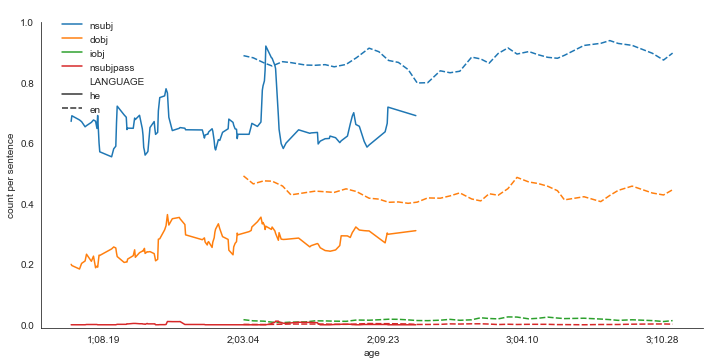

In [6]:
print("**** CORE RELATIONS ****")
draw_frequencies_both_languages(["nsubj", "dobj", "iobj", "nsubjpass"], window=5, y_limit=1.0, leg_y=0.67, leg_x=0.19,
                               save="he_en_core_relations")

**** NOMINAL MODIFIERS 1 ****


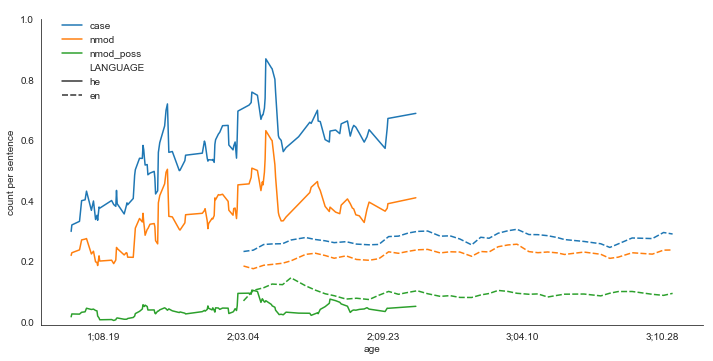

In [7]:
print("**** NOMINAL MODIFIERS 1 ****")
draw_frequencies_both_languages(["case", "nmod", "nmod_poss"], window=5, y_limit=1.0, leg_x=0.19,
                               save="he_en_nom_mod_1")

**** NOMINAL MODIFIERS 2 ****


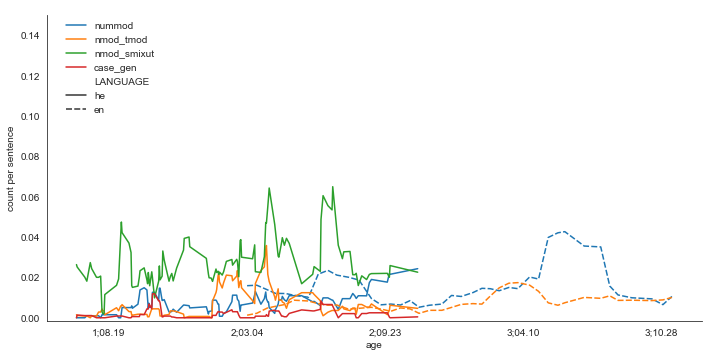

In [8]:
print("**** NOMINAL MODIFIERS 2 ****")
draw_frequencies_both_languages(["nummod", "nmod_tmod", "nmod_smixut", "case_gen"], window=5, y_limit=0.15, leg_y=0.65,
                               save="he_en_nom_mod_2")

**** PURELY SYNTACTIC ****


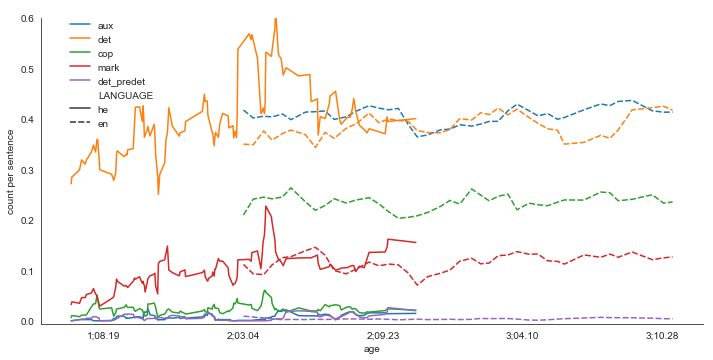

In [9]:
print("**** PURELY SYNTACTIC ****")
draw_frequencies_both_languages(["aux", "det", "cop", "mark", "det_predet"], window=5, y_limit=0.6, leg_y=0.62,
                               save="he_en_syntax")

**** CLAUSAL ARGUMENTS ****


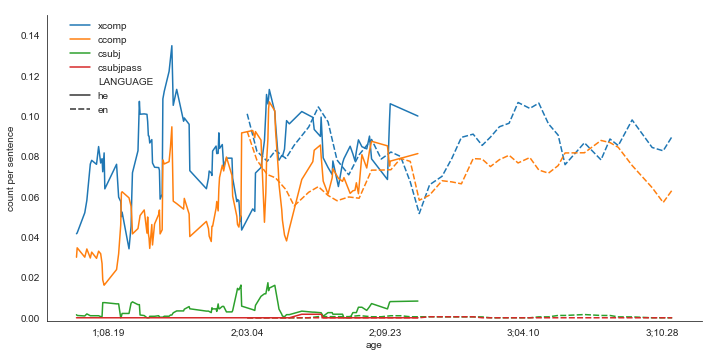

In [10]:
print("**** CLAUSAL ARGUMENTS ****")
draw_frequencies_both_languages(["xcomp", "ccomp", "csubj", "csubjpass"], window=5, y_limit=0.15, leg_y=0.65,
                                save="he_en_clausal_arg")

**** MODIFIERS OF NOMINALS ****


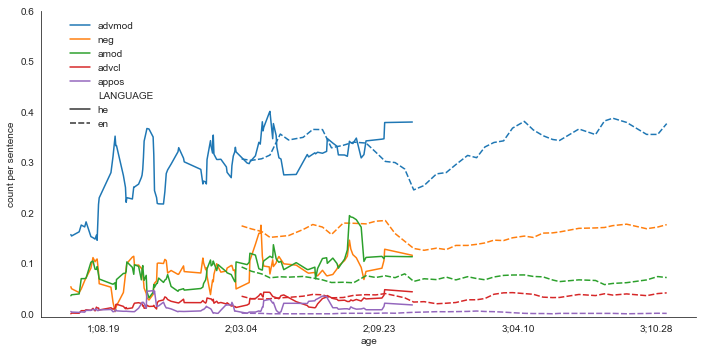

In [11]:
print("**** MODIFIERS OF NOMINALS ****")
draw_frequencies_both_languages(["advmod", "neg", "amod", "advcl", "appos"], window=5, y_limit=0.6,
                               leg_y=0.6, save="he_en_mod_of_nom")

**** CONJUNCTION ****


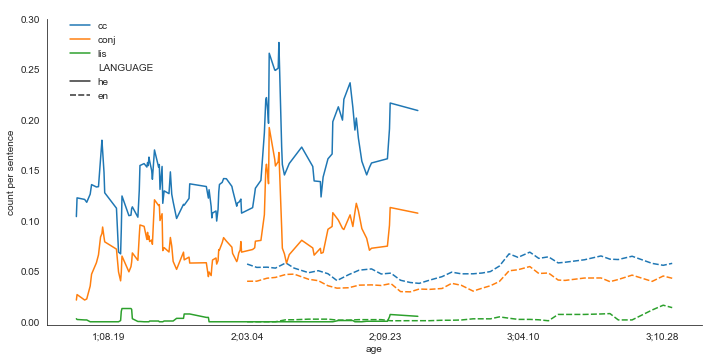

In [12]:
print("**** CONJUNCTION ****")
draw_frequencies_both_languages(["cc", "conj", "lis"], window=5, y_limit=0.3, leg_x=0.2, save="he_en_conj")

**** DISCOURSE 1 ****


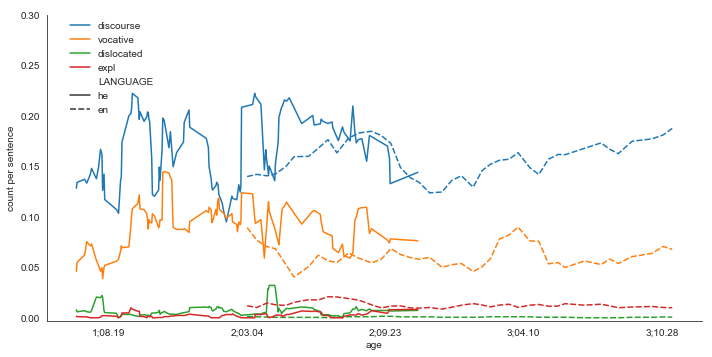

In [13]:
print("**** DISCOURSE 1 ****")
draw_frequencies_both_languages(["discourse", "vocative", "dislocated", "expl"], window=5, y_limit=0.3,
                                leg_y=0.65, leg_x=0.2, save="he_en_discourse_1")

**** DISCOURSE 2 ****


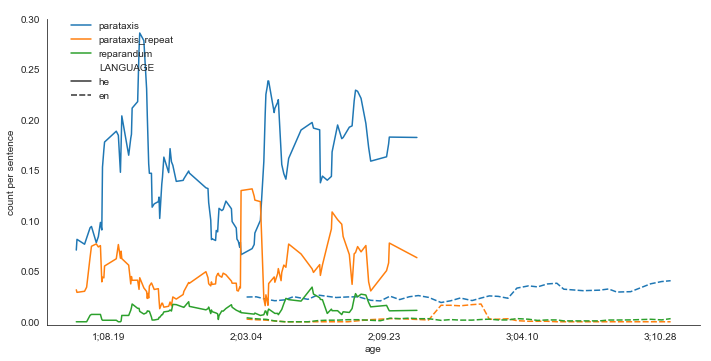

In [14]:
print("**** DISCOURSE 2 ****")
draw_frequencies_both_languages(["parataxis", "parataxis_repeat", "reparandum"], window=5, y_limit=0.3, leg_x=0.22,
                               save="he_en_discourse_2")

**** COMPOUNDING 1 ****


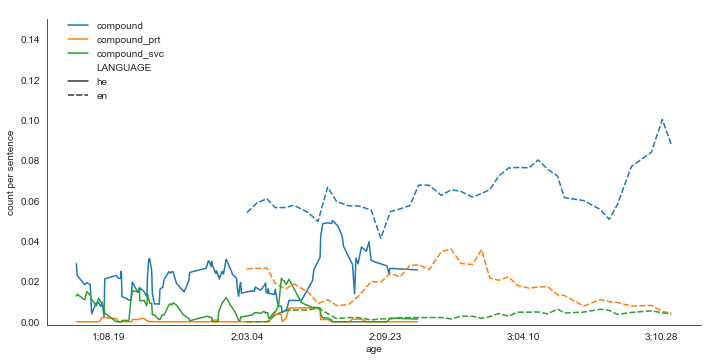

In [15]:
print("**** COMPOUNDING 1 ****")
draw_frequencies_both_languages(["compound", "compound_prt", "compound_svc"], window=5, y_limit=0.15, leg_x=0.21,
                               save="he_en_compound_1")

**** COMPOUNDING 2 ****


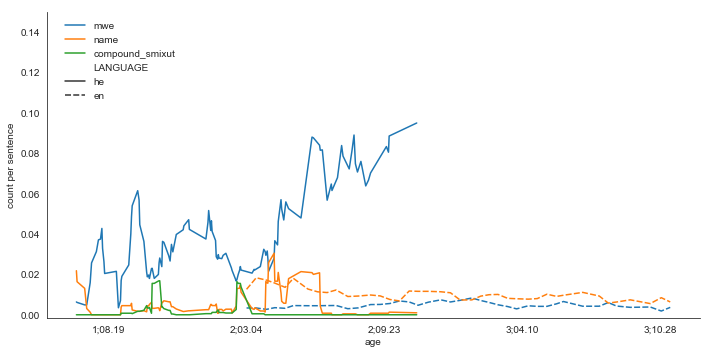

In [16]:
print("**** COMPOUNDING 2 ****")
draw_frequencies_both_languages(["mwe", "name", "compound_smixut"], window=5, y_limit=0.15, leg_y=0.68, leg_x=0.22,
                               save="he_en_compound_2")

**** ELLIPSIS 1 ****


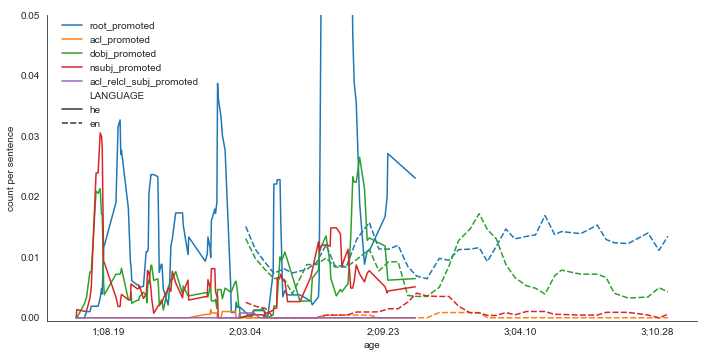

In [17]:
print("**** ELLIPSIS 1 ****")
draw_frequencies_both_languages(["root_promoted", "acl_promoted", "dobj_promoted", "nsubj_promoted", "acl_relcl_subj_promoted"], 
                                window=5, y_limit=0.05, leg_y=0.61, leg_x=0.24, save="he_en_sllipsis_1")

**** ELLIPSIS 2 ****


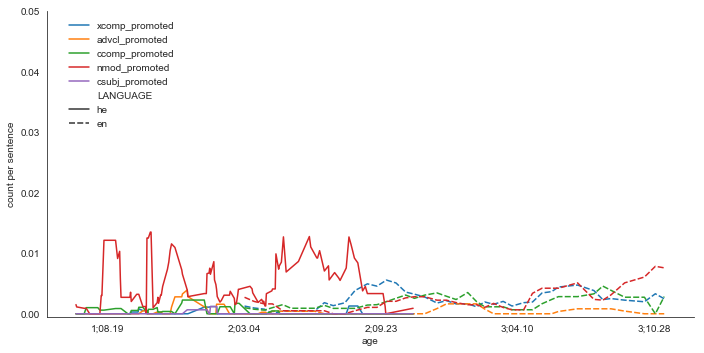

In [18]:
print("**** ELLIPSIS 2 ****")
draw_frequencies_both_languages(["xcomp_promoted", "advcl_promoted", "ccomp_promoted", "nmod_promoted", "csubj_promoted"],
                                window=5, y_limit=0.05, leg_y=0.60, leg_x=0.22, save="he_en_ellipsis_2")

**** RELATIVE CLAUSE ****


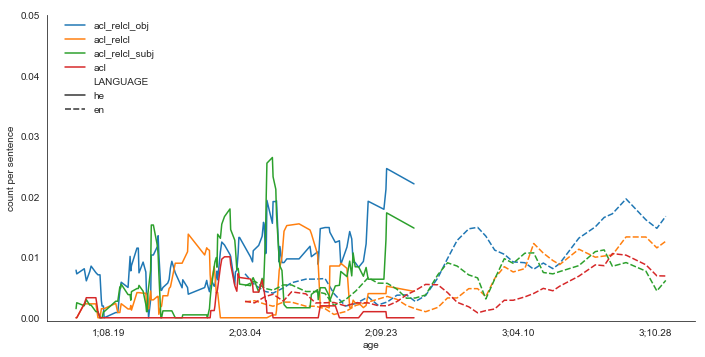

In [19]:
print("**** RELATIVE CLAUSE ****")
draw_frequencies_both_languages(["acl_relcl_obj", "acl_relcl", "acl_relcl_subj", "acl"],
                                window=5, y_limit=0.05, leg_y=0.65, save="he_en_relcl")




Defining a function for plotting dependency statistics for each language separately. Points on the x-axis reflect the number of days since the first session, but are re-labeled with the age of the child.

In [83]:
# english session labels range from 0 to 600 (counted in days) and are displayed in increments of 100
# Adam starts at 824 days
en_session_labels = ['2;03.04', '2;06.13', '2;09.23', '3;01.01', '3;04.09', '3;07.17', '3;10.28', '']

# hebrew session labels range from 0 to 500 (counted in days) and are displayed in increments of 100
# Hagar starts at 577 days
he_session_labels = ['1;07.02', '1;10.10', '2;01.19', '2;04.29', '2;08.07', '2;11.25', '']


def tick_func_en(value, tick_number):
    if value%100 == 0:
        i = int(value/100)
        return en_session_labels[i]
    else:
        return "empty"

def tick_func_he(value, tick_number):
    if value%100 == 0:
        i = int(value/100)
        return he_session_labels[i]
    else:
        return "empty"

def draw_frequencies(dependencies, stats, days, window=None, y_limit=None, save=None, title=True, dash=False):
    counts = []
    names = []
    for dep in dependencies:
        no_sessions = len(stats['nsubj'])
        names.extend([dep]*no_sessions)
        dep_counts = stats[dep]
        if window:
            k = int((window-1)/2)
            smoothed = []
            for i in range(1,k+1):
                smoothed.append(mean(dep_counts[:i+k]))
            for i in range(k, len(dep_counts)-k):
                smoothed.append(mean(dep_counts[i-k:i+k+1]))
            for i in range(1,k+1):
                smoothed.append(mean(dep_counts[-(i+k):]))
#             # because there's the largest gap between the last two sessions (40 days)
#             # and maybe smoothing over that is ill-advised
#             smoothed.append(dep_counts[-1])
            
#             smoothed = [mean([dep_counts[0], dep_counts[1]])]
#             smoothed.extend([mean([c_i, c_j, c_k]) for c_i, c_j, c_k in zip(dep_counts[:-2], dep_counts[1:-1], dep_counts[2:])])
#             smoothed.append(dep_counts[-1])
            counts.extend(smoothed)
        else:
            counts.extend(dep_counts)
    df = pd.DataFrame(dict(day=days*len(dependencies),
                           dependency = names,
                           count_per_sentence = counts))
    # plot data
    if dash:
        g = sns.relplot(x="day", y="count_per_sentence", hue="dependency", kind="line", data=df, style=True, dashes=[(2,2)])
    else:
        g = sns.relplot(x="day", y="count_per_sentence", hue="dependency", kind="line", data=df)
    g.set(xlabel='age', ylabel='count per sentence')
    # modify legend
    leg = g._legend
    leg.set_bbox_to_anchor([0.4, 0.75])
    leg._loc = 4
    g._legend.texts[0].set_text("")
    # modify y axis limit 
    plt.ylim(-1*(y_limit/100), y_limit)
    # change tick labels on x axis to show child's age
    if no_sessions==115:
        g.ax.xaxis.set_major_formatter(plt.FuncFormatter(tick_func_he))
    else:
        g.ax.xaxis.set_major_formatter(plt.FuncFormatter(tick_func_en))
    # add a title
    if title:
        title = "HAGAR" if no_sessions==115 else "ADAM"
        g.fig.suptitle(title)
    # save the plot
    if save:
        g.savefig(save)
        

Relatively frequent dependencies

In [ ]:
print("**** CORE RELATIONS ****")
draw_frequencies(["nsubj", "dobj",  "nsubjpass"], hebrew_stats, he_days, window=5, y_limit=1.0,
                 save="he_1", title=False)

In [ ]:
draw_frequencies(["nsubj", "dobj",  "nsubjpass", "iobj"], english_stats, en_days, window=3, y_limit=1.0,
                save="en_1", title=False)

In [ ]:
print("**** NOMINAL MODIFIERS ****")
draw_frequencies(["case", "nmod", "nmod_poss", "nummod", "nmod_tmod", "nmod_smixut", "case_gen"], hebrew_stats, he_days, window=5, y_limit=1.0,
                save="he_2", title=False)

In [ ]:
draw_frequencies(["case", "nmod", "nmod_poss", "nummod", "nmod_tmod"], english_stats, en_days, window=3, y_limit=1.0,
                save="en_2", title=False)

In [ ]:
print("**** DETERMINER ****")
draw_frequencies(["det", "det_predet"], hebrew_stats, he_days, window=3, y_limit=1.0,
                save="he_3", title=False)

In [ ]:
draw_frequencies(["det", "det_predet"], english_stats, en_days, window=3, y_limit=1.0,
                save="en_3", title=False)

In [ ]:
print("**** PURELY SYNTACTIC ****")
draw_frequencies(["aux", "det", "cop", "mark", "det_predet"], hebrew_stats, he_days, window=5, y_limit=1.0,
                save="he_4", title=False)

In [ ]:
draw_frequencies(["aux", "det", "cop", "mark", "det_predet"], english_stats, en_days, window=5, y_limit=1.0,
                save="en_4", title=False)

Relatively infrequent dependencies

In [ ]:
print("**** CLAUSAL ARGUMENTS ****")
draw_frequencies(["xcomp", "ccomp", "csubj", "csubjpass"], hebrew_stats, he_days, window=5, y_limit=0.4,
                save="he_5", title=False)

In [ ]:
draw_frequencies(["xcomp", "ccomp", "csubj", "csubjpass"], english_stats, en_days, window=5, y_limit=0.4,
                save="en_5", title=False)

In [ ]:
print("**** MODIFIERS OF NOMINALS ****")
draw_frequencies(["advmod", "neg", "amod", "advcl", "appos"], hebrew_stats, he_days, window=5, y_limit=0.4,
                save="he_6", title=False)

In [ ]:
draw_frequencies(["advmod", "neg", "amod", "advcl", "appos"], english_stats, en_days, window=5, y_limit=0.4,
                save="en_6", title=False)

In [ ]:
print("**** CONJUNCTION ****")
draw_frequencies(["cc", "conj", "lis"], hebrew_stats, he_days, window=5, y_limit=0.4,
                save="he_7", title=False)

In [ ]:
draw_frequencies(["cc", "conj", "lis"], english_stats, en_days, window=5, y_limit=0.4,
                save="en_7", title=False)

In [ ]:
print("**** DISCOURSE 1 ****")
draw_frequencies(["discourse", "vocative", "dislocated", "expl"], hebrew_stats, he_days, window=5, y_limit=0.4,
                save="he_8", title=False)

In [ ]:
draw_frequencies(["discourse", "vocative", "dislocated", "expl"], english_stats, en_days, window=5, y_limit=0.4,
                save="en_8", title=False)

In [ ]:
print("**** DISCOURSE 2 ****")
draw_frequencies(["parataxis", "parataxis_repeat", "reparandum"], hebrew_stats, he_days, window=5, y_limit=0.4,
                save="he_9", title=False)

In [ ]:
draw_frequencies(["parataxis", "parataxis_repeat", "reparandum"], english_stats, en_days, window=5, y_limit=0.4,
                save="en_9", title=False)

Very infrequent dependencies

In [ ]:
print("**** COMPOUNDING ****")
draw_frequencies(["mwe", "compound", "compound_prt", "name", "compound_svc", "compound_smixut"], hebrew_stats, he_days, window=5, y_limit=0.15,
                save="he_10", title=False)

In [ ]:
draw_frequencies(["mwe", "compound", "compound_prt", "name", "compound_svc"], english_stats, en_days, window=5, y_limit=0.15,
                save="en_10", title=False)

In [ ]:
print("**** ELLIPSIS 1 ****")
draw_frequencies(["root_promoted", "acl_promoted", "dobj_promoted", "nsubj_promoted", "acl_relcl_subj_promoted"], hebrew_stats, he_days, window=5, y_limit=0.15,
                save="he_11", title=False)

In [ ]:
draw_frequencies(["root_promoted", "acl_promoted", "dobj_promoted", "nsubj_promoted"], english_stats, en_days, window=5, y_limit=0.15,
                save="en_11", title=False)

In [ ]:
print("**** ELLIPSIS 2 ****")
draw_frequencies(["xcomp_promoted", "advcl_promoted", "ccomp_promoted", "nmod_promoted", "csubj_promoted"],
                 hebrew_stats, he_days, window=5, y_limit=0.05, save="he_12", title=False)

In [ ]:
draw_frequencies(["xcomp_promoted", "advcl_promoted", "ccomp_promoted", "nmod_promoted"],
                 english_stats, en_days, window=5, y_limit=0.05, save="en_12", title=False)

In [ ]:
print("**** RELATIVE CLAUSE ****")
draw_frequencies(["acl_relcl_obj", "acl_relcl", "acl_relcl_subj", "acl"],
                 hebrew_stats, he_days, window=5, y_limit=0.05, save="he_13", title=False)

In [ ]:
draw_frequencies(["acl_relcl_obj", "acl_relcl", "acl_relcl_subj", "acl"],
                 english_stats, en_days, window=5, y_limit=0.05, save="en_13", title=False)

LONGITUDINAL TRENDS

We want to know which dependencies show a longitudinal trend. To that purpose we run an ordinary least squares linear regression on each dependency to check whether the time elapsed since the first session is a significant factor in predicting the dependency frequency.

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

def test_trend(dep, lang):
    if lang == "en":
        X = np.asarray(en_days).reshape(-1, 1)
        y = np.asarray(english_stats[dep])*100
    else:
        X = np.asarray(he_days).reshape(-1, 1)
        y = np.asarray(hebrew_stats[dep])*100
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()
#     results = sm.OLS(y, X, hasconst=True).fit()
#     print(results.t_test([1, 0]))
    print(results.summary())

Analysing the English data

In [48]:
for dep in en_trend:
# for dep in english_stats:
    print("\n\n*********** "+dep+" ***********")
    test_trend(dep, "en")



*********** acl_relcl_obj ***********
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     17.61
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           0.000152
Time:                        14:52:19   Log-Likelihood:                -35.324
No. Observations:                  41   AIC:                             74.65
Df Residuals:                      39   BIC:                             78.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [47]:
# english relations with a trend, p>0.05
# en_trend = ["acl_relcl_obj", "acl_relcl", "acl", "compound", "parataxis", "nmod_promoted", "lis"]

# english relations with a trend, p>0.01
en_trend = ["acl_relcl_obj", "acl_relcl", "nmod_promoted", "acl"]

**acl_relcl_obj**: coef=0.0022, p=0.00, R^2=0.293<br/>
**acl_relcl**: coef=0.0021, p=0.00, R^2=0.305<br/>
**acl**: coef=0.0008, p=0.014, R^2=0.123<br/>
**compound**: coef=0.0040, p=0.034, R^2=0.087<br/>
**parataxis**: coef=0.0026, p=0.014, R^2=0.123<br/>
**nmod_promoted**: coef=0.0008, p=0.008, R^2=0.145<br/>
**list**: coef=0.0017, p=0.028, R^2=0.095

Drawing English dependencies displaying an upwards trend.

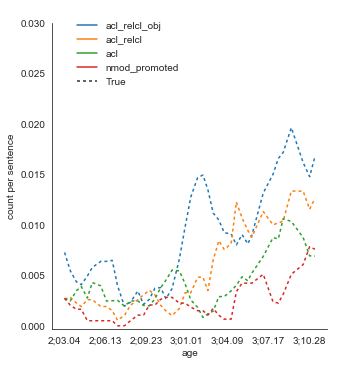

In [84]:
draw_frequencies(["acl_relcl_obj", "acl_relcl", "acl", "nmod_promoted"], english_stats, en_days,
                 window=5, y_limit=0.03, save="en_trend1", title=False, dash=True)

Analysing the Hebrew data
"The point of commonality is relative clauses. We also observe upward trends in adverbial clauses, adjectives, numerical and possesive modifiers, multiword expressions, disfluencies (reparandum), transitive verbs (direct object), conjunction, adverbs, subordinate clauses (mark), and prepositional phrases (which in our annotation include all indirect objects)"

In [52]:
for dep in ["acl_relcl_obj", "acl_relcl_subj", "advcl", "amod", "nummod", "nmod_poss", "mwe",
            "reparandum", "dobj", "cc", "advmod", "mark", "case", "nmod", "ccomp", "neg"]:
# for dep in hebrew_stats:
    print("\n\n*********** "+dep+" ***********")
    test_trend(dep, "he")



*********** acl_relcl_obj ***********
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     11.77
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           0.000843
Time:                        16:43:25   Log-Likelihood:                -159.64
No. Observations:                 115   AIC:                             323.3
Df Residuals:                     113   BIC:                             328.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [49]:
# hebrew relations with a trend, p>0.05
# he_trend = ["root", "punct", "aux", "case", "nmod", "nmod_poss", "nmod_tmod", "dobj", "advmod", "advcl", "amod", 
#             "ccomp", "acl_relcl_obj", "acl_relcl_subj", "neg", "cc", "conj", "compound", "det_predet", "det_def", 
#             "parataxis", "mark", "root_promoted", "nummod", "reparandum", "mwe", "goeswith"]

# hebrew relations with a trend, p>0.01
he_trend = ["punct", "case", "nmod", "nmod_poss", "dobj", "advmod", "advcl", "amod", 
            "ccomp", "acl_relcl_obj", "acl_relcl_subj", "neg", "cc", 
            "mark", "root_promoted", "nummod", "reparandum", "mwe"]

**root**: 
    coef=-0.0083, p=0.002, R^2=0.083<br/>
**punct**: 
    coef=0.0375, p=0.000, R^2=0.111<br/>
**case**: 
    coef=0.0725, p=0.000, R^2=0.263<br/>
**nmod**: 
    coef=0.0449, p=0.000, R^2=0.159<br/>
**nmod_poss**: 
    coef=0.0068, p=0.005, R^2=0.067<br/>
**nmod_tmod**: 
    coef=0.0019, p=0.042, R^2=0.036<br/>
**advmod**: 
    coef=0.0311, p=0.000, R^2=0.205<br/>
**dobj**: 
    coef=0.0190, p=0.000, R^2=0.115<br/>
**parataxis**: 
    coef=0.0118, p=0.040, R^2=0.037<br/>
**mark**: 
    coef=0.0198, p=0.000, R^2=0.186<br/>
**acl_relcl_obj**: 
    coef=0.0026, p=0.000, R^2=0.104<br/>
**acl_relcl_subj**: 
    coef=0.0020, p=0.003, R^2=0.073<br/>
**cc**: 
    coef=0.0172, p=0.001, R^2=0.088<br/>
**conj**: 
    coef=0.0102, p=0.013, R^2=0.054<br/>
**mwe**: 
    coef=0.0134, p=0.000, R^2=0.255<br/>
**ccomp**: 
    coef=0.0105, p=0.000, R^2=0.118<br/>
**neg**: 
    coef=0.0106, p=0.006, R^2=0.064<br/>
**amod**: 
    coef=0.0158, p=0.00, R^2=0.115<br/>
**compound**: 
    coef=0.0041, p=0.007, R^2=0.063<br/>
**advcl**: 
    coef=0.0057, p=0.000, R^2=0.179<br/>
**det_predet**: 
    coef=0.0019, p=0.018, R^2=0.048<br/>
**aux**: 
    coef=0.2824, p=0.012, R^2=0.054<br/>
**root_promoted**: 
    coef=0.0086, p=0.001, R^2=0.089<br/>
**nummod**: 
    coef=0.0025, p=0.001, R^2=0.089<br/>
**reparandum**: 
    coef=0.0034, p=0.000, R^2=0.122<br/>
**det_def**: 
    coef=0.0252, p=0.000, R^2=0.231<br/>

In [28]:
#########
# with p 0.05

In [29]:
# draw_frequencies(["ccomp", "advcl", "acl_relcl_obj", "acl_relcl_subj"], hebrew_stats, he_days, window=5, y_limit=0.15,
#                  save="he_trend1", title=False)

In [30]:
# draw_frequencies(["nmod_poss", "compound", "nmod_tmod", "nummod"], hebrew_stats, he_days, window=5, y_limit=0.15,
#                  save="he_trend2", title=False)

In [31]:
# draw_frequencies(["mwe", "root_promoted", "reparandum"], hebrew_stats, he_days, window=5, y_limit=0.15,
#                  save="he_trend3", title=False)

In [32]:
# draw_frequencies(["dobj", "parataxis", "cc", "conj", "aux"], hebrew_stats, he_days, window=5, y_limit=0.5,
#                  save= "he_trend4", title=False)

In [33]:
# draw_frequencies(["advmod", "mark", "amod", "det_predet"], hebrew_stats, he_days, window=5, y_limit=0.5,
#                  save="he_trend5", title=False)

In [34]:
# draw_frequencies(["punct", "root", "case", "nmod", "neg"], hebrew_stats, he_days, window=5, y_limit=1.8,
#                  save="he_trend6", title=False)

In [35]:
#########
# with p 0.01

Drawing Hebrew dependencies displaying an upward trend

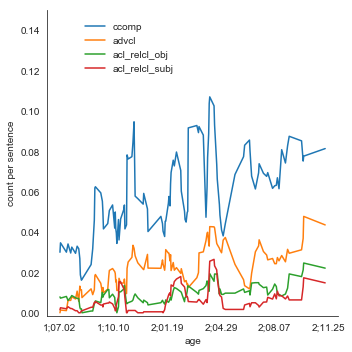

In [74]:
draw_frequencies(["ccomp", "advcl", "acl_relcl_obj", "acl_relcl_subj"], hebrew_stats, he_days, window=5, y_limit=0.15,
                 save="he_trend1", title=False)

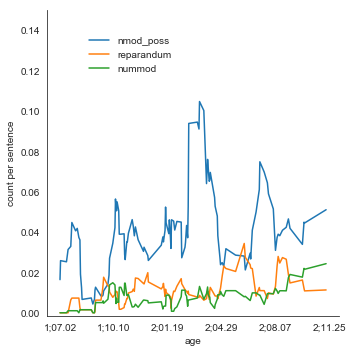

In [78]:
draw_frequencies(["nmod_poss", "reparandum", "nummod"], hebrew_stats, he_days, window=5, y_limit=0.15,
                 save="he_trend2", title=False)

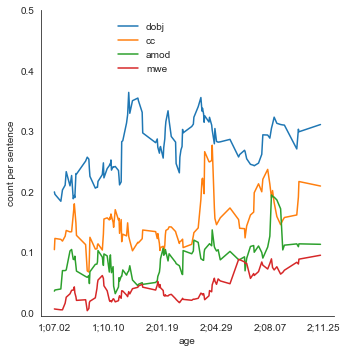

In [76]:
draw_frequencies(["dobj", "cc", "amod", "mwe"], hebrew_stats, he_days, window=5, y_limit=0.5,
                 save= "he_trend3", title=False)

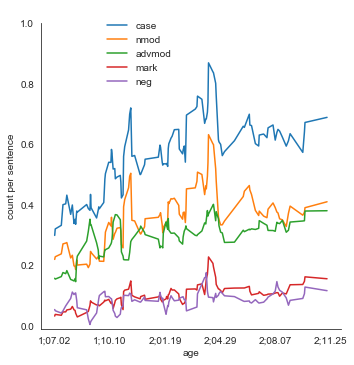

In [77]:
draw_frequencies(["case", "nmod", "advmod", "mark", "neg"], hebrew_stats, he_days, window=5, y_limit=1,
                 save="he_trend4", title=False)

In [ ]:
diff_trend = [dep for dep in he_trend if dep not in en_trend]

In [85]:
english_stats

{'nsubj': [0.9274809160305295,
  0.8938775510204119,
  0.844311377245507,
  0.8600337268128138,
  0.7999999999999945,
  0.8739669421487676,
  0.9650872817955052,
  0.8286445012787765,
  0.8198198198198228,
  0.7966101694915265,
  0.8841870824053398,
  0.9291553133515038,
  0.8681055155875269,
  0.9314720812182669,
  0.9534246575342433,
  0.8257756563245879,
  0.7844611528821992,
  0.8361111111111088,
  0.812834224598933,
  0.732342007434946,
  0.8308457711442823,
  0.9806451612903295,
  0.8038834951456256,
  0.8378378378378407,
  0.9654510556621998,
  0.8006230529595015,
  0.9105367793240633,
  0.9640522875816966,
  0.9302884615384588,
  0.8637873754152859,
  0.8416666666666645,
  0.8590909090909137,
  0.9203980099502543,
  0.9146341463414592,
  0.912713472485778,
  1.0044150110375318,
  0.8940092165898682,
  0.9659090909090972,
  0.867391304347822,
  0.8808933002481445,
  0.8738461538461564],
 'root': [0.977099236641216,
  0.9836734693877598,
  0.9880239520958047,
  1.0016863406408052